# Experiment 6: Static Pose MLP (Front vs Side - Multi-Run)

Robust comparison of front-view vs side-view pose-based models using **30-run aggregated statistics** with config-based training.

**Key Features:**
- Subject-wise stratified train/val/test splits (no subject leakage)
- Separate config files for front and side views
- 30 runs per view with different random seeds
- Comprehensive statistical analysis and visualization
- Hyperparameters saved with results for reproducibility

## Execution Plan

1. **Setup:** Import dependencies and configure paths
2. **Data:** Load and inspect front/side static pose features
3. **Multi-Run Training:** Execute 30 runs for both front and side views
4. **Statistical Analysis:** Compare aggregated results with mean ± std
5. **Visualization:** 
   - Multi-run distributions (box plots, histograms)
   - Best vs worst run comparisons
   - Run progression analysis
   - Aggregated confusion matrices
   - Cross-model statistical comparison

### Overview
- **Data:** Static pose features (45-dim: 9 angles × 5 statistics) from MediaPipe landmarks
- **Files:** `pose_data_front_static.npz` and `pose_data_side_static.npz`
- **Subjects:** 49 volunteers across 15 exercises
- **Splits:** Subject-wise stratified train/val/test (no subject leakage)
- **Models:** Two separate MLPs - one for front view, one for side view
- **Deployment scenario:** Single-view inference (front OR side camera, not both)
- **Metrics:** Accuracy, macro F1, per-class F1, confusion matrix

In [2]:
from pathlib import Path
import json
import sys
import numpy as np

PROJECT_ROOT = Path('..').resolve().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

# Force reload modules to pick up latest changes
import importlib
import src.data.data_loader
import src.data.dataset_builder
import src.scripts.experiment_6
importlib.reload(src.data.data_loader)
importlib.reload(src.data.dataset_builder)
importlib.reload(src.scripts.experiment_6)

from src.data import load_pose_data
from src.scripts.experiment_6 import train_experiment_6_multi_run

In [3]:
importlib.reload(src.utils.visualization)

from src.utils.visualization import (
    plot_confusion_matrix_from_metrics,
    plot_per_class_f1_scores,
    sort_labels_by_numeric_prefix,
    display_multi_run_summary,
    plot_multi_run_distributions,
    plot_best_worst_comparison,
    plot_aggregated_confusion_matrix,
    plot_dual_training_history,
    compare_multi_run_stats,
)
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Define paths to static pose NPZ files
front_static_npz = PROJECT_ROOT / 'datasets' / 'Mediapipe pose estimates' / 'pose_data_front_static_v2.npz'
side_static_npz = PROJECT_ROOT / 'datasets' / 'Mediapipe pose estimates' / 'pose_data_side_static_v2.npz'

# Load and summarize front-view data
front_dataset, front_summary = load_pose_data(str(front_static_npz))
print("Front-view static features:")
print(f"  Samples: {front_summary['count']}")
print(f"  Subjects: {front_summary['unique_subjects']}")
print(f"  Classes: {front_summary['unique_classes']}")
print(f"  Feature shape: (N, 45) - 9 angles × 5 statistics")

# Load and summarize side-view data
side_dataset, side_summary = load_pose_data(str(side_static_npz))
print("\nSide-view static features:")
print(f"  Samples: {side_summary['count']}")
print(f"  Subjects: {side_summary['unique_subjects']}")
print(f"  Classes: {side_summary['unique_classes']}")
print(f"  Feature shape: (N, 45) - 9 angles × 5 statistics")

INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view


Front-view static features:
  Samples: 1574
  Subjects: 49
  Classes: 15
  Feature shape: (N, 45) - 9 angles × 5 statistics

Side-view static features:
  Samples: 1571
  Subjects: 49
  Classes: 15
  Feature shape: (N, 45) - 9 angles × 5 statistics


---

## Multi-Run Training: Front View (30 Runs)

Execute 30 training runs with different random seeds using `config/experiment_6_static_front.yaml`.

**Configuration:**
- Hyperparameters loaded from YAML config
- Results saved to `experiments/exer_recog/results/exp_06_pose_mlp_static/front/`
- Each run uses subject-wise stratified splits
- Early stopping with patience=10 on validation loss

In [12]:
# Train front-view model with multi-run (30 runs)
print("=" * 80)
print("MULTI-RUN TRAINING: FRONT VIEW (30 RUNS)")
print("=" * 80)

config_path_front = PROJECT_ROOT / 'config' / 'experiment_6_static_front.yaml'

multi_run_results_front, aggregated_stats_front = train_experiment_6_multi_run(
    npz_path=str(front_static_npz),
    config_path=str(config_path_front)
)

print("\n✅ Front-view multi-run training complete!")
print(f"Mean Test Accuracy: {aggregated_stats_front['test_accuracy']['mean']:.4f} ± {aggregated_stats_front['test_accuracy']['std']:.4f}")
print(f"Mean Test Macro F1: {aggregated_stats_front['test_macro_f1']['mean']:.4f} ± {aggregated_stats_front['test_macro_f1']['std']:.4f}")

INFO - Multi-run parent folder: /mnt/d/Graduation_Project/ai-virtual-coach/experiments/exer_recog/results/exp_06_pose_mlp_static/front/multi_run_006
INFO - 
INFO - Starting run 1/30 (seed=43)
INFO - ================================================================================
INFO - Global random seed set to: 43
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=908, val=231, test=435, classes=15
INFO - Datasets built with feature_dim=45


MULTI-RUN TRAINING: FRONT VIEW (30 RUNS)
Epoch 1/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - accuracy: 0.1322 - loss: 2.6263 - val_accuracy: 0.1558 - val_loss: 2.5652
Epoch 2/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1905 - loss: 2.4139 - val_accuracy: 0.2424 - val_loss: 2.3605
Epoch 3/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2742 - loss: 2.2100 - val_accuracy: 0.3853 - val_loss: 2.1758
Epoch 4/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3899 - loss: 2.0342 - val_accuracy: 0.3766 - val_loss: 2.0067
Epoch 5/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4703 - loss: 1.8407 - val_accuracy: 0.3680 - val_loss: 1.8536
Epoch 6/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4978 - loss: 1.7108 - val_accuracy: 0.4286 - val_loss: 1.7110
Epoch 7/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5363 - loss: 1.5939 - val_accuracy: 0.4675 - val_loss: 1.5854
Epoch 8/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.59

INFO - Experiment 6 (static) complete. Test acc=0.6736, macro F1=0.6589
INFO - Run 1 complete: acc=0.6736, macro_f1=0.6589
INFO - 
INFO - Starting run 2/30 (seed=44)
INFO - ================================================================================
INFO - Global random seed set to: 44
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=849, val=216, test=509, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.0495 - loss: 2.8858 - val_accuracy: 0.0741 - val_loss: 2.6700
Epoch 2/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1225 - loss: 2.6178 - val_accuracy: 0.2639 - val_loss: 2.4614
Epoch 3/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2167 - loss: 2.4152 - val_accuracy: 0.3981 - val_loss: 2.2742
Epoch 4/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3039 - loss: 2.2396 - val_accuracy: 0.5278 - val_loss: 2.0991
Epoch 5/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3993 - loss: 2.0564 - val_accuracy: 0.6481 - val_loss: 1.9350
Epoch 6/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4629 - loss: 1.8870 - val_accuracy: 0.6806 - val_loss: 1.7834
Epoch 7/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5206 - loss: 1.7601 - val_accuracy: 0.6898 - val_loss: 1.6469
Epoch 8/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5936 - loss: 1.5856 - val_accuracy: 0.6898 - 

INFO - Experiment 6 (static) complete. Test acc=0.6739, macro F1=0.6651
INFO - Run 2 complete: acc=0.6739, macro_f1=0.6651
INFO - 
INFO - Starting run 3/30 (seed=45)
INFO - ================================================================================
INFO - Global random seed set to: 45
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=909, val=200, test=465, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.0759 - loss: 2.7399 - val_accuracy: 0.1200 - val_loss: 2.6326
Epoch 2/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1463 - loss: 2.5303 - val_accuracy: 0.2250 - val_loss: 2.4596
Epoch 3/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2530 - loss: 2.3186 - val_accuracy: 0.2550 - val_loss: 2.3072
Epoch 4/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3366 - loss: 2.1399 - val_accuracy: 0.2800 - val_loss: 2.1691
Epoch 5/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3927 - loss: 1.9867 - val_accuracy: 0.4250 - val_loss: 2.0405
Epoch 6/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4686 - loss: 1.8297 - val_accuracy: 0.5100 - val_loss: 1.9272
Epoch 7/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5083 - loss: 1.7263 - val_accuracy: 0.5450 - val_loss: 1.8160
Epoch 8/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5567 - loss: 1.5810 - val_accuracy: 0.5600 - 

INFO - Experiment 6 (static) complete. Test acc=0.7333, macro F1=0.7214
INFO - Run 3 complete: acc=0.7333, macro_f1=0.7214
INFO - 
INFO - Starting run 4/30 (seed=46)
INFO - ================================================================================
INFO - Global random seed set to: 46
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=842, val=253, test=479, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.0629 - loss: 2.8116 - val_accuracy: 0.1383 - val_loss: 2.6647
Epoch 2/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1342 - loss: 2.5336 - val_accuracy: 0.1462 - val_loss: 2.4966
Epoch 3/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2328 - loss: 2.3506 - val_accuracy: 0.2174 - val_loss: 2.3517
Epoch 4/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3052 - loss: 2.1587 - val_accuracy: 0.2332 - val_loss: 2.2129
Epoch 5/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3765 - loss: 2.0015 - val_accuracy: 0.2925 - val_loss: 2.0817
Epoch 6/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4691 - loss: 1.8312 - val_accuracy: 0.3439 - val_loss: 1.9591
Epoch 7/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4988 - loss: 1.7233 - val_accuracy: 0.3755 - val_loss: 1.8562
Epoch 8/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5523 - loss: 1.5858 - val_accuracy: 0.4427 - 

INFO - Experiment 6 (static) complete. Test acc=0.7286, macro F1=0.6847
INFO - Run 4 complete: acc=0.7286, macro_f1=0.6847
INFO - 
INFO - Starting run 5/30 (seed=47)
INFO - ================================================================================
INFO - Global random seed set to: 47
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=968, val=188, test=418, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.0878 - loss: 2.7777 - val_accuracy: 0.1968 - val_loss: 2.5161
Epoch 2/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1674 - loss: 2.5228 - val_accuracy: 0.3723 - val_loss: 2.2959
Epoch 3/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2665 - loss: 2.3139 - val_accuracy: 0.5745 - val_loss: 2.1070
Epoch 4/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3719 - loss: 2.1344 - val_accuracy: 0.6330 - val_loss: 1.9461
Epoch 5/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4432 - loss: 1.9612 - val_accuracy: 0.6596 - val_loss: 1.7956
Epoch 6/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5052 - loss: 1.7925 - val_accuracy: 0.6649 - val_loss: 1.6674
Epoch 7/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5589 - loss: 1.6397 - val_accuracy: 0.6702 - val_loss: 1.5536
Epoch 8/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6095 - loss: 1.5059 - val_accuracy: 0.6702 - 

INFO - Experiment 6 (static) complete. Test acc=0.7201, macro F1=0.7013
INFO - Run 5 complete: acc=0.7201, macro_f1=0.7013
INFO - 
INFO - Starting run 6/30 (seed=48)
INFO - ================================================================================
INFO - Global random seed set to: 48
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
ERROR - Test split missing classes: ['Deadlift']
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=985, val=191, test=398, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.0975 - loss: 2.7518 - val_accuracy: 0.1466 - val_loss: 2.5259
Epoch 2/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1990 - loss: 2.4764 - val_accuracy: 0.4293 - val_loss: 2.3182
Epoch 3/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3249 - loss: 2.2431 - val_accuracy: 0.5602 - val_loss: 2.1345
Epoch 4/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4213 - loss: 2.0581 - val_accuracy: 0.5654 - val_loss: 1.9745
Epoch 5/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4772 - loss: 1.8902 - val_accuracy: 0.5707 - val_loss: 1.8272
Epoch 6/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5401 - loss: 1.7047 - val_accuracy: 0.5969 - val_loss: 1.6952
Epoch 7/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5959 - loss: 1.5691 - val_accuracy: 0.6073 - val_loss: 1.5788
Epoch 8/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6132 - loss: 1.4376 - val_accuracy: 0.6073 - 

INFO - Experiment 6 (static) complete. Test acc=0.6633, macro F1=0.5413
INFO - Run 6 complete: acc=0.6633, macro_f1=0.5413
INFO - 
INFO - Starting run 7/30 (seed=49)
INFO - ================================================================================
INFO - Global random seed set to: 49
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=807, val=225, test=542, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.1140 - loss: 2.6996 - val_accuracy: 0.1511 - val_loss: 2.5738
Epoch 2/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1896 - loss: 2.4749 - val_accuracy: 0.1644 - val_loss: 2.3964
Epoch 3/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3209 - loss: 2.1881 - val_accuracy: 0.2933 - val_loss: 2.2412
Epoch 4/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3916 - loss: 2.0330 - val_accuracy: 0.3911 - val_loss: 2.1094
Epoch 5/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4870 - loss: 1.8663 - val_accuracy: 0.4178 - val_loss: 1.9952
Epoch 6/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5502 - loss: 1.6768 - val_accuracy: 0.4178 - val_loss: 1.8946
Epoch 7/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5551 - loss: 1.5754 - val_accuracy: 0.4178 - val_loss: 1.8090
Epoch 8/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6357 - loss: 1.4451 - val_accuracy: 0.4222 - 

INFO - Experiment 6 (static) complete. Test acc=0.7066, macro F1=0.6927
INFO - Run 7 complete: acc=0.7066, macro_f1=0.6927
INFO - 
INFO - Starting run 8/30 (seed=50)
INFO - ================================================================================
INFO - Global random seed set to: 50
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=959, val=237, test=378, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.0772 - loss: 2.8235 - val_accuracy: 0.0886 - val_loss: 2.6225
Epoch 2/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1502 - loss: 2.5692 - val_accuracy: 0.1224 - val_loss: 2.4107
Epoch 3/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2534 - loss: 2.3265 - val_accuracy: 0.3502 - val_loss: 2.2225
Epoch 4/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3493 - loss: 2.1459 - val_accuracy: 0.4262 - val_loss: 2.0431
Epoch 5/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4244 - loss: 1.9458 - val_accuracy: 0.4768 - val_loss: 1.8694
Epoch 6/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5162 - loss: 1.7636 - val_accuracy: 0.5021 - val_loss: 1.7199
Epoch 7/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5631 - loss: 1.6195 - val_accuracy: 0.5148 - val_loss: 1.6009
Epoch 8/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5944 - loss: 1.4722 - val_accuracy: 0.5274 -

INFO - Experiment 6 (static) complete. Test acc=0.6799, macro F1=0.6731
INFO - Run 8 complete: acc=0.6799, macro_f1=0.6731
INFO - 
INFO - Starting run 9/30 (seed=51)
INFO - ================================================================================
INFO - Global random seed set to: 51
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=802, val=272, test=500, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.1010 - loss: 2.7759 - val_accuracy: 0.2243 - val_loss: 2.5911
Epoch 2/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1746 - loss: 2.5264 - val_accuracy: 0.2574 - val_loss: 2.4080
Epoch 3/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2556 - loss: 2.3475 - val_accuracy: 0.3640 - val_loss: 2.2467
Epoch 4/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3379 - loss: 2.1951 - val_accuracy: 0.4522 - val_loss: 2.1059
Epoch 5/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4127 - loss: 1.9942 - val_accuracy: 0.5147 - val_loss: 1.9806
Epoch 6/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5037 - loss: 1.8690 - val_accuracy: 0.5478 - val_loss: 1.8607
Epoch 7/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5262 - loss: 1.7173 - val_accuracy: 0.5735 - val_loss: 1.7595
Epoch 8/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5910 - loss: 1.5987 - val_accuracy: 0.5772 - 

INFO - Experiment 6 (static) complete. Test acc=0.6420, macro F1=0.6253
INFO - Run 9 complete: acc=0.6420, macro_f1=0.6253
INFO - 
INFO - Starting run 10/30 (seed=52)
INFO - ================================================================================
INFO - Global random seed set to: 52
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=888, val=169, test=517, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.0923 - loss: 2.7971 - val_accuracy: 0.1065 - val_loss: 2.6095
Epoch 2/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1498 - loss: 2.5744 - val_accuracy: 0.2012 - val_loss: 2.4371
Epoch 3/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2376 - loss: 2.3696 - val_accuracy: 0.2899 - val_loss: 2.2753
Epoch 4/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3378 - loss: 2.1719 - val_accuracy: 0.3905 - val_loss: 2.1243
Epoch 5/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4077 - loss: 2.0076 - val_accuracy: 0.4852 - val_loss: 1.9771
Epoch 6/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4966 - loss: 1.8599 - val_accuracy: 0.4734 - val_loss: 1.8440
Epoch 7/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5608 - loss: 1.6623 - val_accuracy: 0.5089 - val_loss: 1.7317
Epoch 8/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5822 - loss: 1.5440 - val_accuracy: 0.5325 - 

INFO - Experiment 6 (static) complete. Test acc=0.7485, macro F1=0.7388
INFO - Run 10 complete: acc=0.7485, macro_f1=0.7388
INFO - 
INFO - Starting run 11/30 (seed=53)
INFO - ================================================================================
INFO - Global random seed set to: 53
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
WARNING - Val split missing classes: ['Deadlift', 'Seated biceps curls']
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=967, val=137, test=470, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.1013 - loss: 2.7658 - val_accuracy: 0.2190 - val_loss: 2.5669
Epoch 2/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1799 - loss: 2.4536 - val_accuracy: 0.3723 - val_loss: 2.3494
Epoch 3/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3133 - loss: 2.2134 - val_accuracy: 0.4380 - val_loss: 2.1665
Epoch 4/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4178 - loss: 1.9813 - val_accuracy: 0.5547 - val_loss: 1.9973
Epoch 5/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5098 - loss: 1.8032 - val_accuracy: 0.6204 - val_loss: 1.8488
Epoch 6/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5760 - loss: 1.6076 - val_accuracy: 0.6423 - val_loss: 1.7229
Epoch 7/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6122 - loss: 1.4684 - val_accuracy: 0.6423 - val_loss: 1.6232
Epoch 8/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6225 - loss: 1.3706 - val_accuracy: 0.6423 - 

INFO - Experiment 6 (static) complete. Test acc=0.6340, macro F1=0.6153
INFO - Run 11 complete: acc=0.6340, macro_f1=0.6153
INFO - 
INFO - Starting run 12/30 (seed=54)
INFO - ================================================================================
INFO - Global random seed set to: 54
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=900, val=269, test=405, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.0756 - loss: 2.7994 - val_accuracy: 0.4052 - val_loss: 2.5028
Epoch 2/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1778 - loss: 2.5500 - val_accuracy: 0.4312 - val_loss: 2.3236
Epoch 3/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2467 - loss: 2.3463 - val_accuracy: 0.4647 - val_loss: 2.1744
Epoch 4/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3744 - loss: 2.1455 - val_accuracy: 0.5316 - val_loss: 2.0328
Epoch 5/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4444 - loss: 1.9607 - val_accuracy: 0.5130 - val_loss: 1.9034
Epoch 6/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5233 - loss: 1.7850 - val_accuracy: 0.5279 - val_loss: 1.7874
Epoch 7/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5633 - loss: 1.6604 - val_accuracy: 0.5539 - val_loss: 1.6836
Epoch 8/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6033 - loss: 1.4950 - val_accuracy: 0.5874 - 

INFO - Experiment 6 (static) complete. Test acc=0.6840, macro F1=0.6591
INFO - Run 12 complete: acc=0.6840, macro_f1=0.6591
INFO - 
INFO - Starting run 13/30 (seed=55)
INFO - ================================================================================
INFO - Global random seed set to: 55
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=810, val=326, test=438, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.1074 - loss: 2.7566 - val_accuracy: 0.2362 - val_loss: 2.5244
Epoch 2/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2049 - loss: 2.4548 - val_accuracy: 0.2853 - val_loss: 2.3029
Epoch 3/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2778 - loss: 2.2795 - val_accuracy: 0.3589 - val_loss: 2.1223
Epoch 4/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3840 - loss: 2.0762 - val_accuracy: 0.5429 - val_loss: 1.9616
Epoch 5/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4185 - loss: 1.8976 - val_accuracy: 0.5982 - val_loss: 1.8209
Epoch 6/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4914 - loss: 1.7619 - val_accuracy: 0.6135 - val_loss: 1.7055
Epoch 7/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5679 - loss: 1.6270 - val_accuracy: 0.6288 - val_loss: 1.6033
Epoch 8/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5765 - loss: 1.5116 - val_accuracy: 0.6472 -

INFO - Experiment 6 (static) complete. Test acc=0.7489, macro F1=0.7331
INFO - Run 13 complete: acc=0.7489, macro_f1=0.7331
INFO - 
INFO - Starting run 14/30 (seed=56)
INFO - ================================================================================
INFO - Global random seed set to: 56
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=1014, val=200, test=360, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.1144 - loss: 2.6855 - val_accuracy: 0.2300 - val_loss: 2.4568
Epoch 2/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2120 - loss: 2.4385 - val_accuracy: 0.4250 - val_loss: 2.2676
Epoch 3/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3205 - loss: 2.2137 - val_accuracy: 0.4850 - val_loss: 2.0976
Epoch 4/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4280 - loss: 2.0055 - val_accuracy: 0.5050 - val_loss: 1.9459
Epoch 5/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4576 - loss: 1.8632 - val_accuracy: 0.5350 - val_loss: 1.8113
Epoch 6/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5247 - loss: 1.7003 - val_accuracy: 0.5400 - val_loss: 1.6953
Epoch 7/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6016 - loss: 1.5621 - val_accuracy: 0.5350 - val_loss: 1.5871
Epoch 8/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6183 - loss: 1.4335 - val_accuracy: 0.5300 - 

INFO - Experiment 6 (static) complete. Test acc=0.8167, macro F1=0.7586
INFO - Run 14 complete: acc=0.8167, macro_f1=0.7586
INFO - 
INFO - Starting run 15/30 (seed=57)
INFO - ================================================================================
INFO - Global random seed set to: 57
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=839, val=202, test=533, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.0822 - loss: 2.7233 - val_accuracy: 0.1584 - val_loss: 2.5266
Epoch 2/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1406 - loss: 2.5226 - val_accuracy: 0.2772 - val_loss: 2.3345
Epoch 3/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2515 - loss: 2.2987 - val_accuracy: 0.3911 - val_loss: 2.1554
Epoch 4/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3433 - loss: 2.1086 - val_accuracy: 0.4802 - val_loss: 1.9992
Epoch 5/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4279 - loss: 1.9365 - val_accuracy: 0.5050 - val_loss: 1.8544
Epoch 6/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4863 - loss: 1.7846 - val_accuracy: 0.5446 - val_loss: 1.7326
Epoch 7/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5805 - loss: 1.6367 - val_accuracy: 0.5693 - val_loss: 1.6180
Epoch 8/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5697 - loss: 1.5404 - val_accuracy: 0.6040 - 

INFO - Experiment 6 (static) complete. Test acc=0.7017, macro F1=0.6979
INFO - Run 15 complete: acc=0.7017, macro_f1=0.6979
INFO - 
INFO - Starting run 16/30 (seed=58)
INFO - ================================================================================
INFO - Global random seed set to: 58
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
WARNING - Val split missing classes: ['Hummer curls']
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=852, val=223, test=499, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.0786 - loss: 2.8408 - val_accuracy: 0.1211 - val_loss: 2.5670
Epoch 2/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1397 - loss: 2.5939 - val_accuracy: 0.2422 - val_loss: 2.3934
Epoch 3/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2477 - loss: 2.3578 - val_accuracy: 0.3857 - val_loss: 2.2406
Epoch 4/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3533 - loss: 2.1564 - val_accuracy: 0.4395 - val_loss: 2.0916
Epoch 5/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4272 - loss: 1.9877 - val_accuracy: 0.4709 - val_loss: 1.9505
Epoch 6/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5047 - loss: 1.8160 - val_accuracy: 0.5561 - val_loss: 1.8234
Epoch 7/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5493 - loss: 1.6733 - val_accuracy: 0.5740 - val_loss: 1.7126
Epoch 8/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5998 - loss: 1.5461 - val_accuracy: 0.5919 - 

INFO - Experiment 6 (static) complete. Test acc=0.5631, macro F1=0.5464
INFO - Run 16 complete: acc=0.5631, macro_f1=0.5464
INFO - 
INFO - Starting run 17/30 (seed=59)
INFO - ================================================================================
INFO - Global random seed set to: 59
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
WARNING - Val split missing classes: ['Hummer curls']
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=887, val=257, test=430, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.1082 - loss: 2.8200 - val_accuracy: 0.0428 - val_loss: 2.5739
Epoch 2/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1635 - loss: 2.5619 - val_accuracy: 0.2023 - val_loss: 2.3552
Epoch 3/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2559 - loss: 2.3545 - val_accuracy: 0.3696 - val_loss: 2.1595
Epoch 4/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3709 - loss: 2.1368 - val_accuracy: 0.4514 - val_loss: 1.9817
Epoch 5/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4589 - loss: 1.9471 - val_accuracy: 0.5292 - val_loss: 1.8284
Epoch 6/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5355 - loss: 1.7820 - val_accuracy: 0.5642 - val_loss: 1.6889
Epoch 7/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5738 - loss: 1.6381 - val_accuracy: 0.6226 - val_loss: 1.5594
Epoch 8/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6392 - loss: 1.5009 - val_accuracy: 0.6265 - 

INFO - Experiment 6 (static) complete. Test acc=0.6465, macro F1=0.6391
INFO - Run 17 complete: acc=0.6465, macro_f1=0.6391
INFO - 
INFO - Starting run 18/30 (seed=60)
INFO - ================================================================================
INFO - Global random seed set to: 60
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=925, val=219, test=430, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.1027 - loss: 2.7081 - val_accuracy: 0.2648 - val_loss: 2.5063
Epoch 2/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1838 - loss: 2.4903 - val_accuracy: 0.3836 - val_loss: 2.2703
Epoch 3/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3286 - loss: 2.2634 - val_accuracy: 0.5479 - val_loss: 2.0588
Epoch 4/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3892 - loss: 2.0862 - val_accuracy: 0.5890 - val_loss: 1.8687
Epoch 5/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4811 - loss: 1.9012 - val_accuracy: 0.5890 - val_loss: 1.7001
Epoch 6/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5135 - loss: 1.7530 - val_accuracy: 0.5753 - val_loss: 1.5638
Epoch 7/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5643 - loss: 1.5882 - val_accuracy: 0.5708 - val_loss: 1.4490
Epoch 8/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5838 - loss: 1.4850 - val_accuracy: 0.5708 - 

INFO - Experiment 6 (static) complete. Test acc=0.6791, macro F1=0.6897
INFO - Run 18 complete: acc=0.6791, macro_f1=0.6897
INFO - 
INFO - Starting run 19/30 (seed=61)
INFO - ================================================================================
INFO - Global random seed set to: 61
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
WARNING - Val split missing classes: ['Hummer curls']
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=828, val=339, test=407, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.0930 - loss: 2.7639 - val_accuracy: 0.1062 - val_loss: 2.5816
Epoch 2/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1534 - loss: 2.5573 - val_accuracy: 0.2301 - val_loss: 2.4273
Epoch 3/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2476 - loss: 2.3358 - val_accuracy: 0.3481 - val_loss: 2.2864
Epoch 4/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3213 - loss: 2.1190 - val_accuracy: 0.4307 - val_loss: 2.1469
Epoch 5/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4203 - loss: 1.9774 - val_accuracy: 0.4779 - val_loss: 2.0207
Epoch 6/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4843 - loss: 1.8321 - val_accuracy: 0.5221 - val_loss: 1.9130
Epoch 7/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5290 - loss: 1.6924 - val_accuracy: 0.5369 - val_loss: 1.8111
Epoch 8/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5930 - loss: 1.5469 - val_accuracy: 0.5575 - 

INFO - Experiment 6 (static) complete. Test acc=0.6880, macro F1=0.6763
INFO - Run 19 complete: acc=0.6880, macro_f1=0.6763
INFO - 
INFO - Starting run 20/30 (seed=62)
INFO - ================================================================================
INFO - Global random seed set to: 62
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=776, val=299, test=499, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.0902 - loss: 2.7458 - val_accuracy: 0.0602 - val_loss: 2.6187
Epoch 2/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1856 - loss: 2.4898 - val_accuracy: 0.2642 - val_loss: 2.4259
Epoch 3/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2281 - loss: 2.3271 - val_accuracy: 0.4281 - val_loss: 2.2534
Epoch 4/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3492 - loss: 2.1010 - val_accuracy: 0.4716 - val_loss: 2.1066
Epoch 5/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4111 - loss: 1.9712 - val_accuracy: 0.5284 - val_loss: 1.9777
Epoch 6/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4639 - loss: 1.8391 - val_accuracy: 0.5552 - val_loss: 1.8625
Epoch 7/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5503 - loss: 1.6850 - val_accuracy: 0.5886 - val_loss: 1.7579
Epoch 8/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5593 - loss: 1.5782 - val_accuracy: 0.6020 - 

INFO - Experiment 6 (static) complete. Test acc=0.6834, macro F1=0.6766
INFO - Run 20 complete: acc=0.6834, macro_f1=0.6766
INFO - 
INFO - Starting run 21/30 (seed=63)
INFO - ================================================================================
INFO - Global random seed set to: 63
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
ERROR - Test split missing classes: ['Deadlift']
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=920, val=179, test=475, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1228 - loss: 2.7829 - val_accuracy: 0.0950 - val_loss: 2.6349
Epoch 2/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1554 - loss: 2.5270 - val_accuracy: 0.1732 - val_loss: 2.4436
Epoch 3/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2783 - loss: 2.3057 - val_accuracy: 0.2961 - val_loss: 2.2873
Epoch 4/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3696 - loss: 2.0980 - val_accuracy: 0.4246 - val_loss: 2.1422
Epoch 5/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4315 - loss: 1.9467 - val_accuracy: 0.4525 - val_loss: 2.0159
Epoch 6/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5033 - loss: 1.7889 - val_accuracy: 0.4916 - val_loss: 1.8949
Epoch 7/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5554 - loss: 1.6465 - val_accuracy: 0.5196 - val_loss: 1.7867
Epoch 8/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5598 - loss: 1.5619 - val_accuracy: 0.5363 - 

INFO - Experiment 6 (static) complete. Test acc=0.6568, macro F1=0.5601
INFO - Run 21 complete: acc=0.6568, macro_f1=0.5601
INFO - 
INFO - Starting run 22/30 (seed=64)
INFO - ================================================================================
INFO - Global random seed set to: 64
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
WARNING - Val split missing classes: ['Hummer curls']
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=859, val=199, test=516, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.1327 - loss: 2.6897 - val_accuracy: 0.2261 - val_loss: 2.4624
Epoch 2/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1665 - loss: 2.4988 - val_accuracy: 0.3719 - val_loss: 2.3056
Epoch 3/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2957 - loss: 2.2838 - val_accuracy: 0.4472 - val_loss: 2.1594
Epoch 4/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3504 - loss: 2.1007 - val_accuracy: 0.5075 - val_loss: 2.0270
Epoch 5/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4342 - loss: 1.9216 - val_accuracy: 0.5477 - val_loss: 1.8990
Epoch 6/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4936 - loss: 1.7957 - val_accuracy: 0.5327 - val_loss: 1.7945
Epoch 7/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5204 - loss: 1.6460 - val_accuracy: 0.5377 - val_loss: 1.6942
Epoch 8/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5611 - loss: 1.5225 - val_accuracy: 0.5377 - 

INFO - Experiment 6 (static) complete. Test acc=0.6919, macro F1=0.6577
INFO - Run 22 complete: acc=0.6919, macro_f1=0.6577
INFO - 
INFO - Starting run 23/30 (seed=65)
INFO - ================================================================================
INFO - Global random seed set to: 65
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
ERROR - Test split missing classes: ['Deadlift']
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=983, val=210, test=381, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.1190 - loss: 2.7714 - val_accuracy: 0.3143 - val_loss: 2.4667
Epoch 2/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2106 - loss: 2.4870 - val_accuracy: 0.4143 - val_loss: 2.2735
Epoch 3/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2889 - loss: 2.3018 - val_accuracy: 0.4810 - val_loss: 2.1036
Epoch 4/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3703 - loss: 2.1144 - val_accuracy: 0.5048 - val_loss: 1.9577
Epoch 5/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4507 - loss: 1.9263 - val_accuracy: 0.5714 - val_loss: 1.8206
Epoch 6/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5158 - loss: 1.7577 - val_accuracy: 0.6000 - val_loss: 1.6992
Epoch 7/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5656 - loss: 1.6168 - val_accuracy: 0.6238 - val_loss: 1.5881
Epoch 8/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5860 - loss: 1.5200 - val_accuracy: 0.6286 - 

INFO - Experiment 6 (static) complete. Test acc=0.6063, macro F1=0.4937
INFO - Run 23 complete: acc=0.6063, macro_f1=0.4937
INFO - 
INFO - Starting run 24/30 (seed=66)
INFO - ================================================================================
INFO - Global random seed set to: 66
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
WARNING - Val split missing classes: ['Deadlift', 'Seated biceps curls']
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=923, val=207, test=444, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.1073 - loss: 2.7492 - val_accuracy: 0.2657 - val_loss: 2.4858
Epoch 2/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2167 - loss: 2.4304 - val_accuracy: 0.4106 - val_loss: 2.2901
Epoch 3/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3044 - loss: 2.2420 - val_accuracy: 0.4300 - val_loss: 2.1239
Epoch 4/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4041 - loss: 2.0505 - val_accuracy: 0.4444 - val_loss: 1.9744
Epoch 5/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4930 - loss: 1.8729 - val_accuracy: 0.4734 - val_loss: 1.8417
Epoch 6/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5125 - loss: 1.7410 - val_accuracy: 0.4879 - val_loss: 1.7297
Epoch 7/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5612 - loss: 1.6013 - val_accuracy: 0.4879 - val_loss: 1.6313
Epoch 8/150
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6100 - loss: 1.4851 - val_accuracy: 0.4879 - 

INFO - Experiment 6 (static) complete. Test acc=0.7230, macro F1=0.6818
INFO - Run 24 complete: acc=0.7230, macro_f1=0.6818
INFO - 
INFO - Starting run 25/30 (seed=67)
INFO - ================================================================================
INFO - Global random seed set to: 67
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=898, val=201, test=475, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.1013 - loss: 2.7559 - val_accuracy: 0.2985 - val_loss: 2.3944
Epoch 2/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1615 - loss: 2.5464 - val_accuracy: 0.4876 - val_loss: 2.1535
Epoch 3/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2717 - loss: 2.2884 - val_accuracy: 0.5075 - val_loss: 1.9607
Epoch 4/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3619 - loss: 2.1082 - val_accuracy: 0.5224 - val_loss: 1.8028
Epoch 5/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4265 - loss: 1.9364 - val_accuracy: 0.5323 - val_loss: 1.6682
Epoch 6/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4811 - loss: 1.7720 - val_accuracy: 0.5672 - val_loss: 1.5565
Epoch 7/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5457 - loss: 1.6313 - val_accuracy: 0.6020 - val_loss: 1.4564
Epoch 8/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5679 - loss: 1.5212 - val_accuracy: 0.6070 -

INFO - Experiment 6 (static) complete. Test acc=0.7158, macro F1=0.6852
INFO - Run 25 complete: acc=0.7158, macro_f1=0.6852
INFO - 
INFO - Starting run 26/30 (seed=68)
INFO - ================================================================================
INFO - Global random seed set to: 68
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
WARNING - Val split missing classes: ['Hummer curls']
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=875, val=296, test=403, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.0629 - loss: 2.8083 - val_accuracy: 0.1216 - val_loss: 2.6308
Epoch 2/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1371 - loss: 2.5509 - val_accuracy: 0.2736 - val_loss: 2.4365
Epoch 3/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2446 - loss: 2.3528 - val_accuracy: 0.3986 - val_loss: 2.2759
Epoch 4/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3440 - loss: 2.1661 - val_accuracy: 0.4730 - val_loss: 2.1212
Epoch 5/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4617 - loss: 2.0237 - val_accuracy: 0.4966 - val_loss: 1.9894
Epoch 6/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4994 - loss: 1.8537 - val_accuracy: 0.5068 - val_loss: 1.8706
Epoch 7/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5509 - loss: 1.6994 - val_accuracy: 0.5135 - val_loss: 1.7721
Epoch 8/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6126 - loss: 1.5429 - val_accuracy: 0.5236 - 

INFO - Experiment 6 (static) complete. Test acc=0.7097, macro F1=0.6918
INFO - Run 26 complete: acc=0.7097, macro_f1=0.6918
INFO - 
INFO - Starting run 27/30 (seed=69)
INFO - ================================================================================
INFO - Global random seed set to: 69
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=842, val=231, test=501, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.0713 - loss: 2.8036 - val_accuracy: 0.2424 - val_loss: 2.5571
Epoch 2/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1627 - loss: 2.5501 - val_accuracy: 0.3333 - val_loss: 2.3942
Epoch 3/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2494 - loss: 2.3812 - val_accuracy: 0.4329 - val_loss: 2.2523
Epoch 4/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3504 - loss: 2.2057 - val_accuracy: 0.4502 - val_loss: 2.1228
Epoch 5/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4109 - loss: 2.0518 - val_accuracy: 0.4719 - val_loss: 1.9950
Epoch 6/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4608 - loss: 1.9216 - val_accuracy: 0.5065 - val_loss: 1.8624
Epoch 7/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5285 - loss: 1.7621 - val_accuracy: 0.5584 - val_loss: 1.7468
Epoch 8/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5665 - loss: 1.6511 - val_accuracy: 0.5801 - 

INFO - Experiment 6 (static) complete. Test acc=0.7425, macro F1=0.7442
INFO - Run 27 complete: acc=0.7425, macro_f1=0.7442
INFO - 
INFO - Starting run 28/30 (seed=70)
INFO - ================================================================================
INFO - Global random seed set to: 70
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=907, val=258, test=409, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.0882 - loss: 2.7842 - val_accuracy: 0.2597 - val_loss: 2.5166
Epoch 2/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1687 - loss: 2.5368 - val_accuracy: 0.4109 - val_loss: 2.3202
Epoch 3/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2558 - loss: 2.3599 - val_accuracy: 0.4302 - val_loss: 2.1533
Epoch 4/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3308 - loss: 2.1830 - val_accuracy: 0.4380 - val_loss: 2.0016
Epoch 5/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4101 - loss: 2.0226 - val_accuracy: 0.4612 - val_loss: 1.8643
Epoch 6/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4631 - loss: 1.8840 - val_accuracy: 0.5310 - val_loss: 1.7363
Epoch 7/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5281 - loss: 1.7547 - val_accuracy: 0.5814 - val_loss: 1.6213
Epoch 8/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5149 - loss: 1.6616 - val_accuracy: 0.6395 - 

INFO - Experiment 6 (static) complete. Test acc=0.7531, macro F1=0.7188
INFO - Run 28 complete: acc=0.7531, macro_f1=0.7188
INFO - 
INFO - Starting run 29/30 (seed=71)
INFO - ================================================================================
INFO - Global random seed set to: 71
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=989, val=186, test=399, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.0718 - loss: 2.8132 - val_accuracy: 0.1344 - val_loss: 2.5978
Epoch 2/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1800 - loss: 2.5071 - val_accuracy: 0.3495 - val_loss: 2.3808
Epoch 3/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2700 - loss: 2.2897 - val_accuracy: 0.4892 - val_loss: 2.1948
Epoch 4/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3923 - loss: 2.0559 - val_accuracy: 0.5215 - val_loss: 2.0337
Epoch 5/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4712 - loss: 1.8777 - val_accuracy: 0.5538 - val_loss: 1.8969
Epoch 6/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5319 - loss: 1.7037 - val_accuracy: 0.5806 - val_loss: 1.7768
Epoch 7/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5592 - loss: 1.5573 - val_accuracy: 0.5914 - val_loss: 1.6793
Epoch 8/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6168 - loss: 1.4329 - val_accuracy: 0.6129 - 

INFO - Experiment 6 (static) complete. Test acc=0.6942, macro F1=0.6549
INFO - Run 29 complete: acc=0.6942, macro_f1=0.6549
INFO - 
INFO - Starting run 30/30 (seed=72)
INFO - ================================================================================
INFO - Global random seed set to: 72
INFO - [load_pose_data] Loaded 1574 samples (49 subjects, 15 classes) from front view
INFO - Subject split: 25 train, 9 val, 15 test subjects
INFO - Pose split (3-way): train=859, val=278, test=437, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.0792 - loss: 2.7929 - val_accuracy: 0.2014 - val_loss: 2.6179
Epoch 2/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1548 - loss: 2.5765 - val_accuracy: 0.2338 - val_loss: 2.4252
Epoch 3/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2352 - loss: 2.3607 - val_accuracy: 0.3993 - val_loss: 2.2636
Epoch 4/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3132 - loss: 2.1786 - val_accuracy: 0.5072 - val_loss: 2.1029
Epoch 5/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3830 - loss: 2.0306 - val_accuracy: 0.5863 - val_loss: 1.9537
Epoch 6/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4913 - loss: 1.8271 - val_accuracy: 0.6259 - val_loss: 1.8153
Epoch 7/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5390 - loss: 1.7107 - val_accuracy: 0.6799 - val_loss: 1.6923
Epoch 8/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6030 - loss: 1.5476 - val_accuracy: 0.7158 - 

INFO - Experiment 6 (static) complete. Test acc=0.7025, macro F1=0.6945
INFO - Run 30 complete: acc=0.7025, macro_f1=0.6945
INFO - 
INFO - MULTI-RUN EXPERIMENT 6 COMPLETE
INFO - ================================================================================
INFO - Test Accuracy: 0.6937 ± 0.0481
INFO - Test Macro F1: 0.6659 ± 0.0613
INFO - ================================================================================



✅ Front-view multi-run training complete!
Mean Test Accuracy: 0.6937 ± 0.0481
Mean Test Macro F1: 0.6659 ± 0.0613


## Multi-Run Training: Side View (30 Runs)

Execute 30 training runs for side-view model using `config/experiment_6_static_side.yaml`.

In [ ]:
# Train side-view model with multi-run (30 runs)
print("=" * 80)
print("MULTI-RUN TRAINING: SIDE VIEW (30 RUNS)")
print("=" * 80)

config_path_side = PROJECT_ROOT / 'config' / 'experiment_6_static_side.yaml'

multi_run_results_side, aggregated_stats_side = train_experiment_6_multi_run(
    npz_path=str(side_static_npz),
    config_path=str(config_path_side)
)

print("\n✅ Side-view multi-run training complete!")
print(f"Mean Test Accuracy: {aggregated_stats_side['test_accuracy']['mean']:.4f} ± {aggregated_stats_side['test_accuracy']['std']:.4f}")
print(f"Mean Test Macro F1: {aggregated_stats_side['test_macro_f1']['mean']:.4f} ± {aggregated_stats_side['test_macro_f1']['std']:.4f}")

INFO - Multi-run parent folder: /mnt/d/Graduation_Project/ai-virtual-coach/experiments/exer_recog/results/exp_06_pose_mlp_static/side/multi_run_003


INFO - 
INFO - Starting run 1/30 (seed=43)
INFO - ================================================================================
INFO - Global random seed set to: 43
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=864, val=213, test=494, classes=15
INFO - Datasets built with feature_dim=45


MULTI-RUN TRAINING: SIDE VIEW (30 RUNS)
Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.0914 - loss: 2.7954 - val_accuracy: 0.1268 - val_loss: 2.6539
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1574 - loss: 2.5887 - val_accuracy: 0.2629 - val_loss: 2.4609
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2153 - loss: 2.4290 - val_accuracy: 0.3709 - val_loss: 2.3045
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2940 - loss: 2.2627 - val_accuracy: 0.4319 - val_loss: 2.1590
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3449 - loss: 2.1232 - val_accuracy: 0.4742 - val_loss: 2.0210
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3924 - loss: 1.9878 - val_accuracy: 0.4930 - val_loss: 1.8885
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4606 - loss: 1.8594 - val_accuracy: 0.5023 - val_loss: 1.7620
Epoch 8/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5012 

INFO - Experiment 6 (static) complete. Test acc=0.8279, macro F1=0.8175
INFO - Run 1 complete: acc=0.8279, macro_f1=0.8175
INFO - 
INFO - Starting run 2/30 (seed=44)
INFO - ================================================================================
INFO - Global random seed set to: 44
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=834, val=213, test=524, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.0995 - loss: 2.8150 - val_accuracy: 0.1596 - val_loss: 2.5717
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1463 - loss: 2.6192 - val_accuracy: 0.2770 - val_loss: 2.4134
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2314 - loss: 2.4176 - val_accuracy: 0.3897 - val_loss: 2.2740
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2818 - loss: 2.3057 - val_accuracy: 0.4742 - val_loss: 2.1378
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3537 - loss: 2.1377 - val_accuracy: 0.5493 - val_loss: 2.0077
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4173 - loss: 2.0269 - val_accuracy: 0.6009 - val_loss: 1.8834
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4916 - loss: 1.8711 - val_accuracy: 0.6103 - val_loss: 1.7711
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5264 - loss: 1.7648 - val_accuracy: 0.6291 - 

INFO - Experiment 6 (static) complete. Test acc=0.8225, macro F1=0.8046
INFO - Run 2 complete: acc=0.8225, macro_f1=0.8046
INFO - 
INFO - Starting run 3/30 (seed=45)
INFO - ================================================================================
INFO - Global random seed set to: 45
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
WARNING - Val split missing classes: ['Lateral Raises']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=922, val=153, test=496, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.1117 - loss: 2.7376 - val_accuracy: 0.1961 - val_loss: 2.5385
Epoch 2/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1909 - loss: 2.4827 - val_accuracy: 0.3464 - val_loss: 2.3737
Epoch 3/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2863 - loss: 2.2841 - val_accuracy: 0.3922 - val_loss: 2.2244
Epoch 4/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3601 - loss: 2.1279 - val_accuracy: 0.4314 - val_loss: 2.0967
Epoch 5/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4252 - loss: 1.9971 - val_accuracy: 0.4575 - val_loss: 1.9748
Epoch 6/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4436 - loss: 1.8840 - val_accuracy: 0.4837 - val_loss: 1.8621
Epoch 7/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4913 - loss: 1.7533 - val_accuracy: 0.4902 - val_loss: 1.7681
Epoch 8/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5152 - loss: 1.6359 - val_accuracy: 0.5033 - 

INFO - Experiment 6 (static) complete. Test acc=0.8952, macro F1=0.8825
INFO - Run 3 complete: acc=0.8952, macro_f1=0.8825
INFO - 
INFO - Starting run 4/30 (seed=46)
INFO - ================================================================================
INFO - Global random seed set to: 46
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=835, val=278, test=458, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.0743 - loss: 2.8073 - val_accuracy: 0.0612 - val_loss: 2.6408
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1078 - loss: 2.6137 - val_accuracy: 0.1403 - val_loss: 2.4568
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2084 - loss: 2.3998 - val_accuracy: 0.3129 - val_loss: 2.2949
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2826 - loss: 2.2344 - val_accuracy: 0.4173 - val_loss: 2.1469
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3401 - loss: 2.0886 - val_accuracy: 0.4568 - val_loss: 2.0061
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4323 - loss: 1.9368 - val_accuracy: 0.4820 - val_loss: 1.8783
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4778 - loss: 1.8257 - val_accuracy: 0.5180 - val_loss: 1.7607
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5389 - loss: 1.6805 - val_accuracy: 0.5432 - 

INFO - Experiment 6 (static) complete. Test acc=0.7795, macro F1=0.7488
INFO - Run 4 complete: acc=0.7795, macro_f1=0.7488
INFO - 
INFO - Starting run 5/30 (seed=47)
INFO - ================================================================================
INFO - Global random seed set to: 47
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=863, val=255, test=453, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.0869 - loss: 2.7630 - val_accuracy: 0.0824 - val_loss: 2.5597
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1460 - loss: 2.5918 - val_accuracy: 0.2941 - val_loss: 2.3593
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2039 - loss: 2.3990 - val_accuracy: 0.4000 - val_loss: 2.1904
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3105 - loss: 2.2547 - val_accuracy: 0.4824 - val_loss: 2.0315
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3511 - loss: 2.1288 - val_accuracy: 0.5569 - val_loss: 1.8853
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4079 - loss: 1.9900 - val_accuracy: 0.6000 - val_loss: 1.7469
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4623 - loss: 1.8422 - val_accuracy: 0.6353 - val_loss: 1.6202
Epoch 8/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5156 - loss: 1.7400 - val_accuracy: 0.6667 - 

INFO - Experiment 6 (static) complete. Test acc=0.8366, macro F1=0.8193
INFO - Run 5 complete: acc=0.8366, macro_f1=0.8193
INFO - 
INFO - Starting run 6/30 (seed=48)
INFO - ================================================================================
INFO - Global random seed set to: 48
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=868, val=243, test=460, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.1025 - loss: 2.7591 - val_accuracy: 0.1811 - val_loss: 2.5363
Epoch 2/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1590 - loss: 2.5585 - val_accuracy: 0.3086 - val_loss: 2.3673
Epoch 3/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2419 - loss: 2.3735 - val_accuracy: 0.3745 - val_loss: 2.2107
Epoch 4/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2972 - loss: 2.2278 - val_accuracy: 0.4362 - val_loss: 2.0594
Epoch 5/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3698 - loss: 2.0757 - val_accuracy: 0.4979 - val_loss: 1.9169
Epoch 6/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4574 - loss: 1.9016 - val_accuracy: 0.5226 - val_loss: 1.7780
Epoch 7/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5115 - loss: 1.7775 - val_accuracy: 0.5432 - val_loss: 1.6473
Epoch 8/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5461 - loss: 1.6879 - val_accuracy: 0.5844 - 

INFO - Experiment 6 (static) complete. Test acc=0.8065, macro F1=0.7869
INFO - Run 6 complete: acc=0.8065, macro_f1=0.7869
INFO - 
INFO - Starting run 7/30 (seed=49)
INFO - ================================================================================
INFO - Global random seed set to: 49
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=874, val=199, test=498, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.0606 - loss: 2.7531 - val_accuracy: 0.0553 - val_loss: 2.6826
Epoch 2/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1327 - loss: 2.5867 - val_accuracy: 0.2211 - val_loss: 2.4869
Epoch 3/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2357 - loss: 2.3700 - val_accuracy: 0.3568 - val_loss: 2.3115
Epoch 4/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3513 - loss: 2.1542 - val_accuracy: 0.4221 - val_loss: 2.1530
Epoch 5/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4348 - loss: 2.0041 - val_accuracy: 0.4472 - val_loss: 2.0110
Epoch 6/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4737 - loss: 1.8841 - val_accuracy: 0.5126 - val_loss: 1.8845
Epoch 7/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5275 - loss: 1.7188 - val_accuracy: 0.5578 - val_loss: 1.7605
Epoch 8/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5755 - loss: 1.6183 - val_accuracy: 0.6281 - 

INFO - Experiment 6 (static) complete. Test acc=0.8454, macro F1=0.8167
INFO - Run 7 complete: acc=0.8454, macro_f1=0.8167
INFO - 
INFO - Starting run 8/30 (seed=50)
INFO - ================================================================================
INFO - Global random seed set to: 50
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=813, val=290, test=468, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.1046 - loss: 2.8833 - val_accuracy: 0.1034 - val_loss: 2.7175
Epoch 2/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1242 - loss: 2.7170 - val_accuracy: 0.1621 - val_loss: 2.5396
Epoch 3/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2030 - loss: 2.5056 - val_accuracy: 0.2621 - val_loss: 2.3779
Epoch 4/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2608 - loss: 2.3536 - val_accuracy: 0.3345 - val_loss: 2.2281
Epoch 5/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3567 - loss: 2.1738 - val_accuracy: 0.4069 - val_loss: 2.0798
Epoch 6/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4219 - loss: 2.0519 - val_accuracy: 0.4759 - val_loss: 1.9436
Epoch 7/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4600 - loss: 1.9136 - val_accuracy: 0.4759 - val_loss: 1.8065
Epoch 8/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5055 - loss: 1.7871 - val_accuracy: 0.4931 - 

INFO - Experiment 6 (static) complete. Test acc=0.7842, macro F1=0.7603
INFO - Run 8 complete: acc=0.7842, macro_f1=0.7603
INFO - 
INFO - Starting run 9/30 (seed=51)
INFO - ================================================================================
INFO - Global random seed set to: 51
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=852, val=196, test=523, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.1056 - loss: 2.8644 - val_accuracy: 0.1071 - val_loss: 2.6912
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1303 - loss: 2.6504 - val_accuracy: 0.1582 - val_loss: 2.4930
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1631 - loss: 2.4762 - val_accuracy: 0.3010 - val_loss: 2.3187
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2359 - loss: 2.2796 - val_accuracy: 0.3724 - val_loss: 2.1584
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3427 - loss: 2.0872 - val_accuracy: 0.4439 - val_loss: 2.0069
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3979 - loss: 1.9663 - val_accuracy: 0.5255 - val_loss: 1.8675
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4718 - loss: 1.8309 - val_accuracy: 0.6276 - val_loss: 1.7497
Epoch 8/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5188 - loss: 1.7401 - val_accuracy: 0.6531 - 

INFO - Experiment 6 (static) complete. Test acc=0.8107, macro F1=0.8075
INFO - Run 9 complete: acc=0.8107, macro_f1=0.8075
INFO - 
INFO - Starting run 10/30 (seed=52)
INFO - ================================================================================
INFO - Global random seed set to: 52
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
WARNING - Val split missing classes: ['Lateral Raises']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=858, val=189, test=524, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.1166 - loss: 2.7640 - val_accuracy: 0.1958 - val_loss: 2.6319
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1597 - loss: 2.5782 - val_accuracy: 0.2275 - val_loss: 2.4347
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2203 - loss: 2.4096 - val_accuracy: 0.3069 - val_loss: 2.2736
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3054 - loss: 2.2411 - val_accuracy: 0.3280 - val_loss: 2.1356
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3485 - loss: 2.1330 - val_accuracy: 0.4286 - val_loss: 1.9930
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4044 - loss: 1.9942 - val_accuracy: 0.4815 - val_loss: 1.8793
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4674 - loss: 1.8671 - val_accuracy: 0.5132 - val_loss: 1.7699
Epoch 8/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4988 - loss: 1.7469 - val_accuracy: 0.5132 - 

INFO - Experiment 6 (static) complete. Test acc=0.8664, macro F1=0.8516
INFO - Run 10 complete: acc=0.8664, macro_f1=0.8516
INFO - 
INFO - Starting run 11/30 (seed=53)
INFO - ================================================================================
INFO - Global random seed set to: 53
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=883, val=228, test=460, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.1099 - loss: 2.6884 - val_accuracy: 0.2588 - val_loss: 2.4948
Epoch 2/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1823 - loss: 2.4754 - val_accuracy: 0.4167 - val_loss: 2.3123
Epoch 3/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2469 - loss: 2.2890 - val_accuracy: 0.5263 - val_loss: 2.1471
Epoch 4/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2888 - loss: 2.1306 - val_accuracy: 0.5614 - val_loss: 1.9940
Epoch 5/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3975 - loss: 1.9469 - val_accuracy: 0.5526 - val_loss: 1.8589
Epoch 6/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4564 - loss: 1.8255 - val_accuracy: 0.5702 - val_loss: 1.7290
Epoch 7/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5051 - loss: 1.7018 - val_accuracy: 0.6228 - val_loss: 1.6124
Epoch 8/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5311 - loss: 1.5701 - val_accuracy: 0.6579 - 

INFO - Experiment 6 (static) complete. Test acc=0.8087, macro F1=0.8050
INFO - Run 11 complete: acc=0.8087, macro_f1=0.8050
INFO - 
INFO - Starting run 12/30 (seed=54)
INFO - ================================================================================
INFO - Global random seed set to: 54
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=882, val=216, test=473, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.1111 - loss: 2.6739 - val_accuracy: 0.1806 - val_loss: 2.5432
Epoch 2/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1712 - loss: 2.5219 - val_accuracy: 0.2870 - val_loss: 2.3945
Epoch 3/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2245 - loss: 2.3601 - val_accuracy: 0.3380 - val_loss: 2.2638
Epoch 4/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2891 - loss: 2.2177 - val_accuracy: 0.3981 - val_loss: 2.1384
Epoch 5/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3435 - loss: 2.0911 - val_accuracy: 0.4074 - val_loss: 2.0162
Epoch 6/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3991 - loss: 1.9610 - val_accuracy: 0.4167 - val_loss: 1.8909
Epoch 7/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4717 - loss: 1.8316 - val_accuracy: 0.4537 - val_loss: 1.7714
Epoch 8/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 1.7416 - val_accuracy: 0.4954 - 

INFO - Experiment 6 (static) complete. Test acc=0.8605, macro F1=0.8369
INFO - Run 12 complete: acc=0.8605, macro_f1=0.8369
INFO - 
INFO - Starting run 13/30 (seed=55)
INFO - ================================================================================
INFO - Global random seed set to: 55
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=940, val=264, test=367, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.0840 - loss: 2.8136 - val_accuracy: 0.2652 - val_loss: 2.5252
Epoch 2/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1628 - loss: 2.5507 - val_accuracy: 0.3106 - val_loss: 2.3145
Epoch 3/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2532 - loss: 2.3638 - val_accuracy: 0.4129 - val_loss: 2.1339
Epoch 4/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3372 - loss: 2.1652 - val_accuracy: 0.5265 - val_loss: 1.9616
Epoch 5/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4372 - loss: 1.9537 - val_accuracy: 0.5795 - val_loss: 1.8075
Epoch 6/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4723 - loss: 1.8071 - val_accuracy: 0.6250 - val_loss: 1.6683
Epoch 7/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5319 - loss: 1.6788 - val_accuracy: 0.6439 - val_loss: 1.5569
Epoch 8/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5628 - loss: 1.5617 - val_accuracy: 0.6780 - 

INFO - Experiment 6 (static) complete. Test acc=0.8392, macro F1=0.8238
INFO - Run 13 complete: acc=0.8392, macro_f1=0.8238
INFO - 
INFO - Starting run 14/30 (seed=56)
INFO - ================================================================================
INFO - Global random seed set to: 56
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=886, val=273, test=412, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.0813 - loss: 2.7288 - val_accuracy: 0.2015 - val_loss: 2.5257
Epoch 2/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1862 - loss: 2.5187 - val_accuracy: 0.3370 - val_loss: 2.3545
Epoch 3/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2494 - loss: 2.3606 - val_accuracy: 0.5201 - val_loss: 2.1967
Epoch 4/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3341 - loss: 2.1781 - val_accuracy: 0.5641 - val_loss: 2.0555
Epoch 5/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3826 - loss: 2.0631 - val_accuracy: 0.6190 - val_loss: 1.9212
Epoch 6/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4661 - loss: 1.8905 - val_accuracy: 0.6630 - val_loss: 1.7948
Epoch 7/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5169 - loss: 1.7529 - val_accuracy: 0.6996 - val_loss: 1.6772
Epoch 8/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5519 - loss: 1.6450 - val_accuracy: 0.7179 - 

INFO - Experiment 6 (static) complete. Test acc=0.8665, macro F1=0.8482
INFO - Run 14 complete: acc=0.8665, macro_f1=0.8482
INFO - 
INFO - Starting run 15/30 (seed=57)
INFO - ================================================================================
INFO - Global random seed set to: 57
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=899, val=168, test=504, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.0957 - loss: 2.8240 - val_accuracy: 0.2202 - val_loss: 2.6278
Epoch 2/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1568 - loss: 2.6354 - val_accuracy: 0.3333 - val_loss: 2.4658
Epoch 3/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2503 - loss: 2.3873 - val_accuracy: 0.4167 - val_loss: 2.3146
Epoch 4/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3359 - loss: 2.2230 - val_accuracy: 0.5060 - val_loss: 2.1723
Epoch 5/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3882 - loss: 2.0749 - val_accuracy: 0.5714 - val_loss: 2.0366
Epoch 6/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4472 - loss: 1.9183 - val_accuracy: 0.5833 - val_loss: 1.9098
Epoch 7/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5184 - loss: 1.7676 - val_accuracy: 0.5952 - val_loss: 1.7953
Epoch 8/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5484 - loss: 1.6346 - val_accuracy: 0.6012 - 

INFO - Experiment 6 (static) complete. Test acc=0.8274, macro F1=0.8150
INFO - Run 15 complete: acc=0.8274, macro_f1=0.8150
INFO - 
INFO - Starting run 16/30 (seed=58)
INFO - ================================================================================
INFO - Global random seed set to: 58
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=830, val=215, test=526, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.0663 - loss: 2.7924 - val_accuracy: 0.0372 - val_loss: 2.7196
Epoch 2/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1133 - loss: 2.6063 - val_accuracy: 0.2093 - val_loss: 2.5314
Epoch 3/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2133 - loss: 2.4294 - val_accuracy: 0.3163 - val_loss: 2.3626
Epoch 4/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2687 - loss: 2.3318 - val_accuracy: 0.3907 - val_loss: 2.1993
Epoch 5/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3169 - loss: 2.1730 - val_accuracy: 0.4419 - val_loss: 2.0558
Epoch 6/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4036 - loss: 2.0375 - val_accuracy: 0.5070 - val_loss: 1.9213
Epoch 7/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4289 - loss: 1.9220 - val_accuracy: 0.5674 - val_loss: 1.7918
Epoch 8/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4663 - loss: 1.8241 - val_accuracy: 0.6465 - 

INFO - Experiment 6 (static) complete. Test acc=0.8422, macro F1=0.8187
INFO - Run 16 complete: acc=0.8422, macro_f1=0.8187
INFO - 
INFO - Starting run 17/30 (seed=59)
INFO - ================================================================================
INFO - Global random seed set to: 59
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
WARNING - Val split missing classes: ['Deadlift']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=950, val=179, test=442, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.1147 - loss: 2.8641 - val_accuracy: 0.2291 - val_loss: 2.5950
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1663 - loss: 2.6228 - val_accuracy: 0.2793 - val_loss: 2.4413
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2505 - loss: 2.4356 - val_accuracy: 0.3855 - val_loss: 2.3006
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3168 - loss: 2.2513 - val_accuracy: 0.5251 - val_loss: 2.1623
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3947 - loss: 2.0822 - val_accuracy: 0.5587 - val_loss: 2.0329
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4411 - loss: 1.9787 - val_accuracy: 0.5978 - val_loss: 1.9047
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4916 - loss: 1.8416 - val_accuracy: 0.5978 - val_loss: 1.7920
Epoch 8/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5484 - loss: 1.6848 - val_accuracy: 0.6201 - 

INFO - Experiment 6 (static) complete. Test acc=0.8733, macro F1=0.8479
INFO - Run 17 complete: acc=0.8733, macro_f1=0.8479
INFO - 
INFO - Starting run 18/30 (seed=60)
INFO - ================================================================================
INFO - Global random seed set to: 60
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
WARNING - Val split missing classes: ['Lateral Raises']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=863, val=265, test=443, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.0857 - loss: 2.7795 - val_accuracy: 0.0906 - val_loss: 2.5438
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1437 - loss: 2.5583 - val_accuracy: 0.2189 - val_loss: 2.3525
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2202 - loss: 2.4101 - val_accuracy: 0.3057 - val_loss: 2.1888
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2677 - loss: 2.2545 - val_accuracy: 0.3472 - val_loss: 2.0360
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3523 - loss: 2.1125 - val_accuracy: 0.4717 - val_loss: 1.8912
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4160 - loss: 1.9476 - val_accuracy: 0.5698 - val_loss: 1.7610
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4461 - loss: 1.8190 - val_accuracy: 0.5925 - val_loss: 1.6369
Epoch 8/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4855 - loss: 1.7131 - val_accuracy: 0.6038 - 

INFO - Experiment 6 (static) complete. Test acc=0.7991, macro F1=0.7709
INFO - Run 18 complete: acc=0.7991, macro_f1=0.7709
INFO - 
INFO - Starting run 19/30 (seed=61)
INFO - ================================================================================
INFO - Global random seed set to: 61
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=891, val=234, test=446, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.0752 - loss: 2.7395 - val_accuracy: 0.1538 - val_loss: 2.4415
Epoch 2/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1392 - loss: 2.5475 - val_accuracy: 0.3974 - val_loss: 2.2587
Epoch 3/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2267 - loss: 2.3636 - val_accuracy: 0.4701 - val_loss: 2.1053
Epoch 4/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3311 - loss: 2.2159 - val_accuracy: 0.5342 - val_loss: 1.9525
Epoch 5/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3928 - loss: 2.0584 - val_accuracy: 0.5513 - val_loss: 1.8093
Epoch 6/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5028 - loss: 1.9236 - val_accuracy: 0.5684 - val_loss: 1.6694
Epoch 7/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4905 - loss: 1.8017 - val_accuracy: 0.6111 - val_loss: 1.5350
Epoch 8/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5320 - loss: 1.6880 - val_accuracy: 0.6197 - 

INFO - Experiment 6 (static) complete. Test acc=0.8027, macro F1=0.7976
INFO - Run 19 complete: acc=0.8027, macro_f1=0.7976
INFO - 
INFO - Starting run 20/30 (seed=62)
INFO - ================================================================================
INFO - Global random seed set to: 62
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
WARNING - Val split missing classes: ['Lateral Raises']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=905, val=194, test=472, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.0972 - loss: 2.7435 - val_accuracy: 0.1856 - val_loss: 2.5489
Epoch 2/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1602 - loss: 2.5257 - val_accuracy: 0.3144 - val_loss: 2.3666
Epoch 3/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2365 - loss: 2.3648 - val_accuracy: 0.3505 - val_loss: 2.1984
Epoch 4/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3061 - loss: 2.2195 - val_accuracy: 0.4227 - val_loss: 2.0506
Epoch 5/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3569 - loss: 2.0732 - val_accuracy: 0.4691 - val_loss: 1.9171
Epoch 6/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4276 - loss: 1.9413 - val_accuracy: 0.5258 - val_loss: 1.7846
Epoch 7/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5028 - loss: 1.7734 - val_accuracy: 0.5619 - val_loss: 1.6596
Epoch 8/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5227 - loss: 1.6809 - val_accuracy: 0.5928 - 

INFO - Experiment 6 (static) complete. Test acc=0.7754, macro F1=0.7635
INFO - Run 20 complete: acc=0.7754, macro_f1=0.7635
INFO - 
INFO - Starting run 21/30 (seed=63)
INFO - ================================================================================
INFO - Global random seed set to: 63
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=850, val=165, test=556, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.0482 - loss: 2.9268 - val_accuracy: 0.1273 - val_loss: 2.6910
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0859 - loss: 2.7007 - val_accuracy: 0.2121 - val_loss: 2.5188
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1329 - loss: 2.5285 - val_accuracy: 0.2788 - val_loss: 2.3666
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2318 - loss: 2.3554 - val_accuracy: 0.3758 - val_loss: 2.2269
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3341 - loss: 2.1619 - val_accuracy: 0.4424 - val_loss: 2.0926
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4047 - loss: 2.0201 - val_accuracy: 0.5515 - val_loss: 1.9609
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4294 - loss: 1.9114 - val_accuracy: 0.6242 - val_loss: 1.8384
Epoch 8/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5118 - loss: 1.7336 - val_accuracy: 0.6606 - 

INFO - Experiment 6 (static) complete. Test acc=0.7896, macro F1=0.7719
INFO - Run 21 complete: acc=0.7896, macro_f1=0.7719
INFO - 
INFO - Starting run 22/30 (seed=64)
INFO - ================================================================================
INFO - Global random seed set to: 64
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=836, val=229, test=506, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.0861 - loss: 2.8318 - val_accuracy: 0.1223 - val_loss: 2.6117
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1364 - loss: 2.6450 - val_accuracy: 0.2227 - val_loss: 2.4569
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2069 - loss: 2.4946 - val_accuracy: 0.2882 - val_loss: 2.3189
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2907 - loss: 2.2974 - val_accuracy: 0.3406 - val_loss: 2.1859
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3553 - loss: 2.1495 - val_accuracy: 0.3712 - val_loss: 2.0661
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3971 - loss: 2.0263 - val_accuracy: 0.4410 - val_loss: 1.9421
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4844 - loss: 1.8702 - val_accuracy: 0.5415 - val_loss: 1.8257
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5072 - loss: 1.7372 - val_accuracy: 0.6070 - 

INFO - Experiment 6 (static) complete. Test acc=0.8538, macro F1=0.8265
INFO - Run 22 complete: acc=0.8538, macro_f1=0.8265
INFO - 
INFO - Starting run 23/30 (seed=65)
INFO - ================================================================================
INFO - Global random seed set to: 65
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=775, val=302, test=494, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.0619 - loss: 2.7835 - val_accuracy: 0.0430 - val_loss: 2.5964
Epoch 2/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1174 - loss: 2.6138 - val_accuracy: 0.1788 - val_loss: 2.4485
Epoch 3/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1794 - loss: 2.4500 - val_accuracy: 0.2517 - val_loss: 2.3163
Epoch 4/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2452 - loss: 2.3167 - val_accuracy: 0.3709 - val_loss: 2.1875
Epoch 5/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3768 - loss: 2.1339 - val_accuracy: 0.4834 - val_loss: 2.0610
Epoch 6/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3871 - loss: 2.0342 - val_accuracy: 0.5695 - val_loss: 1.9409
Epoch 7/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4723 - loss: 1.8862 - val_accuracy: 0.5894 - val_loss: 1.8192
Epoch 8/150
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4710 - loss: 1.7989 - val_accuracy: 0.5894 - 

INFO - Experiment 6 (static) complete. Test acc=0.7794, macro F1=0.7536
INFO - Run 23 complete: acc=0.7794, macro_f1=0.7536
INFO - 
INFO - Starting run 24/30 (seed=66)
INFO - ================================================================================
INFO - Global random seed set to: 66
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=848, val=243, test=480, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1215 - loss: 2.7800 - val_accuracy: 0.1029 - val_loss: 2.6491
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2028 - loss: 2.5325 - val_accuracy: 0.1646 - val_loss: 2.4574
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2559 - loss: 2.3600 - val_accuracy: 0.2099 - val_loss: 2.3004
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3196 - loss: 2.1949 - val_accuracy: 0.3004 - val_loss: 2.1503
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3844 - loss: 2.0476 - val_accuracy: 0.3704 - val_loss: 2.0158
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4233 - loss: 1.9084 - val_accuracy: 0.4280 - val_loss: 1.8938
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4953 - loss: 1.7547 - val_accuracy: 0.4527 - val_loss: 1.7790
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5460 - loss: 1.6176 - val_accuracy: 0.4897 - 

INFO - Experiment 6 (static) complete. Test acc=0.8417, macro F1=0.8095
INFO - Run 24 complete: acc=0.8417, macro_f1=0.8095
INFO - 
INFO - Starting run 25/30 (seed=67)
INFO - ================================================================================
INFO - Global random seed set to: 67
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=855, val=277, test=439, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.0842 - loss: 2.7617 - val_accuracy: 0.1300 - val_loss: 2.6297
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1322 - loss: 2.5745 - val_accuracy: 0.2635 - val_loss: 2.4247
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2140 - loss: 2.3861 - val_accuracy: 0.3032 - val_loss: 2.2465
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2865 - loss: 2.2551 - val_accuracy: 0.4260 - val_loss: 2.0773
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3368 - loss: 2.1090 - val_accuracy: 0.5018 - val_loss: 1.9283
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4480 - loss: 1.9175 - val_accuracy: 0.5921 - val_loss: 1.7792
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4480 - loss: 1.8378 - val_accuracy: 0.6245 - val_loss: 1.6529
Epoch 8/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4936 - loss: 1.7406 - val_accuracy: 0.6426 - 

INFO - Experiment 6 (static) complete. Test acc=0.8087, macro F1=0.7955
INFO - Run 25 complete: acc=0.8087, macro_f1=0.7955
INFO - 
INFO - Starting run 26/30 (seed=68)
INFO - ================================================================================
INFO - Global random seed set to: 68
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=853, val=309, test=409, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.0727 - loss: 2.8275 - val_accuracy: 0.0939 - val_loss: 2.5803
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1313 - loss: 2.5928 - val_accuracy: 0.2880 - val_loss: 2.3858
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2016 - loss: 2.3930 - val_accuracy: 0.4595 - val_loss: 2.2175
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2696 - loss: 2.2622 - val_accuracy: 0.5405 - val_loss: 2.0526
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3587 - loss: 2.1036 - val_accuracy: 0.5793 - val_loss: 1.9027
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3974 - loss: 1.9535 - val_accuracy: 0.6408 - val_loss: 1.7604
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4279 - loss: 1.8627 - val_accuracy: 0.6828 - val_loss: 1.6331
Epoch 8/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4607 - loss: 1.7532 - val_accuracy: 0.6861 - 

INFO - Experiment 6 (static) complete. Test acc=0.8337, macro F1=0.8297
INFO - Run 26 complete: acc=0.8337, macro_f1=0.8297
INFO - 
INFO - Starting run 27/30 (seed=69)
INFO - ================================================================================
INFO - Global random seed set to: 69
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=867, val=232, test=472, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.0854 - loss: 2.8485 - val_accuracy: 0.1293 - val_loss: 2.5521
Epoch 2/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1453 - loss: 2.6529 - val_accuracy: 0.2629 - val_loss: 2.3897
Epoch 3/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1961 - loss: 2.4573 - val_accuracy: 0.3017 - val_loss: 2.2501
Epoch 4/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2791 - loss: 2.3036 - val_accuracy: 0.3578 - val_loss: 2.1196
Epoch 5/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3276 - loss: 2.1777 - val_accuracy: 0.4526 - val_loss: 1.9917
Epoch 6/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3945 - loss: 2.0441 - val_accuracy: 0.4871 - val_loss: 1.8754
Epoch 7/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4660 - loss: 1.9450 - val_accuracy: 0.5302 - val_loss: 1.7617
Epoch 8/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4764 - loss: 1.8244 - val_accuracy: 0.6164 - 

INFO - Experiment 6 (static) complete. Test acc=0.7966, macro F1=0.7911
INFO - Run 27 complete: acc=0.7966, macro_f1=0.7911
INFO - 
INFO - Starting run 28/30 (seed=70)
INFO - ================================================================================
INFO - Global random seed set to: 70
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
WARNING - Val split missing classes: ['Deadlift']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=839, val=214, test=518, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.0620 - loss: 2.9337 - val_accuracy: 0.1402 - val_loss: 2.7561
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1168 - loss: 2.7148 - val_accuracy: 0.2523 - val_loss: 2.5664
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1681 - loss: 2.5353 - val_accuracy: 0.3084 - val_loss: 2.3938
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2193 - loss: 2.3974 - val_accuracy: 0.4206 - val_loss: 2.2357
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3123 - loss: 2.2315 - val_accuracy: 0.4720 - val_loss: 2.0861
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3754 - loss: 2.0808 - val_accuracy: 0.5794 - val_loss: 1.9359
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3969 - loss: 1.9876 - val_accuracy: 0.6168 - val_loss: 1.7990
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4803 - loss: 1.8492 - val_accuracy: 0.6776 - 

INFO - Experiment 6 (static) complete. Test acc=0.8340, macro F1=0.8118
INFO - Run 28 complete: acc=0.8340, macro_f1=0.8118
INFO - 
INFO - Starting run 29/30 (seed=71)
INFO - ================================================================================
INFO - Global random seed set to: 71
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=822, val=269, test=480, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.0827 - loss: 2.8568 - val_accuracy: 0.0855 - val_loss: 2.7157
Epoch 2/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1095 - loss: 2.6712 - val_accuracy: 0.1673 - val_loss: 2.5432
Epoch 3/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1983 - loss: 2.4992 - val_accuracy: 0.3011 - val_loss: 2.3891
Epoch 4/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2409 - loss: 2.3397 - val_accuracy: 0.4424 - val_loss: 2.2472
Epoch 5/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3041 - loss: 2.2123 - val_accuracy: 0.5130 - val_loss: 2.1045
Epoch 6/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3747 - loss: 2.0802 - val_accuracy: 0.5093 - val_loss: 1.9754
Epoch 7/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4440 - loss: 1.9380 - val_accuracy: 0.5390 - val_loss: 1.8540
Epoch 8/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4696 - loss: 1.8331 - val_accuracy: 0.5539 - 

INFO - Experiment 6 (static) complete. Test acc=0.8250, macro F1=0.8182
INFO - Run 29 complete: acc=0.8250, macro_f1=0.8182
INFO - 
INFO - Starting run 30/30 (seed=72)
INFO - ================================================================================
INFO - Global random seed set to: 72
INFO - [load_pose_data] Loaded 1571 samples (49 subjects, 15 classes) from side view
WARNING - Val split missing classes: ['Lateral Raises']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=884, val=141, test=546, classes=15
INFO - Datasets built with feature_dim=45


Epoch 1/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.0645 - loss: 2.8716 - val_accuracy: 0.2411 - val_loss: 2.5489
Epoch 2/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1256 - loss: 2.6059 - val_accuracy: 0.2908 - val_loss: 2.3949
Epoch 3/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1855 - loss: 2.4494 - val_accuracy: 0.3617 - val_loss: 2.2636
Epoch 4/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2964 - loss: 2.2448 - val_accuracy: 0.3546 - val_loss: 2.1416
Epoch 5/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3473 - loss: 2.1055 - val_accuracy: 0.4113 - val_loss: 2.0232
Epoch 6/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4627 - loss: 1.9408 - val_accuracy: 0.4468 - val_loss: 1.9174
Epoch 7/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4785 - loss: 1.8205 - val_accuracy: 0.5035 - val_loss: 1.8124
Epoch 8/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5079 - loss: 1.6993 - val_accuracy: 0.6028 - 

INFO - Experiment 6 (static) complete. Test acc=0.8791, macro F1=0.8640
INFO - Run 30 complete: acc=0.8791, macro_f1=0.8640
INFO - 
INFO - Computing aggregated statistics across 30 runs
INFO - ================================================================================
INFO - Saved aggregated stats to /mnt/d/Graduation_Project/ai-virtual-coach/experiments/exer_recog/results/exp_06_pose_mlp_static/side/multi_run_003/aggregated_stats.json
INFO - Saved summary to /mnt/d/Graduation_Project/ai-virtual-coach/experiments/exer_recog/results/exp_06_pose_mlp_static/side/multi_run_003/aggregated_summary.txt
INFO - Saved all run results to /mnt/d/Graduation_Project/ai-virtual-coach/experiments/exer_recog/results/exp_06_pose_mlp_static/side/multi_run_003/all_runs.json
INFO - 
INFO - MULTI-RUN EXPERIMENT 6 COMPLETE
INFO - ================================================================================
INFO - Test Accuracy: 0.8270 ± 0.0315
INFO - Test Macro F1: 0.8098 ± 0.0319
INFO - Results save


✅ Side-view multi-run training complete!
Mean Test Accuracy: 0.8270 ± 0.0315
Mean Test Macro F1: 0.8098 ± 0.0319


---

## Statistical Comparison: Front vs Side

Compare aggregated statistics from 30 runs per view.

In [ ]:
# Compare front vs side multi-run statistics
comparison_df = compare_multi_run_stats(
    aggregated_stats_front,
    aggregated_stats_side,
    model_names=['Front View', 'Side View']
)

MULTI-RUN STATISTICAL COMPARISON: Front View vs Side View

       Metric      Front View       Side View
Test Accuracy 0.6505 ± 0.0545 0.8270 ± 0.0315
Test Macro F1 0.6478 ± 0.0482 0.8098 ± 0.0319




## Front View: Multi-Run Analysis

Detailed analysis of 30 runs for front-view model.

In [ ]:
# Display summary table for front-view runs
print("=" * 80)
print("FRONT VIEW: SUMMARY OF 30 RUNS")
print("=" * 80)
summary_df_front = display_multi_run_summary(multi_run_results_front, aggregated_stats_front)

FRONT VIEW: SUMMARY OF 30 RUNS
AGGREGATED STATISTICS (30 runs)

Test Accuracy:  0.6505 ± 0.0545
  Min: 0.5287
  Max: 0.8032

Test Macro F1:  0.6478 ± 0.0482
  Min: 0.5485
  Max: 0.7928


Per-Class F1 Statistics (Mean ± Std):
         mean     std     min     max
Class                                
0      0.6994  0.1068  0.4583  0.8571
1      0.1163  0.2137  0.0000  0.7600
2      0.6724  0.1235  0.3922  0.8235
3      0.6100  0.2384  0.0000  0.8736
4      0.9348  0.1205  0.5091  1.0000
5      0.7934  0.1373  0.4638  1.0000
6      0.3716  0.2178  0.0000  0.8312
7      0.9246  0.0852  0.7470  1.0000
8      0.8372  0.1230  0.5263  1.0000
9      0.3861  0.1818  0.0417  0.7792
10     0.9140  0.0941  0.6857  1.0000
11     0.4312  0.1238  0.2857  0.7500
12     0.7939  0.1156  0.3922  0.9687
13     0.2674  0.1992  0.0000  0.5926
14     0.9645  0.0687  0.6667  1.0000


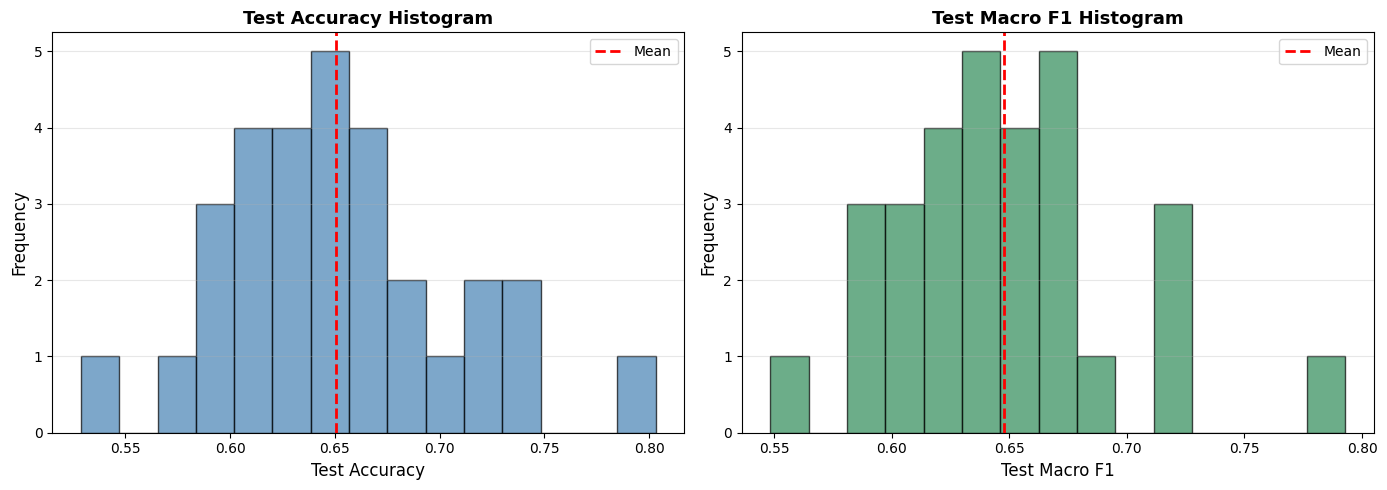

In [ ]:
# Plot distributions for front-view runs
plot_multi_run_distributions(multi_run_results_front, aggregated_stats_front)


FRONT VIEW: BEST vs WORST RUN COMPARISON
Best Run:  #5 (seed=47) - Acc: 0.8032, F1: 0.7928
Worst Run: #17 (seed=59) - Acc: 0.5287, F1: 0.5485


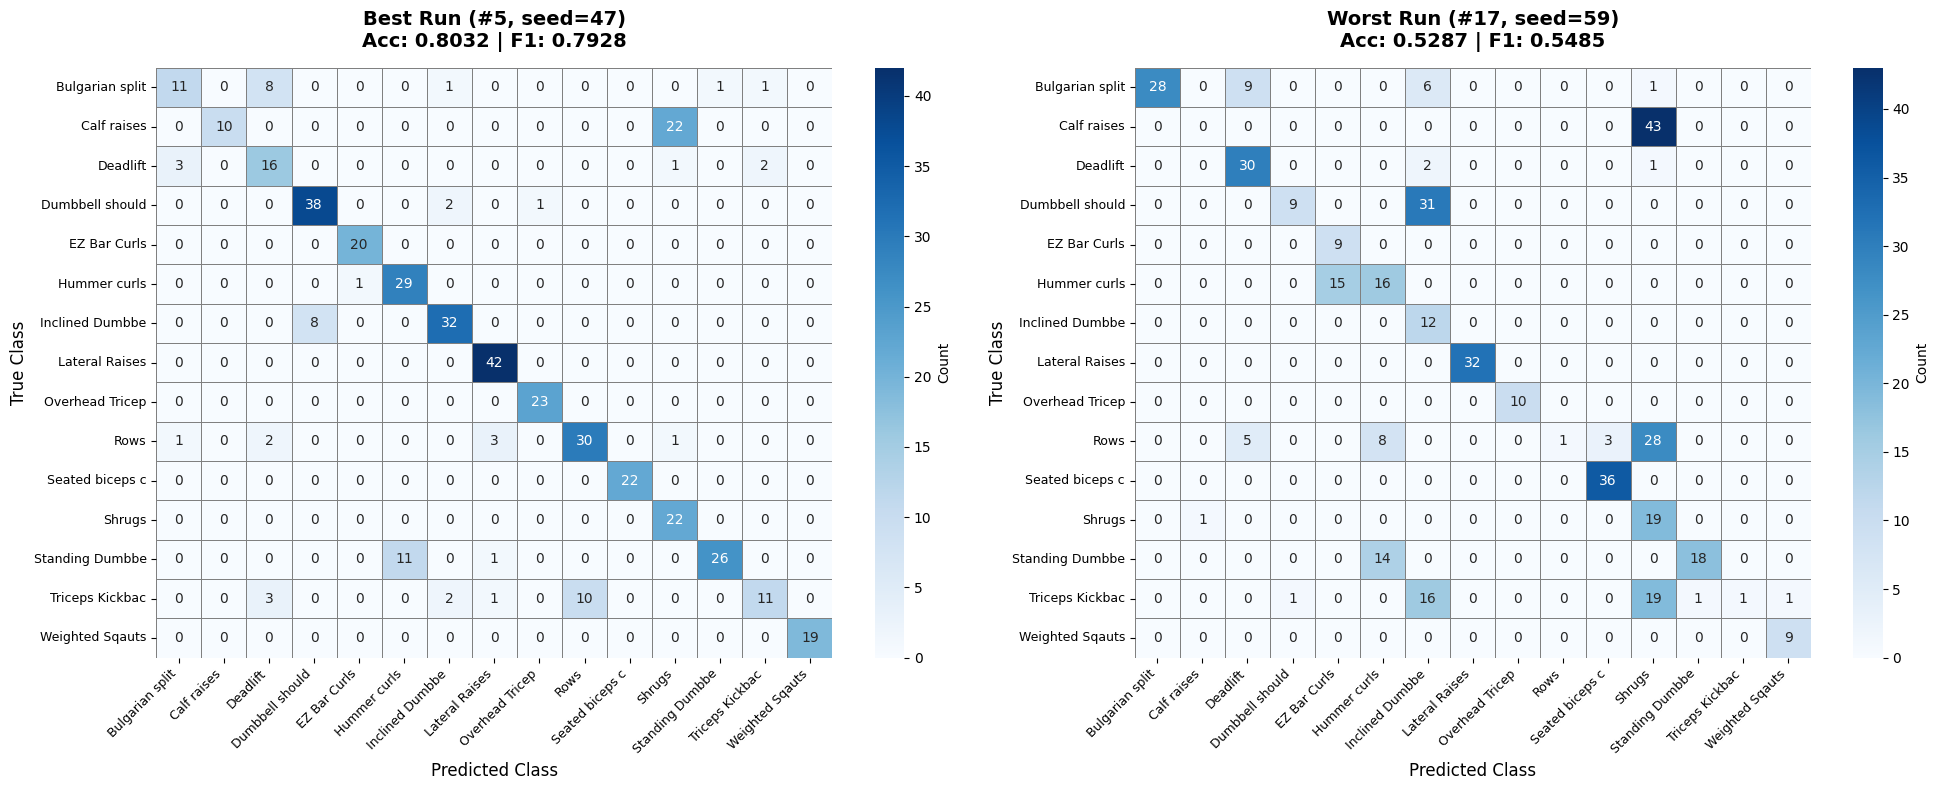


Per-Class F1 Comparison (Best vs Worst):
       Best Run  Worst Run  Difference
Class                                 
0        0.5946     0.7778     -0.1832
1        0.4762     0.0000      0.4762
2        0.6275     0.7792     -0.1518
3        0.8736     0.3600      0.5136
4        0.9756     0.5455      0.4302
5        0.8286     0.4638      0.3648
6        0.8312     0.3038      0.5274
7        0.9438     1.0000     -0.0562
8        0.9787     1.0000     -0.0213
9        0.7792     0.0435      0.7357
10       1.0000     0.9600      0.0400
11       0.6471     0.2901      0.3570
12       0.8000     0.7059      0.0941
13       0.5366     0.0500      0.4866
14       1.0000     0.9474      0.0526


In [ ]:
# Best vs worst run comparison for front-view
label_names = sorted(multi_run_results_front[0]['label_to_int'].keys())
ordered_labels = sort_labels_by_numeric_prefix(label_names)

print("\n" + "=" * 80)
print("FRONT VIEW: BEST vs WORST RUN COMPARISON")
print("=" * 80)
comparison_df_front = plot_best_worst_comparison(multi_run_results_front, ordered_labels)

## Side View: Multi-Run Analysis

Detailed analysis of 30 runs for side-view model.

In [ ]:
# Display summary table for side-view runs
print("=" * 80)
print("SIDE VIEW: SUMMARY OF 30 RUNS")
print("=" * 80)
summary_df_side = display_multi_run_summary(multi_run_results_side, aggregated_stats_side)

SIDE VIEW: SUMMARY OF 30 RUNS
AGGREGATED STATISTICS (30 runs)

Test Accuracy:  0.8270 ± 0.0315
  Min: 0.7754
  Max: 0.8952

Test Macro F1:  0.8098 ± 0.0319
  Min: 0.7488
  Max: 0.8825


Per-Class F1 Statistics (Mean ± Std):
         mean     std     min     max
Class                                
0      0.8084  0.0785  0.5714  0.9011
1      0.9027  0.0606  0.7089  1.0000
2      0.8816  0.0660  0.7692  0.9890
3      0.7242  0.1416  0.2692  0.9250
4      0.8825  0.1146  0.4706  1.0000
5      0.8664  0.1006  0.6250  1.0000
6      0.8834  0.0739  0.7407  1.0000
7      0.7100  0.1416  0.3571  0.9600
8      0.6865  0.1054  0.4528  0.9524
9      0.9304  0.0688  0.7111  1.0000
10     0.9795  0.0268  0.9000  1.0000
11     0.4367  0.2224  0.0000  0.8500
12     0.7211  0.1559  0.3103  0.9841
13     0.9068  0.0765  0.6494  1.0000
14     0.8276  0.1003  0.5161  1.0000


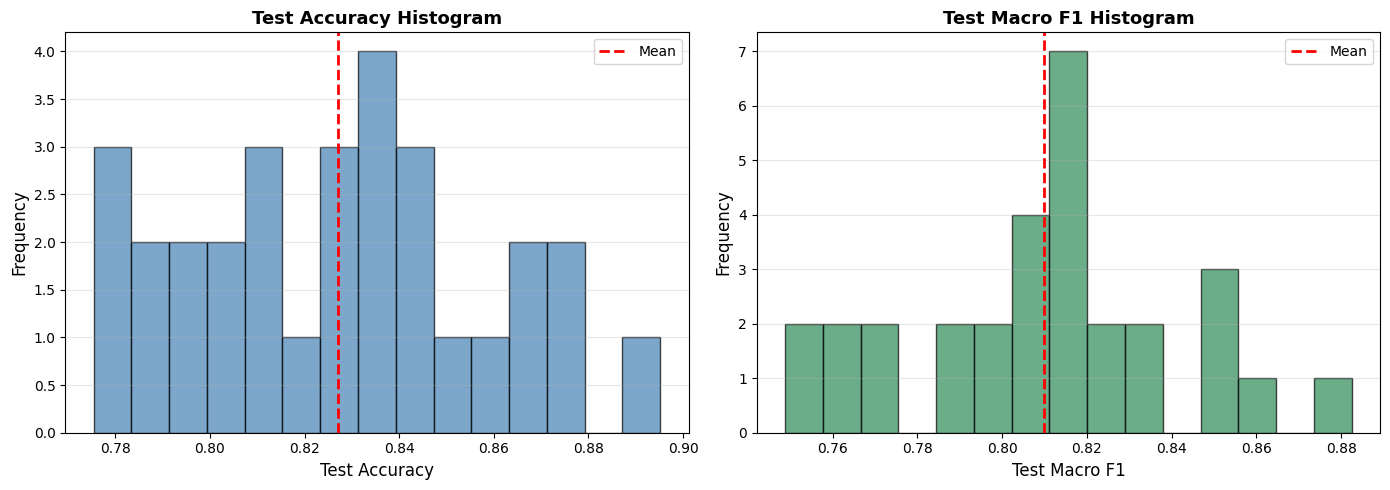

In [ ]:
# Plot distributions for side-view runs
plot_multi_run_distributions(multi_run_results_side, aggregated_stats_side)


SIDE VIEW: BEST vs WORST RUN COMPARISON
Best Run:  #3 (seed=45) - Acc: 0.8952, F1: 0.8825
Worst Run: #20 (seed=62) - Acc: 0.7754, F1: 0.7635


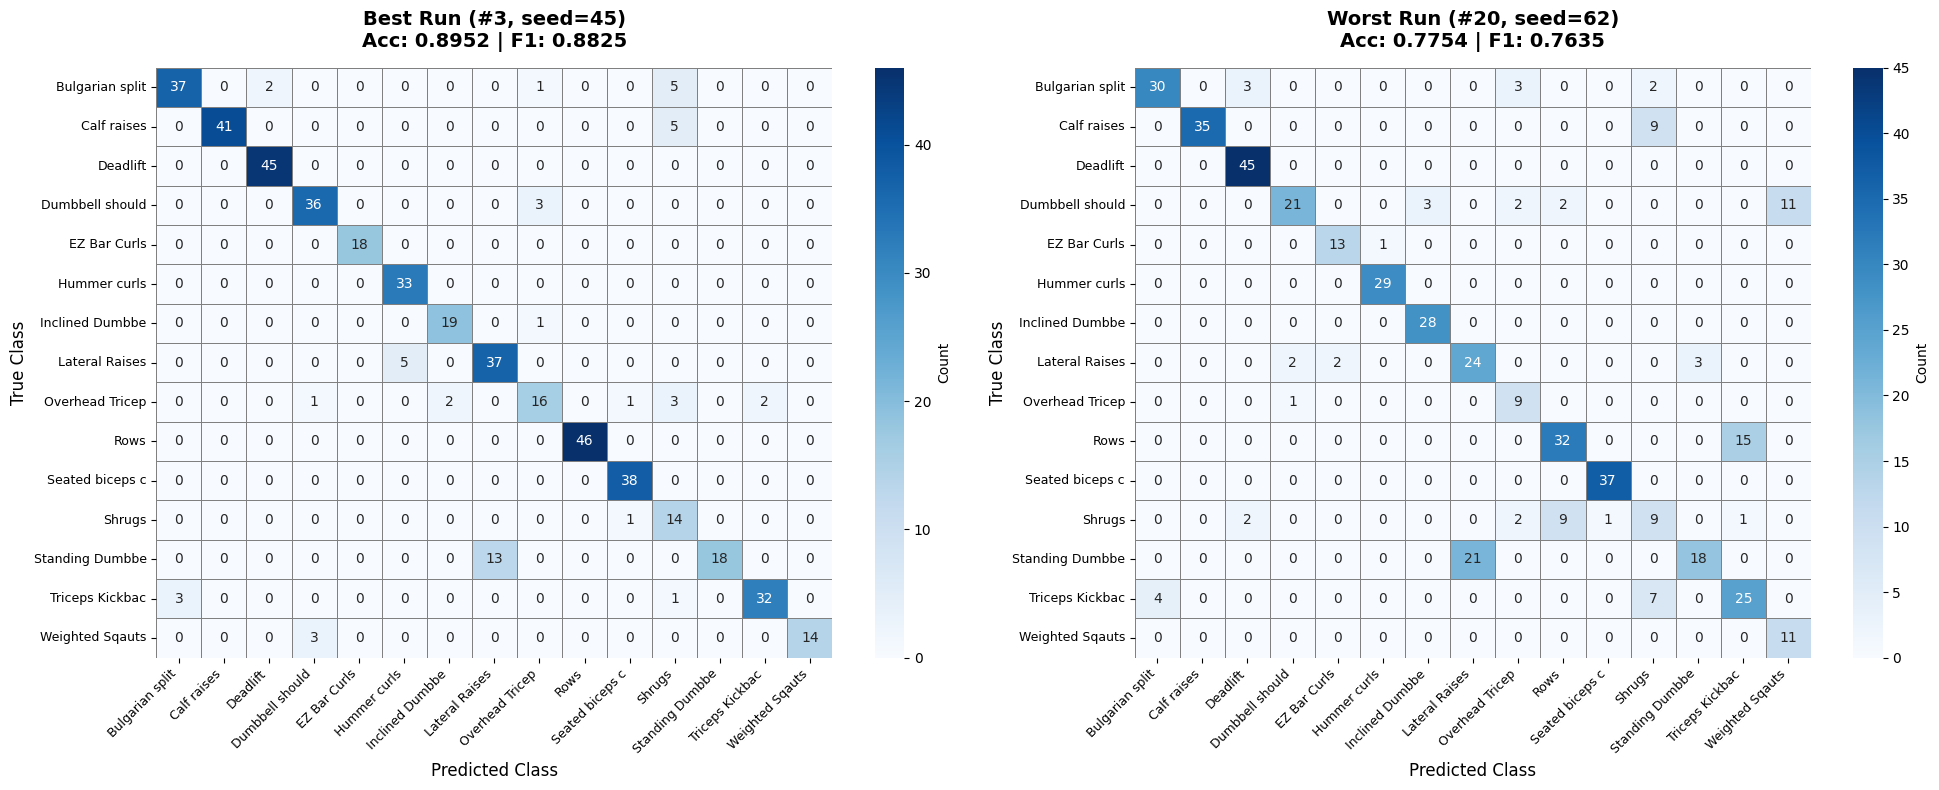


Per-Class F1 Comparison (Best vs Worst):
       Best Run  Worst Run  Difference
Class                                 
0        0.8706     0.8333      0.0373
1        0.9425     0.8861      0.0565
2        0.9783     0.9474      0.0309
3        0.9114     0.6667      0.2447
4        1.0000     0.8966      0.1034
5        0.9296     0.9831     -0.0535
6        0.9268     0.9492     -0.0223
7        0.8043     0.6316      0.1728
8        0.6957     0.6923      0.0033
9        1.0000     0.7111      0.2889
10       0.9744     0.9867     -0.0123
11       0.6512     0.3529      0.2982
12       0.7347     0.6000      0.1347
13       0.9143     0.6494      0.2649
14       0.9032     0.6667      0.2366


In [ ]:
# Best vs worst run comparison for side-view
print("\n" + "=" * 80)
print("SIDE VIEW: BEST vs WORST RUN COMPARISON")
print("=" * 80)
comparison_df_side = plot_best_worst_comparison(multi_run_results_side, ordered_labels)

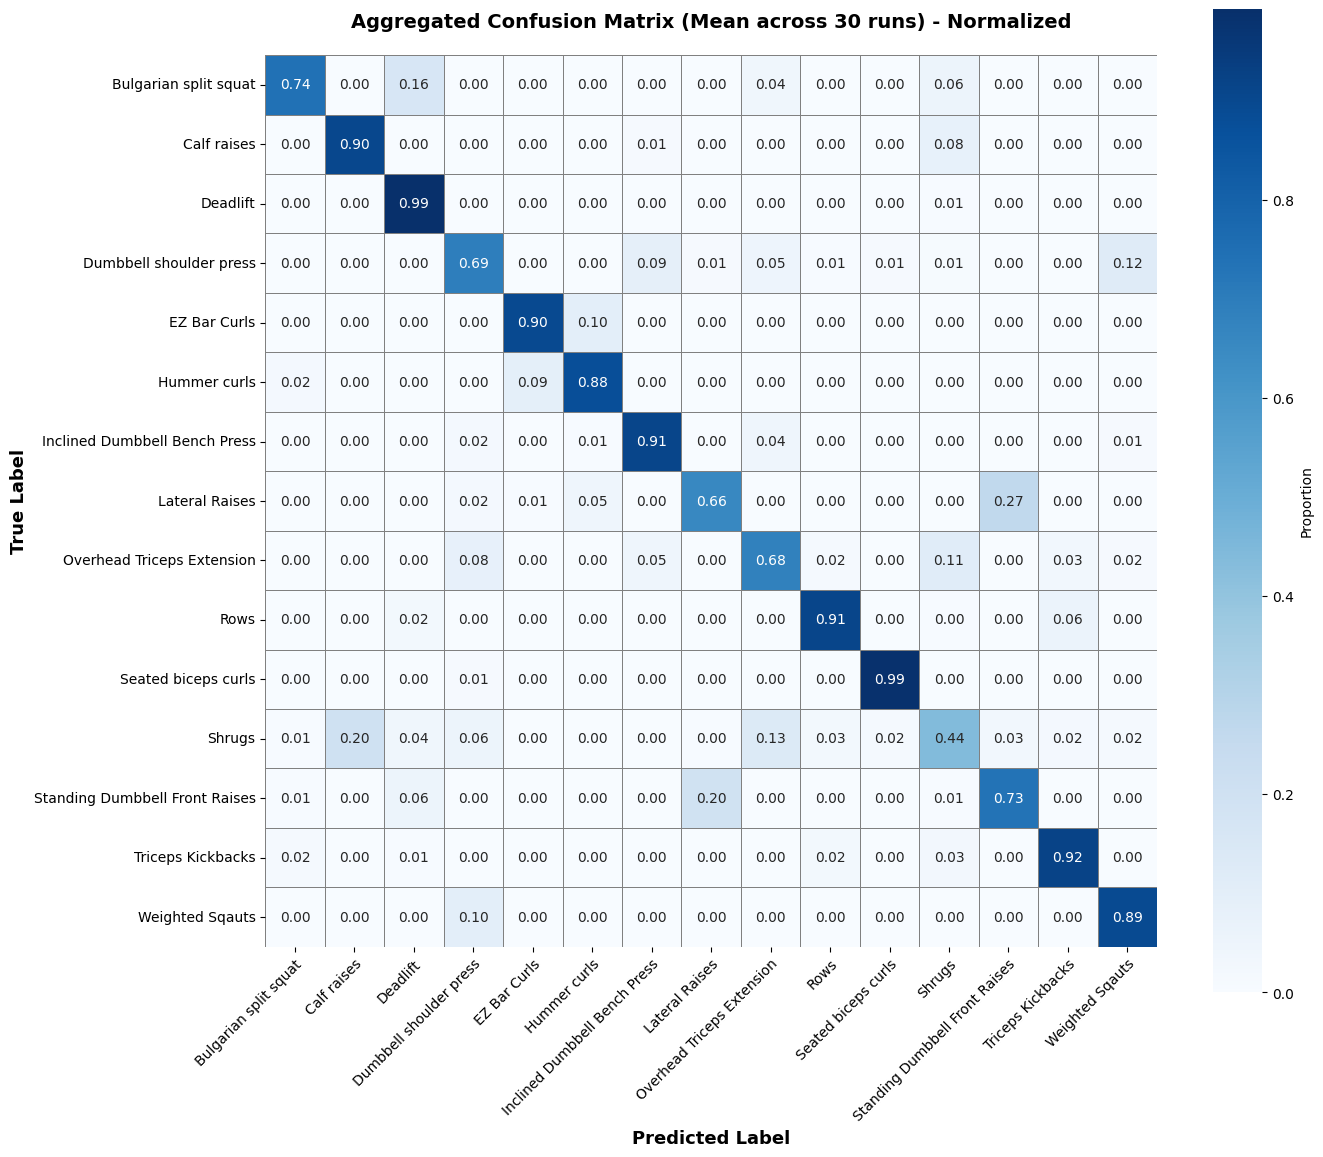

array([[2.44000000e+01, 0.00000000e+00, 5.23333333e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+00, 0.00000000e+00, 0.00000000e+00, 1.83333333e+00,
        0.00000000e+00, 6.66666667e-02, 0.00000000e+00],
       [0.00000000e+00, 3.57666667e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.33333333e-01, 0.00000000e+00,
        1.00000000e-01, 0.00000000e+00, 0.00000000e+00, 3.10000000e+00,
        0.00000000e+00, 3.33333333e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.57333333e+01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.66666667e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.66666667e-02, 2.66000000e+01,
        0.00000000e+00, 0.00000000e+00, 3.43333333e+00, 4.66666667e-01,
        1.93333333e+00, 2.33333333e-0

In [ ]:
# Aggregated confusion matrix for side-view
plot_aggregated_confusion_matrix(
    multi_run_results_side,
    label_names=ordered_labels,
    desired_class_order=ordered_labels,
    normalize=True
)

---

## Cross-Model Visualizations: Front vs Side

Side-by-side comparisons of best runs from each view.

In [ ]:
# Get best runs from each view for detailed comparison
best_run_front = max(multi_run_results_front, key=lambda x: x['test_metrics']['macro_f1'])
best_run_side = max(multi_run_results_side, key=lambda x: x['test_metrics']['macro_f1'])

print("Best Run Performance:")
print(f"  Front View - Accuracy: {best_run_front['test_metrics']['accuracy']:.4f}, Macro F1: {best_run_front['test_metrics']['macro_f1']:.4f}")
print(f"  Side View  - Accuracy: {best_run_side['test_metrics']['accuracy']:.4f}, Macro F1: {best_run_side['test_metrics']['macro_f1']:.4f}")

Best Run Performance:
  Front View - Accuracy: 0.8032, Macro F1: 0.7928
  Side View  - Accuracy: 0.8952, Macro F1: 0.8825


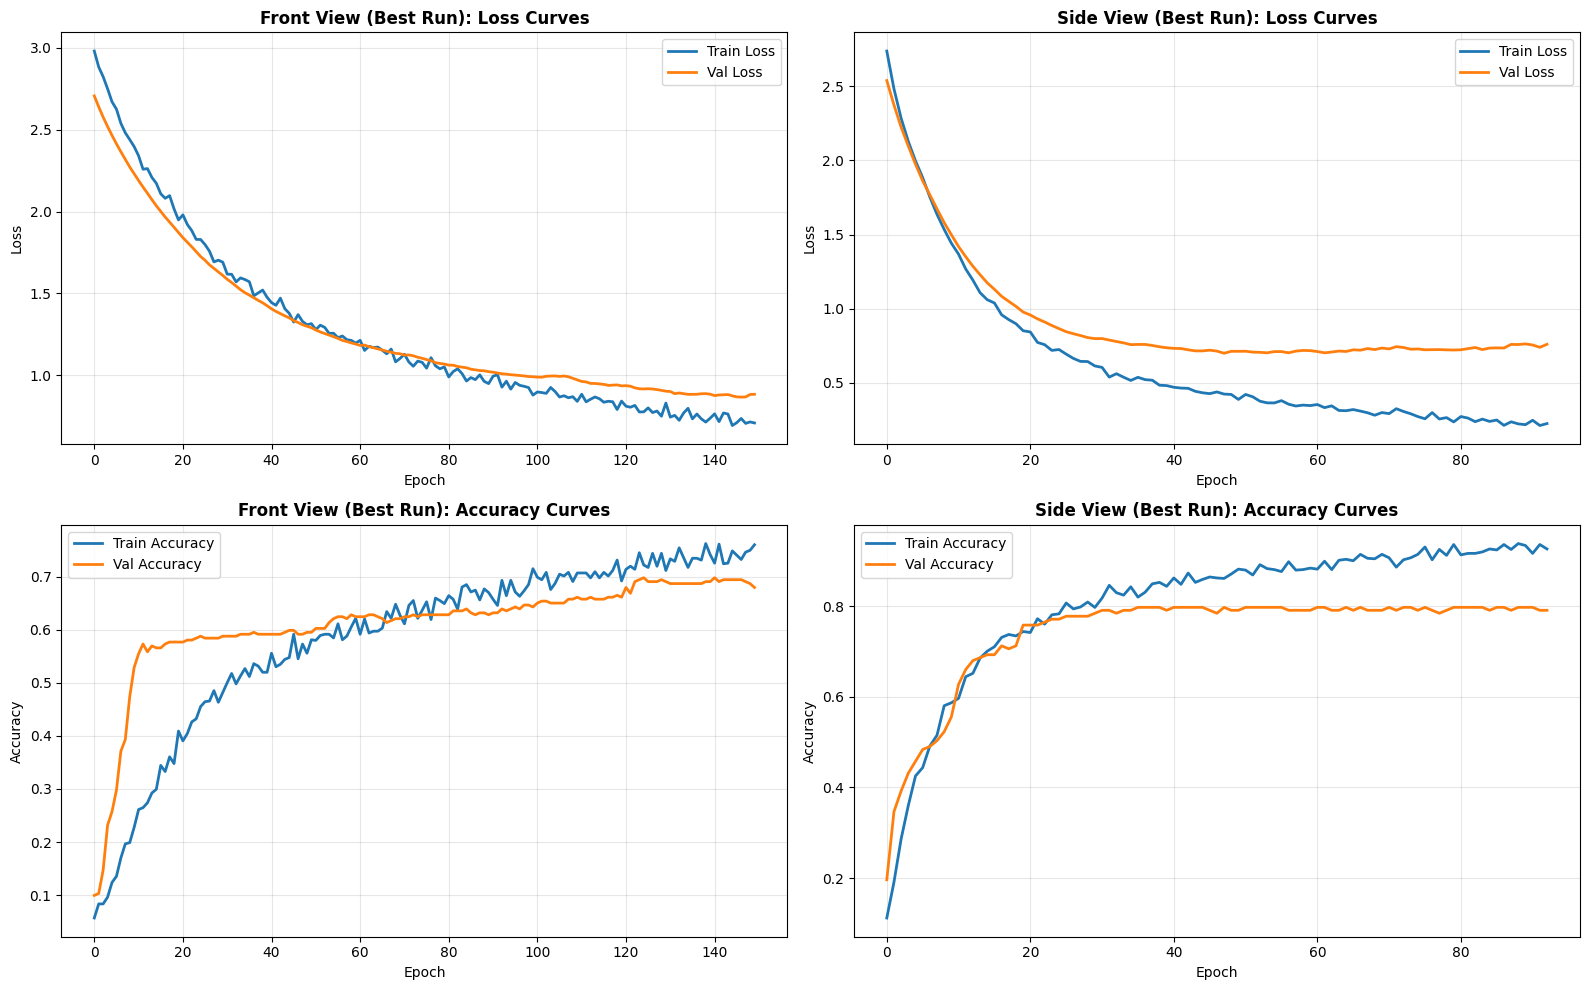

Front View (Best Run) training: 150 epochs
Side View (Best Run) training: 93 epochs


In [ ]:
# Plot training curves for best runs side-by-side
plot_dual_training_history(
    best_run_front['history'],
    best_run_side['history'],
    model_names=['Front View (Best Run)', 'Side View (Best Run)']
)

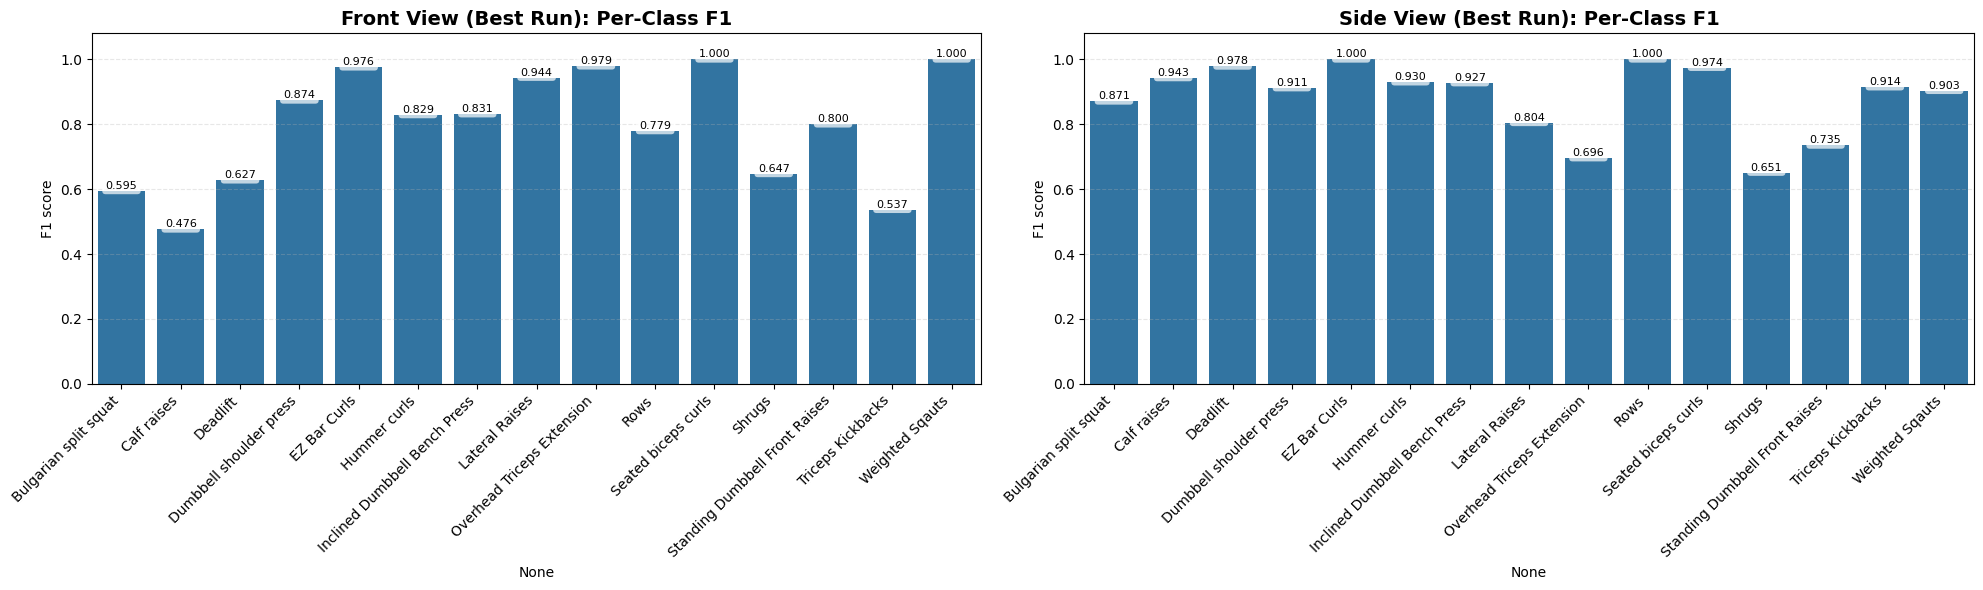

In [ ]:
# Side-by-side per-class F1 comparison (best runs)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

idx_to_label = {int(k): v for k, v in best_run_front['int_to_label'].items()}

per_class_f1_front = plot_per_class_f1_scores(
    best_run_front['test_metrics']['per_class_f1'],
    idx_to_label,
    desired_class_order=ordered_labels,
    ax=axes[0]
)
axes[0].set_title('Front View (Best Run): Per-Class F1', fontsize=14, fontweight='bold')

per_class_f1_side = plot_per_class_f1_scores(
    best_run_side['test_metrics']['per_class_f1'],
    idx_to_label,
    desired_class_order=ordered_labels,
    ax=axes[1]
)
axes[1].set_title('Side View (Best Run): Per-Class F1', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

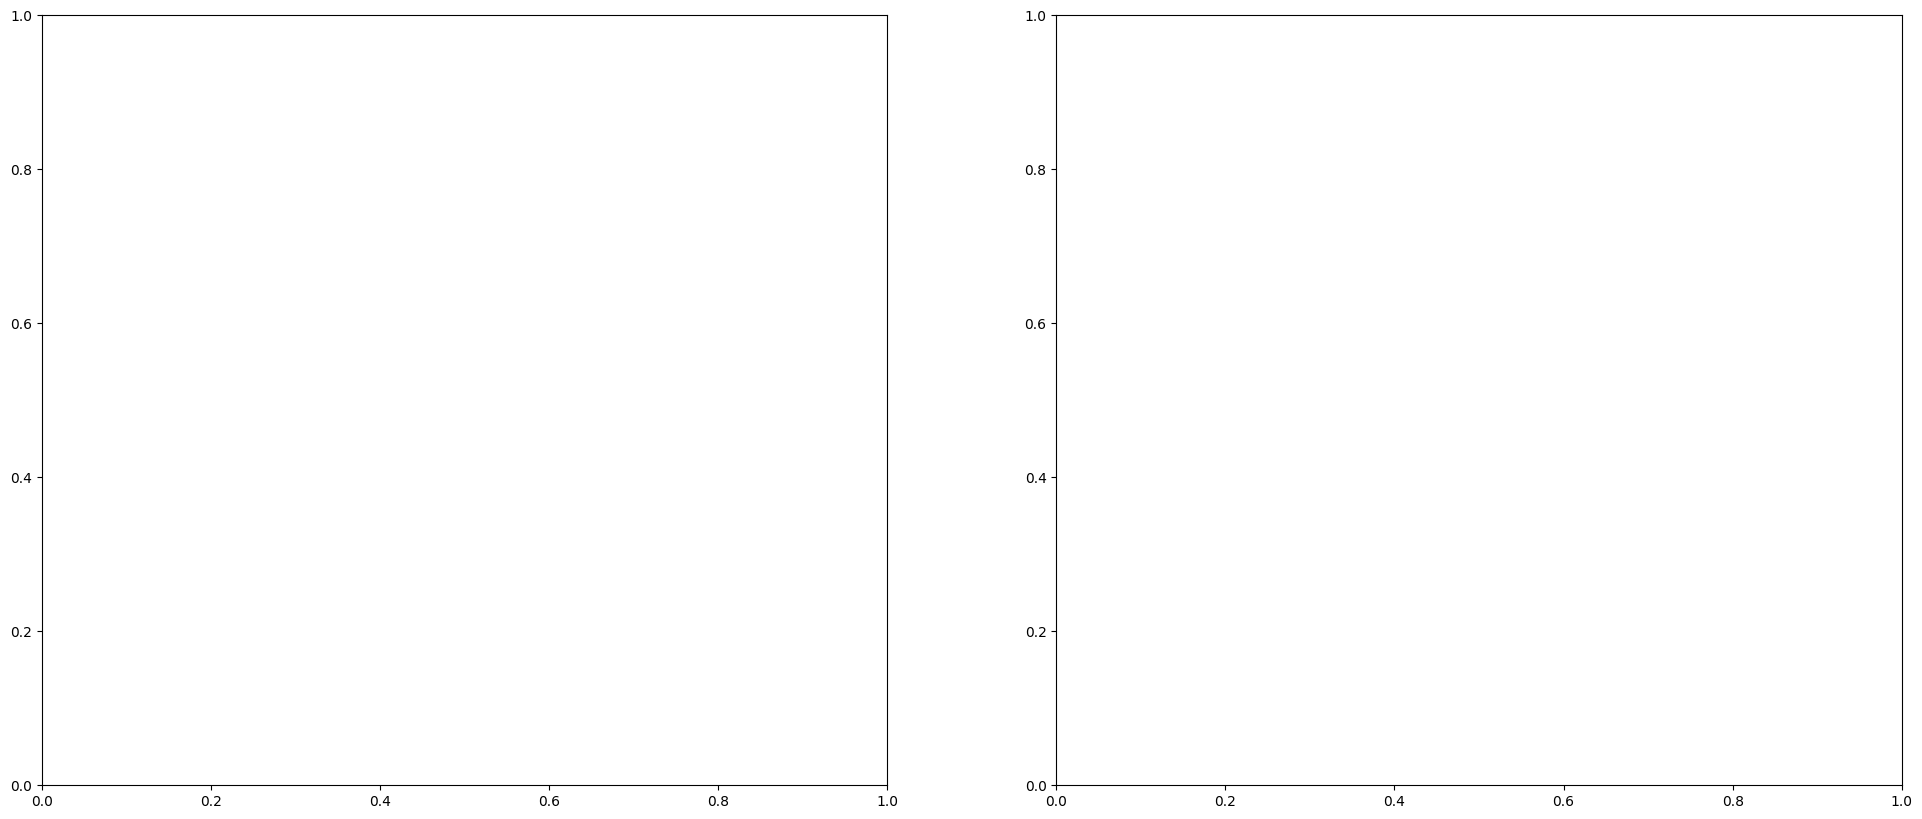

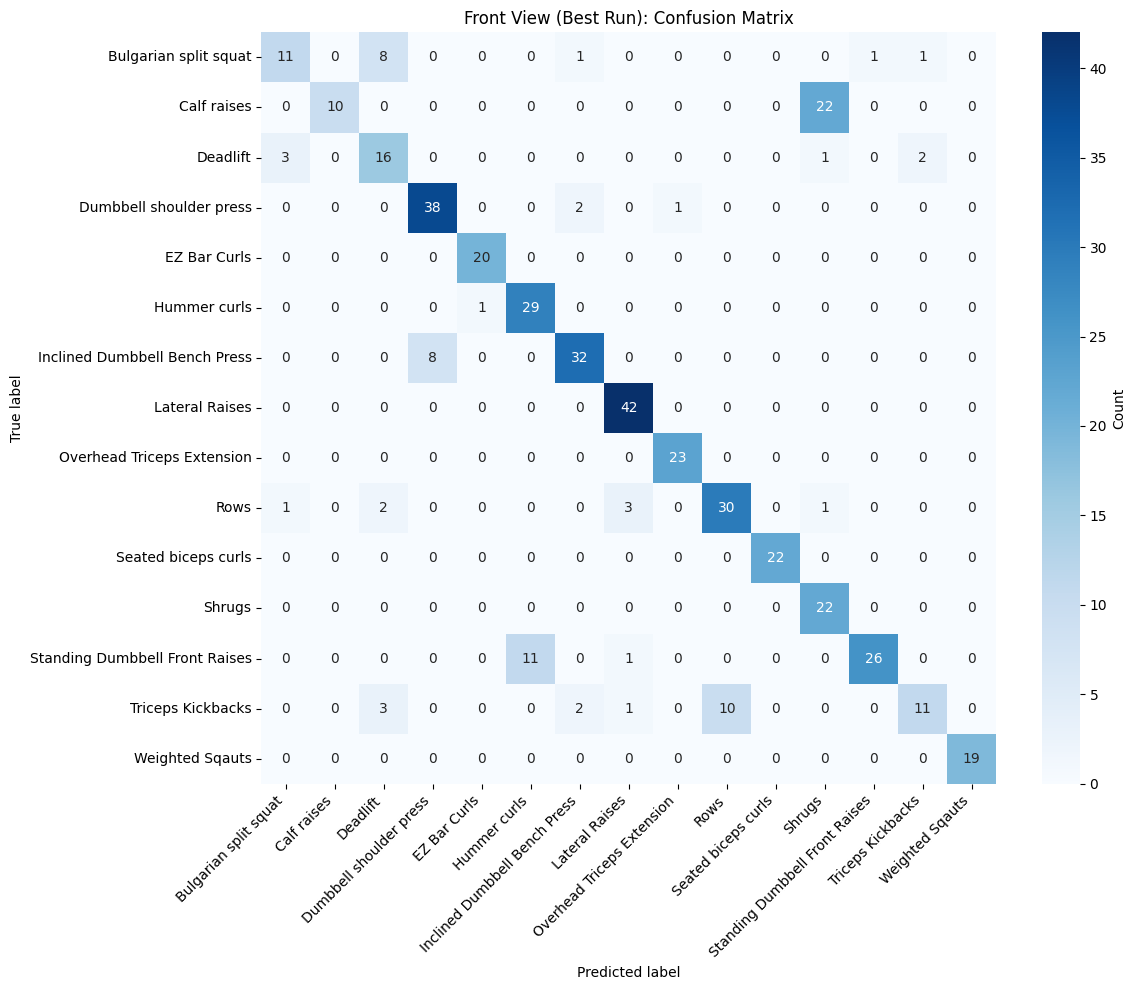

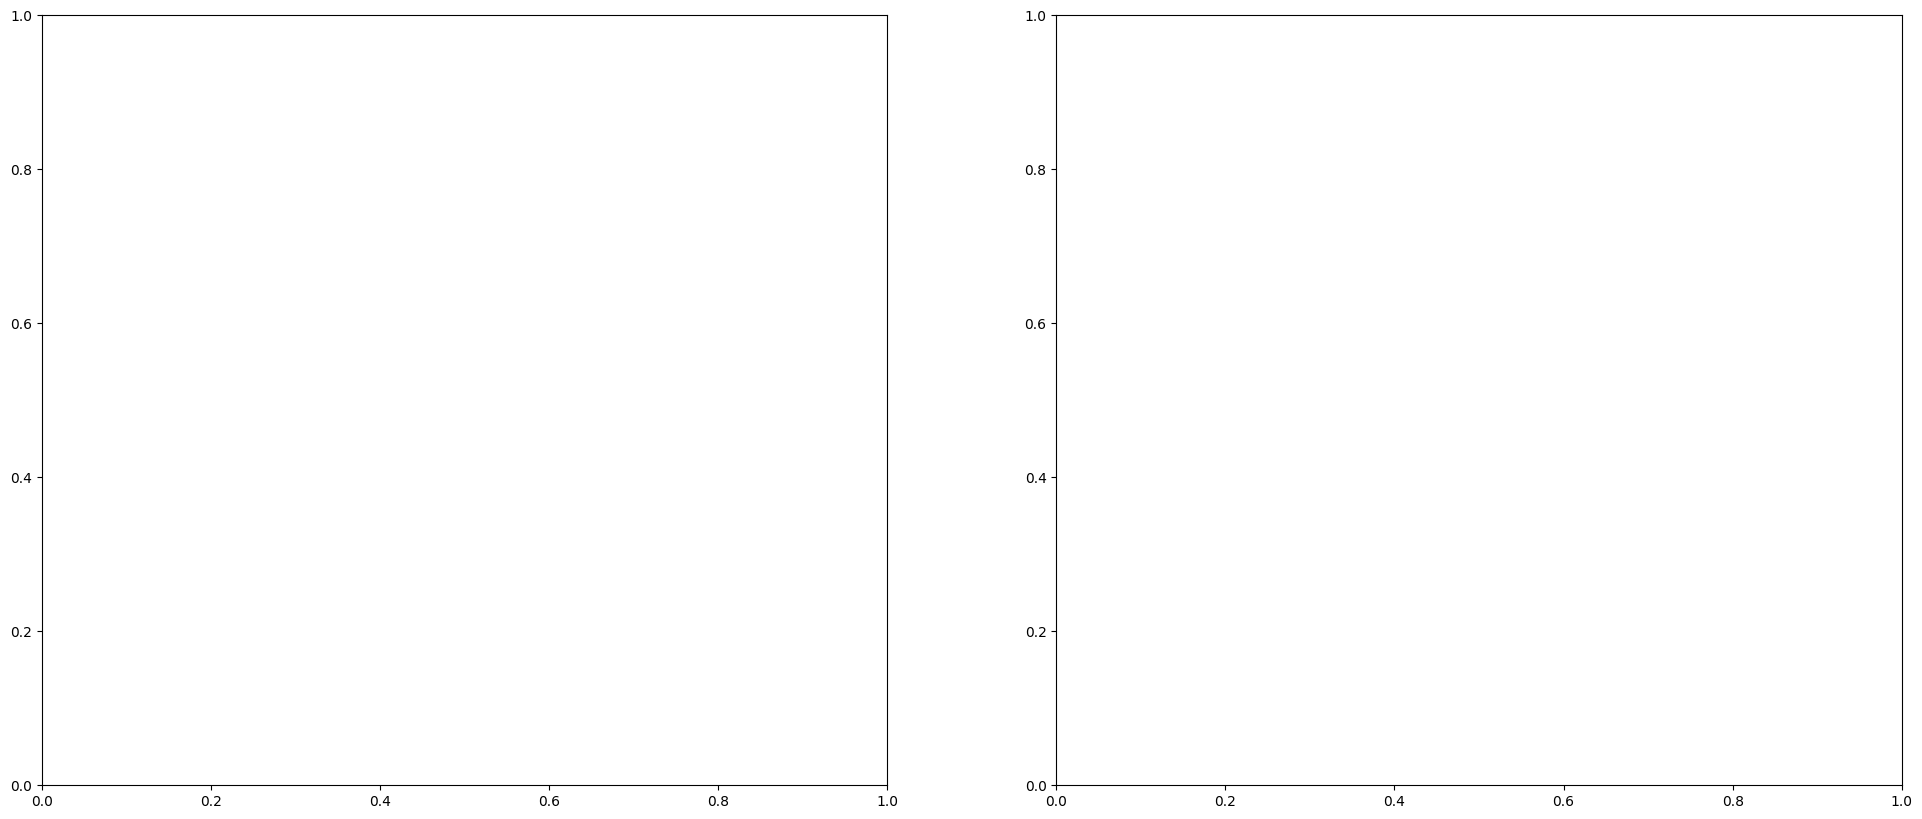

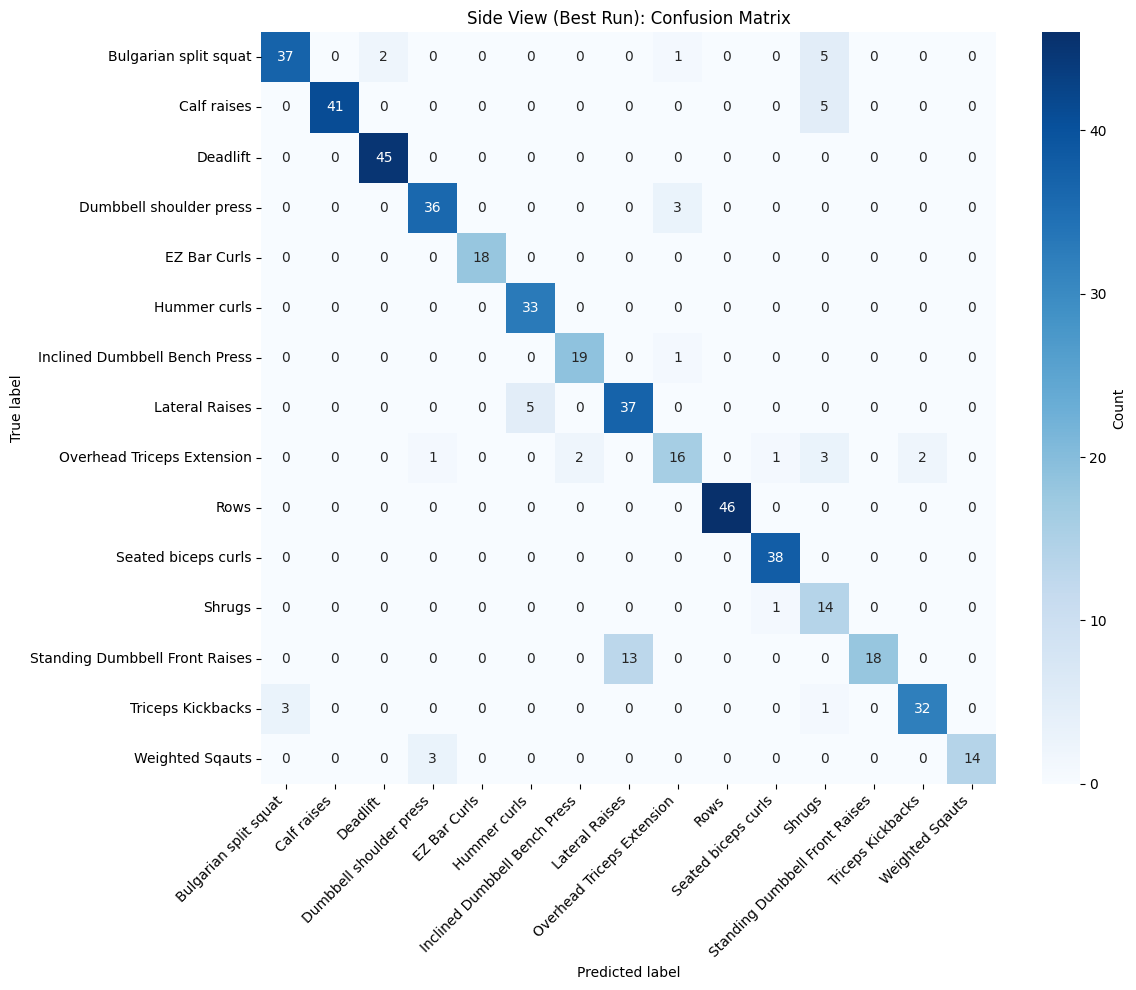

<Figure size 640x480 with 0 Axes>

In [ ]:
# Side-by-side confusion matrices (best runs)
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

conf_matrix_front = np.array(best_run_front['test_metrics']['confusion_matrix'])
plt.sca(axes[0])
plot_confusion_matrix_from_metrics(
    conf_matrix_front,
    current_class_order=label_names,
    desired_class_order=ordered_labels,
    normalize=False,
    title='Front View (Best Run): Confusion Matrix'
)

conf_matrix_side = np.array(best_run_side['test_metrics']['confusion_matrix'])
plt.sca(axes[1])
plot_confusion_matrix_from_metrics(
    conf_matrix_side,
    current_class_order=label_names,
    desired_class_order=ordered_labels,
    normalize=False,
    title='Side View (Best Run): Confusion Matrix'
)

plt.tight_layout()
plt.show()

# Experiment 6: Temporal Pose MLP (Front vs Side - Multi-Run)

---

## Part 2: Temporal Features Baseline

This section compares **temporal pose sequences (flattened)** vs the static statistical features above.

**Key Differences from Static:**
- **Data:** Temporal sequences (50 timesteps × angles) flattened to 1D vectors
- **Files:** `pose_data_front_temporal.npz` and `pose_data_side_temporal.npz`
- **Feature Engineering:** Raw temporal sequences (350-450 dims) vs hand-crafted statistics (35-45 dims)
- **Goal:** Test if raw temporal data contains more discriminative information than statistics
- **Architecture:** Same MLP architecture (fair comparison, temporal order not exploited)
- **Future Work:** LSTM/1D-CNN architectures will leverage temporal ordering

**Feature Dimensionality:**
- **Front Temporal:** 8 selected angles × 50 timesteps = 400 features
- **Side Temporal:** 7 selected angles × 50 timesteps = 350 features
- **Static (for comparison):** 8-9 angles × 5 statistics = 40-45 features

In [4]:
# Reload modules to pick up temporal training functions
importlib.reload(src.data.data_loader)
importlib.reload(src.scripts.experiment_6)

from src.data.data_loader import load_pose_temporal_data
from src.scripts.experiment_6 import train_experiment_6_temporal_multi_run

In [8]:
# Define paths to temporal pose NPZ files
front_temporal_npz = PROJECT_ROOT / 'datasets' / 'Mediapipe pose estimates' / 'pose_data_front_temporal_v3.npz'
side_temporal_npz = PROJECT_ROOT / 'datasets' / 'Mediapipe pose estimates' / 'pose_data_side_temporal_v3.npz'

# Load and summarize front-view temporal data
front_temporal_dataset, front_temporal_summary = load_pose_temporal_data(str(front_temporal_npz))
print("Front-view temporal features:")
print(f"  Samples: {front_temporal_summary['count']}")
print(f"  Subjects: {front_temporal_summary['unique_subjects']}")
print(f"  Classes: {front_temporal_summary['unique_classes']}")
print(f"  Temporal shape: {front_temporal_summary['temporal_shape']} (timesteps × angles)")
print(f"  Flattened to: {front_temporal_summary['temporal_shape'][0] * front_temporal_summary['temporal_shape'][1]} features per sample")


# Load and summarize side-view temporal data
side_temporal_dataset, side_temporal_summary = load_pose_temporal_data(str(side_temporal_npz))
print("\nSide-view temporal features:")
print(f"  Samples: {side_temporal_summary['count']}")
print(f"  Subjects: {side_temporal_summary['unique_subjects']}")
print(f"  Classes: {side_temporal_summary['unique_classes']}")
print(f"  Temporal shape: {side_temporal_summary['temporal_shape']} (timesteps × angles)")
print(f"  Flattened to: {side_temporal_summary['temporal_shape'][0] * side_temporal_summary['temporal_shape'][1]} features per sample")

INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)


Front-view temporal features:
  Samples: 1574
  Subjects: 49
  Classes: 15
  Temporal shape: (50, 13) (timesteps × angles)
  Flattened to: 650 features per sample

Side-view temporal features:
  Samples: 1571
  Subjects: 49
  Classes: 15
  Temporal shape: (50, 13) (timesteps × angles)
  Flattened to: 650 features per sample


---

## Multi-Run Training: Temporal Front View (30 Runs)

Execute 30 training runs with different random seeds using `config/experiment_6_temporal_front.yaml`.

**Configuration:**
- Temporal sequences flattened to 1D vectors (8 angles × 50 timesteps = 400 features)
- Results saved to `experiments/exer_recog/results/exp_06_pose_mlp_temporal/front/`
- Same MLP architecture as static (256 → 128 hidden layers)
- Early stopping with patience=30 on validation loss

In [7]:
# Train temporal front-view model with multi-run (30 runs)
print("=" * 80)
print("MULTI-RUN TRAINING: TEMPORAL FRONT VIEW (30 RUNS)")
print("=" * 80)

config_path_temporal_front = PROJECT_ROOT / 'config' / 'experiment_6_temporal_front.yaml'

multi_run_results_temporal_front, aggregated_stats_temporal_front = train_experiment_6_temporal_multi_run(
    npz_path=str(front_temporal_npz),
    config_path=str(config_path_temporal_front)
)

print("\n✅ Temporal front-view multi-run training complete!")
print(f"Mean Test Accuracy: {aggregated_stats_temporal_front['test_accuracy']['mean']:.4f} ± {aggregated_stats_temporal_front['test_accuracy']['std']:.4f}")
print(f"Mean Test Macro F1: {aggregated_stats_temporal_front['test_macro_f1']['mean']:.4f} ± {aggregated_stats_temporal_front['test_macro_f1']['std']:.4f}")

INFO - Multi-run parent folder: /mnt/d/Graduation_Project/ai-virtual-coach/experiments/exer_recog/results/exp_06_pose_mlp_temporal/front/multi_run_005
INFO - 
INFO - Starting run 1/30 (seed=43)
INFO - ================================================================================
INFO - Global random seed set to: 43
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=856, val=271, test=447, classes=15


MULTI-RUN TRAINING: TEMPORAL FRONT VIEW (30 RUNS)


I0000 00:00:1767872352.659937 1157546 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5518 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
INFO - Datasets built with feature_dim=650


Epoch 1/150
44/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1188 - loss: 3.0922

I0000 00:00:1767872359.596943 1192155 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.1636 - loss: 2.7697 - val_accuracy: 0.3838 - val_loss: 2.1253 - learning_rate: 8.0000e-05
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3727 - loss: 2.0015 - val_accuracy: 0.5867 - val_loss: 1.7317 - learning_rate: 8.0000e-05
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5397 - loss: 1.5200 - val_accuracy: 0.6494 - val_loss: 1.4545 - learning_rate: 8.0000e-05
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6355 - loss: 1.1951 - val_accuracy: 0.6568 - val_loss: 1.2774 - learning_rate: 8.0000e-05
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7173 - loss: 0.9265 - val_accuracy: 0.6642 - val_loss: 1.1709 - learning_rate: 8.0000e-05
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7909 - loss: 0.7509 - val_accuracy: 0.6679 - val_loss: 1.1018 - learning_rate: 8.0000e-05
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8061 - loss: 0

INFO - Run 1 complete: acc=0.7047, macro_f1=0.7035
INFO - 
INFO - Starting run 2/30 (seed=44)
INFO - ================================================================================
INFO - Global random seed set to: 44
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
ERROR - Test split missing classes: ['Deadlift']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=1030, val=205, test=339, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.2078 - loss: 2.5880 - val_accuracy: 0.6390 - val_loss: 1.7235 - learning_rate: 8.0000e-05
Epoch 2/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3913 - loss: 1.8804 - val_accuracy: 0.7756 - val_loss: 1.2697 - learning_rate: 8.0000e-05
Epoch 3/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5515 - loss: 1.4716 - val_accuracy: 0.7707 - val_loss: 1.0079 - learning_rate: 8.0000e-05
Epoch 4/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6670 - loss: 1.1366 - val_accuracy: 0.8049 - val_loss: 0.8538 - learning_rate: 8.0000e-05
Epoch 5/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7126 - loss: 0.9651 - val_accuracy: 0.7805 - val_loss: 0.7646 - learning_rate: 8.0000e-05
Epoch 6/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7806 - loss: 0.7932 - val_accuracy: 0.8000 - val_loss: 0.6937 - learning_rate: 8.0000e-05
Epoch 7/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7961

INFO - Run 2 complete: acc=0.7670, macro_f1=0.6725
INFO - 
INFO - Starting run 3/30 (seed=45)
INFO - ================================================================================
INFO - Global random seed set to: 45
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=900, val=219, test=455, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.1622 - loss: 2.6578 - val_accuracy: 0.4384 - val_loss: 1.9881 - learning_rate: 8.0000e-05
Epoch 2/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3644 - loss: 1.9477 - val_accuracy: 0.4840 - val_loss: 1.6219 - learning_rate: 8.0000e-05
Epoch 3/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5444 - loss: 1.5092 - val_accuracy: 0.6027 - val_loss: 1.3873 - learning_rate: 8.0000e-05
Epoch 4/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6089 - loss: 1.2141 - val_accuracy: 0.6393 - val_loss: 1.2232 - learning_rate: 8.0000e-05
Epoch 5/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6967 - loss: 0.9817 - val_accuracy: 0.6347 - val_loss: 1.1418 - learning_rate: 8.0000e-05
Epoch 6/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7589 - loss: 0.8117 - val_accuracy: 0.6393 - val_loss: 1.0566 - learning_rate: 8.0000e-05
Epoch 7/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.823

INFO - Run 3 complete: acc=0.7714, macro_f1=0.7633
INFO - 
INFO - Starting run 4/30 (seed=46)
INFO - ================================================================================
INFO - Global random seed set to: 46
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Deadlift', 'Seated biceps curls']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=1029, val=180, test=365, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.1302 - loss: 2.8102 - val_accuracy: 0.3667 - val_loss: 2.0708 - learning_rate: 8.0000e-05
Epoch 2/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3392 - loss: 1.9915 - val_accuracy: 0.5000 - val_loss: 1.5922 - learning_rate: 8.0000e-05
Epoch 3/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5364 - loss: 1.5125 - val_accuracy: 0.6500 - val_loss: 1.2422 - learning_rate: 8.0000e-05
Epoch 4/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6365 - loss: 1.2158 - val_accuracy: 0.6722 - val_loss: 1.0659 - learning_rate: 8.0000e-05
Epoch 5/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7026 - loss: 0.9745 - val_accuracy: 0.7500 - val_loss: 0.9036 - learning_rate: 8.0000e-05
Epoch 6/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7668 - loss: 0.7670 - val_accuracy: 0.7611 - val_loss: 0.8039 - learning_rate: 8.0000e-05
Epoch 7/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7979

INFO - Run 4 complete: acc=0.7890, macro_f1=0.7442
INFO - 
INFO - Starting run 5/30 (seed=47)
INFO - ================================================================================
INFO - Global random seed set to: 47
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=859, val=235, test=480, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.1455 - loss: 2.8597 - val_accuracy: 0.4255 - val_loss: 2.0316 - learning_rate: 8.0000e-05
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3679 - loss: 1.9589 - val_accuracy: 0.4851 - val_loss: 1.7107 - learning_rate: 8.0000e-05
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5087 - loss: 1.5099 - val_accuracy: 0.5617 - val_loss: 1.4942 - learning_rate: 8.0000e-05
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5937 - loss: 1.2441 - val_accuracy: 0.5702 - val_loss: 1.3523 - learning_rate: 8.0000e-05
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7125 - loss: 0.9559 - val_accuracy: 0.6000 - val_loss: 1.2463 - learning_rate: 8.0000e-05
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7509 - loss: 0.8164 - val_accuracy: 0.6255 - val_loss: 1.1732 - learning_rate: 8.0000e-05
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8009

INFO - Run 5 complete: acc=0.7250, macro_f1=0.7178
INFO - 
INFO - Starting run 6/30 (seed=48)
INFO - ================================================================================
INFO - Global random seed set to: 48
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=854, val=236, test=484, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.1276 - loss: 2.7986 - val_accuracy: 0.3983 - val_loss: 2.0881 - learning_rate: 8.0000e-05
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3759 - loss: 1.9601 - val_accuracy: 0.5636 - val_loss: 1.6737 - learning_rate: 8.0000e-05
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5515 - loss: 1.4729 - val_accuracy: 0.6102 - val_loss: 1.4008 - learning_rate: 8.0000e-05
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6792 - loss: 1.1323 - val_accuracy: 0.6695 - val_loss: 1.2054 - learning_rate: 8.0000e-05
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7108 - loss: 0.9743 - val_accuracy: 0.7161 - val_loss: 1.0796 - learning_rate: 8.0000e-05
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7705 - loss: 0.7978 - val_accuracy: 0.7203 - val_loss: 0.9716 - learning_rate: 8.0000e-05
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8208

INFO - Run 6 complete: acc=0.7107, macro_f1=0.7049
INFO - 
INFO - Starting run 7/30 (seed=49)
INFO - ================================================================================
INFO - Global random seed set to: 49
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=865, val=249, test=460, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.1214 - loss: 2.8650 - val_accuracy: 0.4659 - val_loss: 2.0500 - learning_rate: 8.0000e-05
Epoch 2/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3353 - loss: 2.0071 - val_accuracy: 0.5301 - val_loss: 1.6368 - learning_rate: 8.0000e-05
Epoch 3/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4913 - loss: 1.6213 - val_accuracy: 0.6024 - val_loss: 1.4023 - learning_rate: 8.0000e-05
Epoch 4/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5908 - loss: 1.3052 - val_accuracy: 0.6506 - val_loss: 1.2766 - learning_rate: 8.0000e-05
Epoch 5/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6520 - loss: 1.0975 - val_accuracy: 0.6466 - val_loss: 1.1974 - learning_rate: 8.0000e-05
Epoch 6/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6705 - loss: 1.0214 - val_accuracy: 0.6506 - val_loss: 1.1176 - learning_rate: 8.0000e-05
Epoch 7/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7445

INFO - Run 7 complete: acc=0.8674, macro_f1=0.8605
INFO - 
INFO - Starting run 8/30 (seed=50)
INFO - ================================================================================
INFO - Global random seed set to: 50
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=889, val=183, test=502, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.1125 - loss: 2.8227 - val_accuracy: 0.4863 - val_loss: 2.0807 - learning_rate: 8.0000e-05
Epoch 2/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3836 - loss: 1.9459 - val_accuracy: 0.6011 - val_loss: 1.6685 - learning_rate: 8.0000e-05
Epoch 3/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5073 - loss: 1.5731 - val_accuracy: 0.6721 - val_loss: 1.4019 - learning_rate: 8.0000e-05
Epoch 4/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6378 - loss: 1.1918 - val_accuracy: 0.6776 - val_loss: 1.2161 - learning_rate: 8.0000e-05
Epoch 5/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6907 - loss: 0.9877 - val_accuracy: 0.7213 - val_loss: 1.0740 - learning_rate: 8.0000e-05
Epoch 6/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7638 - loss: 0.7887 - val_accuracy: 0.7322 - val_loss: 1.0028 - learning_rate: 8.0000e-05
Epoch 7/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8031

INFO - Run 8 complete: acc=0.8028, macro_f1=0.7998
INFO - 
INFO - Starting run 9/30 (seed=51)
INFO - ================================================================================
INFO - Global random seed set to: 51
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=875, val=204, test=495, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.1303 - loss: 2.8315 - val_accuracy: 0.4902 - val_loss: 2.1407 - learning_rate: 8.0000e-05
Epoch 2/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3451 - loss: 2.0127 - val_accuracy: 0.4853 - val_loss: 1.7660 - learning_rate: 8.0000e-05
Epoch 3/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5029 - loss: 1.5933 - val_accuracy: 0.5245 - val_loss: 1.4999 - learning_rate: 8.0000e-05
Epoch 4/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6057 - loss: 1.2690 - val_accuracy: 0.6324 - val_loss: 1.2915 - learning_rate: 8.0000e-05
Epoch 5/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6914 - loss: 1.0156 - val_accuracy: 0.6716 - val_loss: 1.1528 - learning_rate: 8.0000e-05
Epoch 6/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7497 - loss: 0.8424 - val_accuracy: 0.6912 - val_loss: 1.0419 - learning_rate: 8.0000e-05
Epoch 7/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7783

INFO - Run 9 complete: acc=0.7919, macro_f1=0.7965
INFO - 
INFO - Starting run 10/30 (seed=52)
INFO - ================================================================================
INFO - Global random seed set to: 52
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Lateral Raises']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=906, val=165, test=503, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.1391 - loss: 2.7388 - val_accuracy: 0.5030 - val_loss: 2.0779 - learning_rate: 8.0000e-05
Epoch 2/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3620 - loss: 2.0302 - val_accuracy: 0.5394 - val_loss: 1.7278 - learning_rate: 8.0000e-05
Epoch 3/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5199 - loss: 1.5472 - val_accuracy: 0.5697 - val_loss: 1.4638 - learning_rate: 8.0000e-05
Epoch 4/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6358 - loss: 1.2274 - val_accuracy: 0.6364 - val_loss: 1.2608 - learning_rate: 8.0000e-05
Epoch 5/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7053 - loss: 1.0263 - val_accuracy: 0.6545 - val_loss: 1.1545 - learning_rate: 8.0000e-05
Epoch 6/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7517 - loss: 0.8566 - val_accuracy: 0.7030 - val_loss: 1.0778 - learning_rate: 8.0000e-05
Epoch 7/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.791

INFO - Run 10 complete: acc=0.8012, macro_f1=0.7834
INFO - 
INFO - Starting run 11/30 (seed=53)
INFO - ================================================================================
INFO - Global random seed set to: 53
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Lateral Raises']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=916, val=203, test=455, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.1255 - loss: 2.8972 - val_accuracy: 0.4631 - val_loss: 2.1226 - learning_rate: 8.0000e-05
Epoch 2/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3559 - loss: 1.9937 - val_accuracy: 0.5567 - val_loss: 1.7856 - learning_rate: 8.0000e-05
Epoch 3/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 1.5625 - val_accuracy: 0.5468 - val_loss: 1.5742 - learning_rate: 8.0000e-05
Epoch 4/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6386 - loss: 1.2073 - val_accuracy: 0.5419 - val_loss: 1.4342 - learning_rate: 8.0000e-05
Epoch 5/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7216 - loss: 0.9466 - val_accuracy: 0.5567 - val_loss: 1.3609 - learning_rate: 8.0000e-05
Epoch 6/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8079 - loss: 0.7463 - val_accuracy: 0.5468 - val_loss: 1.3383 - learning_rate: 8.0000e-05
Epoch 7/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7904

INFO - Run 11 complete: acc=0.6615, macro_f1=0.6002
INFO - 
INFO - Starting run 12/30 (seed=54)
INFO - ================================================================================
INFO - Global random seed set to: 54
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=946, val=201, test=427, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.1427 - loss: 2.9287 - val_accuracy: 0.3632 - val_loss: 2.1435 - learning_rate: 8.0000e-05
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3288 - loss: 2.0814 - val_accuracy: 0.5274 - val_loss: 1.7278 - learning_rate: 8.0000e-05
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4619 - loss: 1.6821 - val_accuracy: 0.5970 - val_loss: 1.4035 - learning_rate: 8.0000e-05
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6099 - loss: 1.3009 - val_accuracy: 0.6219 - val_loss: 1.1620 - learning_rate: 8.0000e-05
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7104 - loss: 1.0220 - val_accuracy: 0.6418 - val_loss: 1.0228 - learning_rate: 8.0000e-05
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7389 - loss: 0.8792 - val_accuracy: 0.6816 - val_loss: 0.8762 - learning_rate: 8.0000e-05
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7738

INFO - Run 12 complete: acc=0.8033, macro_f1=0.8018
INFO - 
INFO - Starting run 13/30 (seed=55)
INFO - ================================================================================
INFO - Global random seed set to: 55
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=822, val=245, test=507, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.1168 - loss: 2.8894 - val_accuracy: 0.4939 - val_loss: 2.0959 - learning_rate: 8.0000e-05
Epoch 2/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3017 - loss: 2.0954 - val_accuracy: 0.6571 - val_loss: 1.5797 - learning_rate: 8.0000e-05
Epoch 3/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5049 - loss: 1.5818 - val_accuracy: 0.7469 - val_loss: 1.2069 - learning_rate: 8.0000e-05
Epoch 4/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6168 - loss: 1.2624 - val_accuracy: 0.7306 - val_loss: 0.9793 - learning_rate: 8.0000e-05
Epoch 5/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6946 - loss: 0.9961 - val_accuracy: 0.7510 - val_loss: 0.8264 - learning_rate: 8.0000e-05
Epoch 6/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7628 - loss: 0.8396 - val_accuracy: 0.7592 - val_loss: 0.7475 - learning_rate: 8.0000e-05
Epoch 7/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7908

INFO - Run 13 complete: acc=0.7120, macro_f1=0.7132
INFO - 
INFO - Starting run 14/30 (seed=56)
INFO - ================================================================================
INFO - Global random seed set to: 56
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=965, val=207, test=402, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.1575 - loss: 2.8033 - val_accuracy: 0.4879 - val_loss: 2.2155 - learning_rate: 8.0000e-05
Epoch 2/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3492 - loss: 2.0761 - val_accuracy: 0.5942 - val_loss: 1.7804 - learning_rate: 8.0000e-05
Epoch 3/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5192 - loss: 1.5384 - val_accuracy: 0.6377 - val_loss: 1.4931 - learning_rate: 8.0000e-05
Epoch 4/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6083 - loss: 1.3104 - val_accuracy: 0.6908 - val_loss: 1.2484 - learning_rate: 8.0000e-05
Epoch 5/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6902 - loss: 1.0352 - val_accuracy: 0.7295 - val_loss: 1.1086 - learning_rate: 8.0000e-05
Epoch 6/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7389 - loss: 0.8437 - val_accuracy: 0.7585 - val_loss: 1.0179 - learning_rate: 8.0000e-05
Epoch 7/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7845

INFO - Run 14 complete: acc=0.8358, macro_f1=0.8370
INFO - 
INFO - Starting run 15/30 (seed=57)
INFO - ================================================================================
INFO - Global random seed set to: 57
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Lateral Raises']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=839, val=231, test=504, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.1406 - loss: 2.8037 - val_accuracy: 0.3636 - val_loss: 2.2124 - learning_rate: 8.0000e-05
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3707 - loss: 1.9547 - val_accuracy: 0.5238 - val_loss: 1.8073 - learning_rate: 8.0000e-05
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5471 - loss: 1.4486 - val_accuracy: 0.6017 - val_loss: 1.5292 - learning_rate: 8.0000e-05
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6412 - loss: 1.1948 - val_accuracy: 0.6623 - val_loss: 1.3227 - learning_rate: 8.0000e-05
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7056 - loss: 0.9441 - val_accuracy: 0.6883 - val_loss: 1.1810 - learning_rate: 8.0000e-05
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7485 - loss: 0.7850 - val_accuracy: 0.7100 - val_loss: 1.0984 - learning_rate: 8.0000e-05
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8093

INFO - Run 15 complete: acc=0.7738, macro_f1=0.7421
INFO - 
INFO - Starting run 16/30 (seed=58)
INFO - ================================================================================
INFO - Global random seed set to: 58
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
ERROR - Test split missing classes: ['Deadlift']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=951, val=239, test=384, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.1493 - loss: 2.7240 - val_accuracy: 0.4351 - val_loss: 2.1515 - learning_rate: 8.0000e-05
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3638 - loss: 1.9597 - val_accuracy: 0.6109 - val_loss: 1.7136 - learning_rate: 8.0000e-05
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5489 - loss: 1.5287 - val_accuracy: 0.6569 - val_loss: 1.3977 - learning_rate: 8.0000e-05
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6351 - loss: 1.2283 - val_accuracy: 0.7071 - val_loss: 1.1480 - learning_rate: 8.0000e-05
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7035 - loss: 1.0350 - val_accuracy: 0.7364 - val_loss: 0.9679 - learning_rate: 8.0000e-05
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7539 - loss: 0.8454 - val_accuracy: 0.7573 - val_loss: 0.8267 - learning_rate: 8.0000e-05
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7950

INFO - Run 16 complete: acc=0.7865, macro_f1=0.7369
INFO - 
INFO - Starting run 17/30 (seed=59)
INFO - ================================================================================
INFO - Global random seed set to: 59
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=1001, val=241, test=332, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.1538 - loss: 2.7256 - val_accuracy: 0.5726 - val_loss: 1.9058 - learning_rate: 8.0000e-05
Epoch 2/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3856 - loss: 1.9514 - val_accuracy: 0.6390 - val_loss: 1.4517 - learning_rate: 8.0000e-05
Epoch 3/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5405 - loss: 1.5189 - val_accuracy: 0.6556 - val_loss: 1.1574 - learning_rate: 8.0000e-05
Epoch 4/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6394 - loss: 1.2187 - val_accuracy: 0.7012 - val_loss: 0.9687 - learning_rate: 8.0000e-05
Epoch 5/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7303 - loss: 0.9555 - val_accuracy: 0.7220 - val_loss: 0.8431 - learning_rate: 8.0000e-05
Epoch 6/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7712 - loss: 0.7519 - val_accuracy: 0.7303 - val_loss: 0.7902 - learning_rate: 8.0000e-05
Epoch 7/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8232

INFO - Run 17 complete: acc=0.7349, macro_f1=0.7073
INFO - 
INFO - Starting run 18/30 (seed=60)
INFO - ================================================================================
INFO - Global random seed set to: 60
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=889, val=262, test=423, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.1260 - loss: 2.9420 - val_accuracy: 0.4580 - val_loss: 2.1424 - learning_rate: 8.0000e-05
Epoch 2/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3532 - loss: 2.0653 - val_accuracy: 0.5611 - val_loss: 1.7685 - learning_rate: 8.0000e-05
Epoch 3/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4961 - loss: 1.6617 - val_accuracy: 0.5840 - val_loss: 1.5224 - learning_rate: 8.0000e-05
Epoch 4/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5962 - loss: 1.3225 - val_accuracy: 0.6450 - val_loss: 1.3304 - learning_rate: 8.0000e-05
Epoch 5/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6952 - loss: 1.0419 - val_accuracy: 0.6603 - val_loss: 1.1845 - learning_rate: 8.0000e-05
Epoch 6/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7514 - loss: 0.8846 - val_accuracy: 0.6718 - val_loss: 1.0929 - learning_rate: 8.0000e-05
Epoch 7/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7739

INFO - Run 18 complete: acc=0.7849, macro_f1=0.7933
INFO - 
INFO - Starting run 19/30 (seed=61)
INFO - ================================================================================
INFO - Global random seed set to: 61
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=952, val=240, test=382, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.1366 - loss: 2.7331 - val_accuracy: 0.5042 - val_loss: 2.0118 - learning_rate: 8.0000e-05
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4128 - loss: 1.8728 - val_accuracy: 0.6208 - val_loss: 1.6298 - learning_rate: 8.0000e-05
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5672 - loss: 1.3937 - val_accuracy: 0.6333 - val_loss: 1.4023 - learning_rate: 8.0000e-05
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6681 - loss: 1.1317 - val_accuracy: 0.6167 - val_loss: 1.2830 - learning_rate: 8.0000e-05
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7500 - loss: 0.8717 - val_accuracy: 0.6958 - val_loss: 1.1797 - learning_rate: 8.0000e-05
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7847 - loss: 0.7340 - val_accuracy: 0.7167 - val_loss: 1.1190 - learning_rate: 8.0000e-05
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7931

INFO - Run 19 complete: acc=0.8037, macro_f1=0.8058
INFO - 
INFO - Starting run 20/30 (seed=62)
INFO - ================================================================================
INFO - Global random seed set to: 62
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Lateral Raises']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=978, val=153, test=443, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.1462 - loss: 2.8157 - val_accuracy: 0.5033 - val_loss: 1.9688 - learning_rate: 8.0000e-05
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3753 - loss: 1.9555 - val_accuracy: 0.6144 - val_loss: 1.5974 - learning_rate: 8.0000e-05
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5460 - loss: 1.4964 - val_accuracy: 0.6405 - val_loss: 1.3513 - learning_rate: 8.0000e-05
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6084 - loss: 1.2180 - val_accuracy: 0.6144 - val_loss: 1.2305 - learning_rate: 8.0000e-05
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7342 - loss: 0.9081 - val_accuracy: 0.6078 - val_loss: 1.1466 - learning_rate: 8.0000e-05
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7710 - loss: 0.7843 - val_accuracy: 0.6405 - val_loss: 1.0745 - learning_rate: 8.0000e-05
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7730

INFO - Run 20 complete: acc=0.7449, macro_f1=0.7193
INFO - 
INFO - Starting run 21/30 (seed=63)
INFO - ================================================================================
INFO - Global random seed set to: 63
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=883, val=201, test=490, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.1619 - loss: 2.6514 - val_accuracy: 0.4876 - val_loss: 2.0242 - learning_rate: 8.0000e-05
Epoch 2/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3873 - loss: 1.9217 - val_accuracy: 0.5423 - val_loss: 1.5570 - learning_rate: 8.0000e-05
Epoch 3/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5629 - loss: 1.4702 - val_accuracy: 0.5871 - val_loss: 1.2898 - learning_rate: 8.0000e-05
Epoch 4/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6387 - loss: 1.1651 - val_accuracy: 0.5871 - val_loss: 1.1361 - learning_rate: 8.0000e-05
Epoch 5/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7010 - loss: 0.9515 - val_accuracy: 0.6070 - val_loss: 1.0194 - learning_rate: 8.0000e-05
Epoch 6/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7508 - loss: 0.8370 - val_accuracy: 0.6020 - val_loss: 0.9738 - learning_rate: 8.0000e-05
Epoch 7/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7746

INFO - Run 21 complete: acc=0.8184, macro_f1=0.8130
INFO - 
INFO - Starting run 22/30 (seed=64)
INFO - ================================================================================
INFO - Global random seed set to: 64
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Deadlift', 'Seated biceps curls']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=929, val=183, test=462, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.1572 - loss: 2.8447 - val_accuracy: 0.4590 - val_loss: 2.0007 - learning_rate: 8.0000e-05
Epoch 2/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3584 - loss: 2.0220 - val_accuracy: 0.5464 - val_loss: 1.6011 - learning_rate: 8.0000e-05
Epoch 3/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4919 - loss: 1.5983 - val_accuracy: 0.5738 - val_loss: 1.4109 - learning_rate: 8.0000e-05
Epoch 4/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6383 - loss: 1.2288 - val_accuracy: 0.6066 - val_loss: 1.2786 - learning_rate: 8.0000e-05
Epoch 5/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7040 - loss: 0.9984 - val_accuracy: 0.5956 - val_loss: 1.2125 - learning_rate: 8.0000e-05
Epoch 6/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7621 - loss: 0.8393 - val_accuracy: 0.5847 - val_loss: 1.1486 - learning_rate: 8.0000e-05
Epoch 7/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7966

INFO - Run 22 complete: acc=0.7900, macro_f1=0.7342
INFO - 
INFO - Starting run 23/30 (seed=65)
INFO - ================================================================================
INFO - Global random seed set to: 65
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=921, val=202, test=451, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.1477 - loss: 2.7591 - val_accuracy: 0.5594 - val_loss: 1.9648 - learning_rate: 8.0000e-05
Epoch 2/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3757 - loss: 2.0028 - val_accuracy: 0.6238 - val_loss: 1.4760 - learning_rate: 8.0000e-05
Epoch 3/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5527 - loss: 1.5114 - val_accuracy: 0.6980 - val_loss: 1.1830 - learning_rate: 8.0000e-05
Epoch 4/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6602 - loss: 1.1721 - val_accuracy: 0.7970 - val_loss: 0.9469 - learning_rate: 8.0000e-05
Epoch 5/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7372 - loss: 0.9404 - val_accuracy: 0.7921 - val_loss: 0.8344 - learning_rate: 8.0000e-05
Epoch 6/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7731 - loss: 0.8058 - val_accuracy: 0.7822 - val_loss: 0.7487 - learning_rate: 8.0000e-05
Epoch 7/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8263

INFO - Run 23 complete: acc=0.7384, macro_f1=0.7085
INFO - 
INFO - Starting run 24/30 (seed=66)
INFO - ================================================================================
INFO - Global random seed set to: 66
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=942, val=244, test=388, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.1327 - loss: 2.8295 - val_accuracy: 0.5984 - val_loss: 1.9576 - learning_rate: 8.0000e-05
Epoch 2/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3450 - loss: 2.0208 - val_accuracy: 0.7090 - val_loss: 1.4908 - learning_rate: 8.0000e-05
Epoch 3/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4915 - loss: 1.5628 - val_accuracy: 0.7131 - val_loss: 1.2194 - learning_rate: 8.0000e-05
Epoch 4/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6146 - loss: 1.2559 - val_accuracy: 0.7418 - val_loss: 1.0159 - learning_rate: 8.0000e-05
Epoch 5/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7134 - loss: 0.9760 - val_accuracy: 0.7500 - val_loss: 0.9175 - learning_rate: 8.0000e-05
Epoch 6/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7558 - loss: 0.8151 - val_accuracy: 0.7541 - val_loss: 0.8151 - learning_rate: 8.0000e-05
Epoch 7/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7887

INFO - Run 24 complete: acc=0.7448, macro_f1=0.7413
INFO - 
INFO - Starting run 25/30 (seed=67)
INFO - ================================================================================
INFO - Global random seed set to: 67
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=882, val=281, test=411, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.1655 - loss: 2.7165 - val_accuracy: 0.4306 - val_loss: 2.1189 - learning_rate: 8.0000e-05
Epoch 2/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3810 - loss: 1.9148 - val_accuracy: 0.5480 - val_loss: 1.7378 - learning_rate: 8.0000e-05
Epoch 3/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5397 - loss: 1.4972 - val_accuracy: 0.5694 - val_loss: 1.4665 - learning_rate: 8.0000e-05
Epoch 4/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6293 - loss: 1.1794 - val_accuracy: 0.5979 - val_loss: 1.3336 - learning_rate: 8.0000e-05
Epoch 5/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7166 - loss: 0.9646 - val_accuracy: 0.5765 - val_loss: 1.2270 - learning_rate: 8.0000e-05
Epoch 6/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7472 - loss: 0.8207 - val_accuracy: 0.5872 - val_loss: 1.1731 - learning_rate: 8.0000e-05
Epoch 7/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7925

INFO - Run 25 complete: acc=0.7421, macro_f1=0.7043
INFO - 
INFO - Starting run 26/30 (seed=68)
INFO - ================================================================================
INFO - Global random seed set to: 68
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=889, val=283, test=402, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.1609 - loss: 2.7460 - val_accuracy: 0.3145 - val_loss: 2.2431 - learning_rate: 8.0000e-05
Epoch 2/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3330 - loss: 2.0779 - val_accuracy: 0.4382 - val_loss: 1.8328 - learning_rate: 8.0000e-05
Epoch 3/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5219 - loss: 1.5644 - val_accuracy: 0.5336 - val_loss: 1.5385 - learning_rate: 8.0000e-05
Epoch 4/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6097 - loss: 1.2869 - val_accuracy: 0.5866 - val_loss: 1.3166 - learning_rate: 8.0000e-05
Epoch 5/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7177 - loss: 0.9928 - val_accuracy: 0.6078 - val_loss: 1.1855 - learning_rate: 8.0000e-05
Epoch 6/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7559 - loss: 0.8429 - val_accuracy: 0.6290 - val_loss: 1.1170 - learning_rate: 8.0000e-05
Epoch 7/150
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.

INFO - Run 26 complete: acc=0.8458, macro_f1=0.8297
INFO - 
INFO - Starting run 27/30 (seed=69)
INFO - ================================================================================
INFO - Global random seed set to: 69
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=915, val=205, test=454, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.1792 - loss: 2.6187 - val_accuracy: 0.4976 - val_loss: 2.0008 - learning_rate: 8.0000e-05
Epoch 2/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4000 - loss: 1.9111 - val_accuracy: 0.6439 - val_loss: 1.6260 - learning_rate: 8.0000e-05
Epoch 3/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5497 - loss: 1.4723 - val_accuracy: 0.6732 - val_loss: 1.3382 - learning_rate: 8.0000e-05
Epoch 4/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6678 - loss: 1.1374 - val_accuracy: 0.6927 - val_loss: 1.1671 - learning_rate: 8.0000e-05
Epoch 5/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7202 - loss: 0.9224 - val_accuracy: 0.7122 - val_loss: 1.0361 - learning_rate: 8.0000e-05
Epoch 6/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7738 - loss: 0.7304 - val_accuracy: 0.7317 - val_loss: 0.9686 - learning_rate: 8.0000e-05
Epoch 7/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8077

INFO - Run 27 complete: acc=0.7247, macro_f1=0.7098
INFO - 
INFO - Starting run 28/30 (seed=70)
INFO - ================================================================================
INFO - Global random seed set to: 70
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=823, val=284, test=467, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.1604 - loss: 2.7258 - val_accuracy: 0.3486 - val_loss: 2.1340 - learning_rate: 8.0000e-05
Epoch 2/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3536 - loss: 2.0524 - val_accuracy: 0.5000 - val_loss: 1.7765 - learning_rate: 8.0000e-05
Epoch 3/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5018 - loss: 1.5713 - val_accuracy: 0.5775 - val_loss: 1.5370 - learning_rate: 8.0000e-05
Epoch 4/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6100 - loss: 1.2419 - val_accuracy: 0.6725 - val_loss: 1.3706 - learning_rate: 8.0000e-05
Epoch 5/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6987 - loss: 0.9877 - val_accuracy: 0.6761 - val_loss: 1.2565 - learning_rate: 8.0000e-05
Epoch 6/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7412 - loss: 0.8055 - val_accuracy: 0.6725 - val_loss: 1.1678 - learning_rate: 8.0000e-05
Epoch 7/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7509

INFO - Run 28 complete: acc=0.7388, macro_f1=0.7100
INFO - 
INFO - Starting run 29/30 (seed=71)
INFO - ================================================================================
INFO - Global random seed set to: 71
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Lateral Raises']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=925, val=249, test=400, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.1416 - loss: 2.7910 - val_accuracy: 0.4779 - val_loss: 2.0234 - learning_rate: 8.0000e-05
Epoch 2/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3719 - loss: 1.9381 - val_accuracy: 0.5502 - val_loss: 1.6177 - learning_rate: 8.0000e-05
Epoch 3/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5708 - loss: 1.4474 - val_accuracy: 0.6185 - val_loss: 1.3809 - learning_rate: 8.0000e-05
Epoch 4/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6800 - loss: 1.1261 - val_accuracy: 0.6225 - val_loss: 1.2130 - learning_rate: 8.0000e-05
Epoch 5/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7308 - loss: 0.9364 - val_accuracy: 0.6627 - val_loss: 1.1178 - learning_rate: 8.0000e-05
Epoch 6/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7914 - loss: 0.7210 - val_accuracy: 0.6586 - val_loss: 1.0664 - learning_rate: 8.0000e-05
Epoch 7/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.81

INFO - Run 29 complete: acc=0.7625, macro_f1=0.7610
INFO - 
INFO - Starting run 30/30 (seed=72)
INFO - ================================================================================
INFO - Global random seed set to: 72
INFO - [load_pose_temporal_data] Loaded 1574 samples (49 subjects, 15 classes) from front view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Lateral Raises']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=904, val=165, test=505, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.1427 - loss: 2.9103 - val_accuracy: 0.4727 - val_loss: 2.1550 - learning_rate: 8.0000e-05
Epoch 2/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3319 - loss: 2.0318 - val_accuracy: 0.6182 - val_loss: 1.7343 - learning_rate: 8.0000e-05
Epoch 3/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5243 - loss: 1.5651 - val_accuracy: 0.6242 - val_loss: 1.5042 - learning_rate: 8.0000e-05
Epoch 4/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6615 - loss: 1.1590 - val_accuracy: 0.6424 - val_loss: 1.3609 - learning_rate: 8.0000e-05
Epoch 5/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7246 - loss: 0.9542 - val_accuracy: 0.6242 - val_loss: 1.3164 - learning_rate: 8.0000e-05
Epoch 6/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7777 - loss: 0.7708 - val_accuracy: 0.6364 - val_loss: 1.2289 - learning_rate: 8.0000e-05
Epoch 7/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8219

INFO - Run 30 complete: acc=0.7307, macro_f1=0.7206
INFO - 
INFO - MULTI-RUN EXPERIMENT 6 (TEMPORAL) COMPLETE
INFO - ================================================================================
INFO - Test Accuracy: 0.7670 ± 0.0453
INFO - Test Macro F1: 0.7479 ± 0.0548
INFO - ================================================================================



✅ Temporal front-view multi-run training complete!
Mean Test Accuracy: 0.7670 ± 0.0453
Mean Test Macro F1: 0.7479 ± 0.0548


## Multi-Run Training: Temporal Side View (30 Runs)

Execute 30 training runs for temporal side-view model using `config/experiment_6_temporal_side.yaml`.

**Configuration:**
- Temporal sequences flattened to 1D vectors (7 angles × 50 timesteps = 350 features)
- Results saved to `experiments/exer_recog/results/exp_06_pose_mlp_temporal/side/`
- Early stopping with patience=15 on validation loss

In [9]:
# Train temporal side-view model with multi-run (30 runs)
print("=" * 80)
print("MULTI-RUN TRAINING: TEMPORAL SIDE VIEW (30 RUNS)")
print("=" * 80)

config_path_temporal_side = PROJECT_ROOT / 'config' / 'experiment_6_temporal_side.yaml'

multi_run_results_temporal_side, aggregated_stats_temporal_side = train_experiment_6_temporal_multi_run(
    npz_path=str(side_temporal_npz),
    config_path=str(config_path_temporal_side)
)

print("\n✅ Temporal side-view multi-run training complete!")
print(f"Mean Test Accuracy: {aggregated_stats_temporal_side['test_accuracy']['mean']:.4f} ± {aggregated_stats_temporal_side['test_accuracy']['std']:.4f}")
print(f"Mean Test Macro F1: {aggregated_stats_temporal_side['test_macro_f1']['mean']:.4f} ± {aggregated_stats_temporal_side['test_macro_f1']['std']:.4f}")

INFO - Multi-run parent folder: /mnt/d/Graduation_Project/ai-virtual-coach/experiments/exer_recog/results/exp_06_pose_mlp_temporal/side/multi_run_005
INFO - 
INFO - Starting run 1/30 (seed=43)
INFO - ================================================================================


MULTI-RUN TRAINING: TEMPORAL SIDE VIEW (30 RUNS)


INFO - Global random seed set to: 43
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=835, val=221, test=515, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.1904 - loss: 2.8230 - val_accuracy: 0.3620 - val_loss: 2.1871 - learning_rate: 8.0000e-05
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3689 - loss: 2.0355 - val_accuracy: 0.4253 - val_loss: 1.8552 - learning_rate: 8.0000e-05
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5042 - loss: 1.6022 - val_accuracy: 0.5430 - val_loss: 1.5970 - learning_rate: 8.0000e-05
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6108 - loss: 1.2622 - val_accuracy: 0.7059 - val_loss: 1.3740 - learning_rate: 8.0000e-05
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7186 - loss: 0.9994 - val_accuracy: 0.7647 - val_loss: 1.2025 - learning_rate: 8.0000e-05
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7521 - loss: 0.8434 - val_accuracy: 0.7692 - val_loss: 1.1003 - learning_rate: 8.0000e-05
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8132

INFO - Run 1 complete: acc=0.8233, macro_f1=0.7948
INFO - 
INFO - Starting run 2/30 (seed=44)
INFO - ================================================================================
INFO - Global random seed set to: 44
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=1005, val=220, test=346, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.1642 - loss: 2.7455 - val_accuracy: 0.5091 - val_loss: 1.9354 - learning_rate: 8.0000e-05
Epoch 2/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3861 - loss: 1.9063 - val_accuracy: 0.6455 - val_loss: 1.4691 - learning_rate: 8.0000e-05
Epoch 3/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5224 - loss: 1.5062 - val_accuracy: 0.7273 - val_loss: 1.1330 - learning_rate: 8.0000e-05
Epoch 4/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6209 - loss: 1.1802 - val_accuracy: 0.8000 - val_loss: 0.9230 - learning_rate: 8.0000e-05
Epoch 5/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7104 - loss: 0.9918 - val_accuracy: 0.8591 - val_loss: 0.7703 - learning_rate: 8.0000e-05
Epoch 6/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7423 - loss: 0.8252 - val_accuracy: 0.8773 - val_loss: 0.6582 - learning_rate: 8.0000e-05
Epoch 7/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7821

INFO - Run 2 complete: acc=0.9277, macro_f1=0.9246
INFO - 
INFO - Starting run 3/30 (seed=45)
INFO - ================================================================================
INFO - Global random seed set to: 45
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=914, val=227, test=430, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.1554 - loss: 2.7337 - val_accuracy: 0.5198 - val_loss: 1.9437 - learning_rate: 8.0000e-05
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3950 - loss: 1.9021 - val_accuracy: 0.6388 - val_loss: 1.4610 - learning_rate: 8.0000e-05
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5219 - loss: 1.4888 - val_accuracy: 0.7974 - val_loss: 1.1142 - learning_rate: 8.0000e-05
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6050 - loss: 1.2399 - val_accuracy: 0.8106 - val_loss: 0.9028 - learning_rate: 8.0000e-05
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6926 - loss: 0.9895 - val_accuracy: 0.8150 - val_loss: 0.7608 - learning_rate: 8.0000e-05
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7298 - loss: 0.8278 - val_accuracy: 0.8150 - val_loss: 0.6610 - learning_rate: 8.0000e-05
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8031

INFO - Run 3 complete: acc=0.8698, macro_f1=0.8703
INFO - 
INFO - Starting run 4/30 (seed=46)
INFO - ================================================================================
INFO - Global random seed set to: 46
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=940, val=247, test=384, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.1394 - loss: 2.8247 - val_accuracy: 0.4453 - val_loss: 2.1206 - learning_rate: 8.0000e-05
Epoch 2/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3457 - loss: 2.0100 - val_accuracy: 0.6599 - val_loss: 1.6180 - learning_rate: 8.0000e-05
Epoch 3/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5457 - loss: 1.4991 - val_accuracy: 0.7652 - val_loss: 1.2220 - learning_rate: 8.0000e-05
Epoch 4/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6255 - loss: 1.1973 - val_accuracy: 0.7611 - val_loss: 0.9911 - learning_rate: 8.0000e-05
Epoch 5/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7160 - loss: 0.9414 - val_accuracy: 0.7773 - val_loss: 0.8275 - learning_rate: 8.0000e-05
Epoch 6/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7830 - loss: 0.7448 - val_accuracy: 0.7692 - val_loss: 0.7624 - learning_rate: 8.0000e-05
Epoch 7/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8106

INFO - Run 4 complete: acc=0.8932, macro_f1=0.8959
INFO - 
INFO - Starting run 5/30 (seed=47)
INFO - ================================================================================
INFO - Global random seed set to: 47
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=875, val=217, test=479, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.1509 - loss: 2.7379 - val_accuracy: 0.4240 - val_loss: 2.0155 - learning_rate: 8.0000e-05
Epoch 2/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4080 - loss: 1.8877 - val_accuracy: 0.6221 - val_loss: 1.5558 - learning_rate: 8.0000e-05
Epoch 3/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5611 - loss: 1.4363 - val_accuracy: 0.7327 - val_loss: 1.2133 - learning_rate: 8.0000e-05
Epoch 4/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6377 - loss: 1.1350 - val_accuracy: 0.7512 - val_loss: 0.9979 - learning_rate: 8.0000e-05
Epoch 5/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7029 - loss: 0.9563 - val_accuracy: 0.8065 - val_loss: 0.8477 - learning_rate: 8.0000e-05
Epoch 6/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7977 - loss: 0.7178 - val_accuracy: 0.8157 - val_loss: 0.7377 - learning_rate: 8.0000e-05
Epoch 7/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8423

INFO - Run 5 complete: acc=0.8225, macro_f1=0.8115
INFO - 
INFO - Starting run 6/30 (seed=48)
INFO - ================================================================================
INFO - Global random seed set to: 48
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=848, val=226, test=497, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.1297 - loss: 2.8649 - val_accuracy: 0.3938 - val_loss: 2.0469 - learning_rate: 8.0000e-05
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3502 - loss: 2.0257 - val_accuracy: 0.6460 - val_loss: 1.5932 - learning_rate: 8.0000e-05
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5460 - loss: 1.4711 - val_accuracy: 0.7035 - val_loss: 1.3052 - learning_rate: 8.0000e-05
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6238 - loss: 1.1812 - val_accuracy: 0.7566 - val_loss: 1.0797 - learning_rate: 8.0000e-05
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7288 - loss: 0.9107 - val_accuracy: 0.8230 - val_loss: 0.9172 - learning_rate: 8.0000e-05
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7854 - loss: 0.7379 - val_accuracy: 0.8274 - val_loss: 0.8219 - learning_rate: 8.0000e-05
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8031

INFO - Run 6 complete: acc=0.8129, macro_f1=0.8116
INFO - 
INFO - Starting run 7/30 (seed=49)
INFO - ================================================================================
INFO - Global random seed set to: 49
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=867, val=233, test=471, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.1592 - loss: 2.7944 - val_accuracy: 0.4721 - val_loss: 2.0419 - learning_rate: 8.0000e-05
Epoch 2/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4129 - loss: 1.8825 - val_accuracy: 0.5923 - val_loss: 1.6189 - learning_rate: 8.0000e-05
Epoch 3/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5363 - loss: 1.4630 - val_accuracy: 0.6652 - val_loss: 1.3653 - learning_rate: 8.0000e-05
Epoch 4/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6528 - loss: 1.1333 - val_accuracy: 0.6824 - val_loss: 1.2117 - learning_rate: 8.0000e-05
Epoch 5/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7209 - loss: 0.9054 - val_accuracy: 0.7210 - val_loss: 1.1473 - learning_rate: 8.0000e-05
Epoch 6/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7716 - loss: 0.7375 - val_accuracy: 0.7253 - val_loss: 1.1025 - learning_rate: 8.0000e-05
Epoch 7/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8420

INFO - Run 7 complete: acc=0.7941, macro_f1=0.7892
INFO - 
INFO - Starting run 8/30 (seed=50)
INFO - ================================================================================
INFO - Global random seed set to: 50
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=931, val=189, test=451, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.1557 - loss: 2.7049 - val_accuracy: 0.5132 - val_loss: 2.0024 - learning_rate: 8.0000e-05
Epoch 2/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4296 - loss: 1.8743 - val_accuracy: 0.5926 - val_loss: 1.5545 - learning_rate: 8.0000e-05
Epoch 3/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5521 - loss: 1.4382 - val_accuracy: 0.6720 - val_loss: 1.2463 - learning_rate: 8.0000e-05
Epoch 4/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6531 - loss: 1.1434 - val_accuracy: 0.7090 - val_loss: 1.0466 - learning_rate: 8.0000e-05
Epoch 5/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7121 - loss: 0.9395 - val_accuracy: 0.7460 - val_loss: 0.8727 - learning_rate: 8.0000e-05
Epoch 6/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7712 - loss: 0.7519 - val_accuracy: 0.7831 - val_loss: 0.7425 - learning_rate: 8.0000e-05
Epoch 7/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8228

INFO - Run 8 complete: acc=0.7783, macro_f1=0.7782
INFO - 
INFO - Starting run 9/30 (seed=51)
INFO - ================================================================================
INFO - Global random seed set to: 51
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=871, val=201, test=499, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.1447 - loss: 2.8080 - val_accuracy: 0.3781 - val_loss: 2.1576 - learning_rate: 8.0000e-05
Epoch 2/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3582 - loss: 1.9773 - val_accuracy: 0.6468 - val_loss: 1.6662 - learning_rate: 8.0000e-05
Epoch 3/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5327 - loss: 1.4467 - val_accuracy: 0.6468 - val_loss: 1.3184 - learning_rate: 8.0000e-05
Epoch 4/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6659 - loss: 1.1090 - val_accuracy: 0.7015 - val_loss: 1.0806 - learning_rate: 8.0000e-05
Epoch 5/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7371 - loss: 0.8530 - val_accuracy: 0.7264 - val_loss: 0.9417 - learning_rate: 8.0000e-05
Epoch 6/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7692 - loss: 0.7275 - val_accuracy: 0.7214 - val_loss: 0.8595 - learning_rate: 8.0000e-05
Epoch 7/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8416

INFO - Run 9 complete: acc=0.7956, macro_f1=0.7890
INFO - 
INFO - Starting run 10/30 (seed=52)
INFO - ================================================================================
INFO - Global random seed set to: 52
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Lateral Raises']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=894, val=168, test=509, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.1286 - loss: 2.7990 - val_accuracy: 0.5536 - val_loss: 2.0316 - learning_rate: 8.0000e-05
Epoch 2/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3166 - loss: 2.1228 - val_accuracy: 0.6964 - val_loss: 1.5316 - learning_rate: 8.0000e-05
Epoch 3/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4944 - loss: 1.6377 - val_accuracy: 0.7321 - val_loss: 1.1546 - learning_rate: 8.0000e-05
Epoch 4/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6309 - loss: 1.2759 - val_accuracy: 0.7857 - val_loss: 0.8861 - learning_rate: 8.0000e-05
Epoch 5/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7114 - loss: 1.0156 - val_accuracy: 0.8155 - val_loss: 0.6965 - learning_rate: 8.0000e-05
Epoch 6/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7662 - loss: 0.8219 - val_accuracy: 0.8631 - val_loss: 0.5853 - learning_rate: 8.0000e-05
Epoch 7/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8221

INFO - Run 10 complete: acc=0.7996, macro_f1=0.7796
INFO - 
INFO - Starting run 11/30 (seed=53)
INFO - ================================================================================
INFO - Global random seed set to: 53
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Lateral Raises']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=886, val=214, test=471, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.1648 - loss: 2.8276 - val_accuracy: 0.5187 - val_loss: 1.9991 - learning_rate: 8.0000e-05
Epoch 2/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3036 - loss: 2.0962 - val_accuracy: 0.7009 - val_loss: 1.5108 - learning_rate: 8.0000e-05
Epoch 3/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4684 - loss: 1.6726 - val_accuracy: 0.8178 - val_loss: 1.1484 - learning_rate: 8.0000e-05
Epoch 4/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5937 - loss: 1.3642 - val_accuracy: 0.8832 - val_loss: 0.8797 - learning_rate: 8.0000e-05
Epoch 5/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6659 - loss: 1.0955 - val_accuracy: 0.9065 - val_loss: 0.6830 - learning_rate: 8.0000e-05
Epoch 6/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7404 - loss: 0.8807 - val_accuracy: 0.8879 - val_loss: 0.5521 - learning_rate: 8.0000e-05
Epoch 7/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7777

INFO - Run 11 complete: acc=0.8471, macro_f1=0.8568
INFO - 
INFO - Starting run 12/30 (seed=54)
INFO - ================================================================================
INFO - Global random seed set to: 54
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=933, val=200, test=438, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.1136 - loss: 3.0070 - val_accuracy: 0.4900 - val_loss: 2.0634 - learning_rate: 8.0000e-05
Epoch 2/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3151 - loss: 2.1320 - val_accuracy: 0.7000 - val_loss: 1.5779 - learning_rate: 8.0000e-05
Epoch 3/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4995 - loss: 1.6442 - val_accuracy: 0.7350 - val_loss: 1.2109 - learning_rate: 8.0000e-05
Epoch 4/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6056 - loss: 1.3204 - val_accuracy: 0.7400 - val_loss: 0.9288 - learning_rate: 8.0000e-05
Epoch 5/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6999 - loss: 1.0252 - val_accuracy: 0.7800 - val_loss: 0.7569 - learning_rate: 8.0000e-05
Epoch 6/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7481 - loss: 0.8423 - val_accuracy: 0.7950 - val_loss: 0.6448 - learning_rate: 8.0000e-05
Epoch 7/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8060

INFO - Run 12 complete: acc=0.8402, macro_f1=0.8434
INFO - 
INFO - Starting run 13/30 (seed=55)
INFO - ================================================================================
INFO - Global random seed set to: 55
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Deadlift']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=813, val=237, test=521, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.1242 - loss: 2.8360 - val_accuracy: 0.3840 - val_loss: 2.1922 - learning_rate: 8.0000e-05
Epoch 2/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3173 - loss: 2.1495 - val_accuracy: 0.5781 - val_loss: 1.7445 - learning_rate: 8.0000e-05
Epoch 3/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4748 - loss: 1.7071 - val_accuracy: 0.6709 - val_loss: 1.4191 - learning_rate: 8.0000e-05
Epoch 4/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5990 - loss: 1.3555 - val_accuracy: 0.6751 - val_loss: 1.1791 - learning_rate: 8.0000e-05
Epoch 5/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6224 - loss: 1.2003 - val_accuracy: 0.6920 - val_loss: 1.0061 - learning_rate: 8.0000e-05
Epoch 6/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7097 - loss: 0.9622 - val_accuracy: 0.7046 - val_loss: 0.8538 - learning_rate: 8.0000e-05
Epoch 7/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7343

INFO - Run 13 complete: acc=0.8733, macro_f1=0.8743
INFO - 
INFO - Starting run 14/30 (seed=56)
INFO - ================================================================================
INFO - Global random seed set to: 56
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=931, val=211, test=429, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.1364 - loss: 2.7871 - val_accuracy: 0.3934 - val_loss: 2.1983 - learning_rate: 8.0000e-05
Epoch 2/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3706 - loss: 1.9729 - val_accuracy: 0.5640 - val_loss: 1.8045 - learning_rate: 8.0000e-05
Epoch 3/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5027 - loss: 1.5537 - val_accuracy: 0.6303 - val_loss: 1.5096 - learning_rate: 8.0000e-05
Epoch 4/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6477 - loss: 1.1920 - val_accuracy: 0.6635 - val_loss: 1.3199 - learning_rate: 8.0000e-05
Epoch 5/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7175 - loss: 0.9627 - val_accuracy: 0.6825 - val_loss: 1.1558 - learning_rate: 8.0000e-05
Epoch 6/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7583 - loss: 0.8222 - val_accuracy: 0.6730 - val_loss: 1.0708 - learning_rate: 8.0000e-05
Epoch 7/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8110

INFO - Run 14 complete: acc=0.8974, macro_f1=0.8820
INFO - 
INFO - Starting run 15/30 (seed=57)
INFO - ================================================================================
INFO - Global random seed set to: 57
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Lateral Raises']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=840, val=213, test=518, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.1393 - loss: 2.8549 - val_accuracy: 0.4131 - val_loss: 2.1319 - learning_rate: 8.0000e-05
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3226 - loss: 2.0562 - val_accuracy: 0.6479 - val_loss: 1.5711 - learning_rate: 8.0000e-05
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4762 - loss: 1.6244 - val_accuracy: 0.7324 - val_loss: 1.1934 - learning_rate: 8.0000e-05
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6226 - loss: 1.2438 - val_accuracy: 0.8028 - val_loss: 0.8651 - learning_rate: 8.0000e-05
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6988 - loss: 1.0056 - val_accuracy: 0.8451 - val_loss: 0.6629 - learning_rate: 8.0000e-05
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7560 - loss: 0.8011 - val_accuracy: 0.8592 - val_loss: 0.5471 - learning_rate: 8.0000e-05
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7750

INFO - Run 15 complete: acc=0.8726, macro_f1=0.8712
INFO - 
INFO - Starting run 16/30 (seed=58)
INFO - ================================================================================
INFO - Global random seed set to: 58
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=909, val=238, test=424, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.1463 - loss: 2.7146 - val_accuracy: 0.4412 - val_loss: 2.1530 - learning_rate: 8.0000e-05
Epoch 2/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3938 - loss: 1.9689 - val_accuracy: 0.5420 - val_loss: 1.7952 - learning_rate: 8.0000e-05
Epoch 3/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5226 - loss: 1.5658 - val_accuracy: 0.6008 - val_loss: 1.5382 - learning_rate: 8.0000e-05
Epoch 4/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6480 - loss: 1.2057 - val_accuracy: 0.6471 - val_loss: 1.3485 - learning_rate: 8.0000e-05
Epoch 5/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7096 - loss: 0.9709 - val_accuracy: 0.6639 - val_loss: 1.2035 - learning_rate: 8.0000e-05
Epoch 6/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7723 - loss: 0.7739 - val_accuracy: 0.6723 - val_loss: 1.1233 - learning_rate: 8.0000e-05
Epoch 7/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8185

INFO - Run 16 complete: acc=0.8325, macro_f1=0.8243
INFO - 
INFO - Starting run 17/30 (seed=59)
INFO - ================================================================================
INFO - Global random seed set to: 59
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Deadlift']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=975, val=232, test=364, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.1272 - loss: 2.8346 - val_accuracy: 0.5431 - val_loss: 1.9678 - learning_rate: 8.0000e-05
Epoch 2/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3549 - loss: 2.0577 - val_accuracy: 0.7586 - val_loss: 1.4293 - learning_rate: 8.0000e-05
Epoch 3/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4851 - loss: 1.6585 - val_accuracy: 0.8017 - val_loss: 1.0729 - learning_rate: 8.0000e-05
Epoch 4/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6092 - loss: 1.2758 - val_accuracy: 0.8147 - val_loss: 0.8251 - learning_rate: 8.0000e-05
Epoch 5/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6728 - loss: 1.0758 - val_accuracy: 0.8405 - val_loss: 0.6667 - learning_rate: 8.0000e-05
Epoch 6/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7487 - loss: 0.8589 - val_accuracy: 0.8578 - val_loss: 0.5538 - learning_rate: 8.0000e-05
Epoch 7/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7959

INFO - Run 17 complete: acc=0.8599, macro_f1=0.8490
INFO - 
INFO - Starting run 18/30 (seed=60)
INFO - ================================================================================
INFO - Global random seed set to: 60
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=897, val=246, test=428, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.0914 - loss: 2.9666 - val_accuracy: 0.4675 - val_loss: 2.1525 - learning_rate: 8.0000e-05
Epoch 2/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3289 - loss: 2.1182 - val_accuracy: 0.6341 - val_loss: 1.6816 - learning_rate: 8.0000e-05
Epoch 3/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5006 - loss: 1.6350 - val_accuracy: 0.6870 - val_loss: 1.3579 - learning_rate: 8.0000e-05
Epoch 4/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6031 - loss: 1.3162 - val_accuracy: 0.6951 - val_loss: 1.1590 - learning_rate: 8.0000e-05
Epoch 5/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6912 - loss: 1.0320 - val_accuracy: 0.7561 - val_loss: 1.0424 - learning_rate: 8.0000e-05
Epoch 6/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7358 - loss: 0.8895 - val_accuracy: 0.7439 - val_loss: 1.0122 - learning_rate: 8.0000e-05
Epoch 7/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7848

INFO - Run 18 complete: acc=0.9112, macro_f1=0.8928
INFO - 
INFO - Starting run 19/30 (seed=61)
INFO - ================================================================================
INFO - Global random seed set to: 61
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=934, val=241, test=396, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.1370 - loss: 2.8356 - val_accuracy: 0.4813 - val_loss: 1.9959 - learning_rate: 8.0000e-05
Epoch 2/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3105 - loss: 2.0612 - val_accuracy: 0.6556 - val_loss: 1.4859 - learning_rate: 8.0000e-05
Epoch 3/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5300 - loss: 1.5405 - val_accuracy: 0.7884 - val_loss: 1.1142 - learning_rate: 8.0000e-05
Epoch 4/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6253 - loss: 1.2240 - val_accuracy: 0.8216 - val_loss: 0.8816 - learning_rate: 8.0000e-05
Epoch 5/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7002 - loss: 0.9799 - val_accuracy: 0.8714 - val_loss: 0.6868 - learning_rate: 8.0000e-05
Epoch 6/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7559 - loss: 0.7914 - val_accuracy: 0.9004 - val_loss: 0.5474 - learning_rate: 8.0000e-05
Epoch 7/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7827

INFO - Run 19 complete: acc=0.9141, macro_f1=0.9060
INFO - 
INFO - Starting run 20/30 (seed=62)
INFO - ================================================================================
INFO - Global random seed set to: 62
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Lateral Raises']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=955, val=153, test=463, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.1361 - loss: 2.9222 - val_accuracy: 0.5556 - val_loss: 1.9479 - learning_rate: 8.0000e-05
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3466 - loss: 2.0761 - val_accuracy: 0.7320 - val_loss: 1.4363 - learning_rate: 8.0000e-05
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4890 - loss: 1.6558 - val_accuracy: 0.8497 - val_loss: 1.0644 - learning_rate: 8.0000e-05
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6168 - loss: 1.2555 - val_accuracy: 0.9020 - val_loss: 0.7754 - learning_rate: 8.0000e-05
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6576 - loss: 1.0686 - val_accuracy: 0.9412 - val_loss: 0.5982 - learning_rate: 8.0000e-05
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7110 - loss: 0.9008 - val_accuracy: 0.9673 - val_loss: 0.4654 - learning_rate: 8.0000e-05
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7906

INFO - Run 20 complete: acc=0.9201, macro_f1=0.9246
INFO - 
INFO - Starting run 21/30 (seed=63)
INFO - ================================================================================
INFO - Global random seed set to: 63
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=854, val=206, test=511, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.1768 - loss: 2.6918 - val_accuracy: 0.5922 - val_loss: 1.8485 - learning_rate: 8.0000e-05
Epoch 2/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3806 - loss: 1.9649 - val_accuracy: 0.8592 - val_loss: 1.2666 - learning_rate: 8.0000e-05
Epoch 3/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5164 - loss: 1.5323 - val_accuracy: 0.8932 - val_loss: 0.9150 - learning_rate: 8.0000e-05
Epoch 4/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6417 - loss: 1.1814 - val_accuracy: 0.8932 - val_loss: 0.6659 - learning_rate: 8.0000e-05
Epoch 5/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7143 - loss: 0.9918 - val_accuracy: 0.8932 - val_loss: 0.5106 - learning_rate: 8.0000e-05
Epoch 6/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7670 - loss: 0.7878 - val_accuracy: 0.9029 - val_loss: 0.3850 - learning_rate: 8.0000e-05
Epoch 7/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8068

INFO - Run 21 complete: acc=0.8415, macro_f1=0.8490
INFO - 
INFO - Starting run 22/30 (seed=64)
INFO - ================================================================================
INFO - Global random seed set to: 64
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=899, val=227, test=445, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.1313 - loss: 2.8648 - val_accuracy: 0.5419 - val_loss: 1.9623 - learning_rate: 8.0000e-05
Epoch 2/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3749 - loss: 1.9925 - val_accuracy: 0.6872 - val_loss: 1.4794 - learning_rate: 8.0000e-05
Epoch 3/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5217 - loss: 1.5420 - val_accuracy: 0.7445 - val_loss: 1.1496 - learning_rate: 8.0000e-05
Epoch 4/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6463 - loss: 1.2297 - val_accuracy: 0.8150 - val_loss: 0.9095 - learning_rate: 8.0000e-05
Epoch 5/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7197 - loss: 0.9644 - val_accuracy: 0.8370 - val_loss: 0.7346 - learning_rate: 8.0000e-05
Epoch 6/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7508 - loss: 0.8216 - val_accuracy: 0.8502 - val_loss: 0.6112 - learning_rate: 8.0000e-05
Epoch 7/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7953

INFO - Run 22 complete: acc=0.7843, macro_f1=0.7867
INFO - 
INFO - Starting run 23/30 (seed=65)
INFO - ================================================================================
INFO - Global random seed set to: 65
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Deadlift']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=838, val=222, test=511, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.1480 - loss: 2.7396 - val_accuracy: 0.5495 - val_loss: 2.0061 - learning_rate: 8.0000e-05
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3461 - loss: 2.0359 - val_accuracy: 0.7387 - val_loss: 1.5312 - learning_rate: 8.0000e-05
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5394 - loss: 1.5296 - val_accuracy: 0.8739 - val_loss: 1.1334 - learning_rate: 8.0000e-05
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6575 - loss: 1.1577 - val_accuracy: 0.8649 - val_loss: 0.8600 - learning_rate: 8.0000e-05
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7267 - loss: 0.9269 - val_accuracy: 0.8964 - val_loss: 0.6525 - learning_rate: 8.0000e-05
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7840 - loss: 0.7520 - val_accuracy: 0.9144 - val_loss: 0.5413 - learning_rate: 8.0000e-05
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8353

INFO - Run 23 complete: acc=0.7691, macro_f1=0.7586
INFO - 
INFO - Starting run 24/30 (seed=66)
INFO - ================================================================================
INFO - Global random seed set to: 66
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=967, val=210, test=394, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.1344 - loss: 2.8533 - val_accuracy: 0.4952 - val_loss: 2.0773 - learning_rate: 8.0000e-05
Epoch 2/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3930 - loss: 1.9105 - val_accuracy: 0.5571 - val_loss: 1.6443 - learning_rate: 8.0000e-05
Epoch 3/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5688 - loss: 1.4012 - val_accuracy: 0.6286 - val_loss: 1.3465 - learning_rate: 8.0000e-05
Epoch 4/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6784 - loss: 1.0738 - val_accuracy: 0.6524 - val_loss: 1.1290 - learning_rate: 8.0000e-05
Epoch 5/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7425 - loss: 0.8575 - val_accuracy: 0.6571 - val_loss: 1.0085 - learning_rate: 8.0000e-05
Epoch 6/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7818 - loss: 0.7221 - val_accuracy: 0.7048 - val_loss: 0.8840 - learning_rate: 8.0000e-05
Epoch 7/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8180

INFO - Run 24 complete: acc=0.7995, macro_f1=0.7878
INFO - 
INFO - Starting run 25/30 (seed=67)
INFO - ================================================================================
INFO - Global random seed set to: 67
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=864, val=253, test=454, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.1354 - loss: 2.8593 - val_accuracy: 0.3913 - val_loss: 2.1703 - learning_rate: 8.0000e-05
Epoch 2/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3900 - loss: 2.0238 - val_accuracy: 0.5415 - val_loss: 1.7780 - learning_rate: 8.0000e-05
Epoch 3/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5208 - loss: 1.5698 - val_accuracy: 0.6087 - val_loss: 1.4890 - learning_rate: 8.0000e-05
Epoch 4/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6285 - loss: 1.2238 - val_accuracy: 0.6917 - val_loss: 1.2761 - learning_rate: 8.0000e-05
Epoch 5/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7407 - loss: 0.9332 - val_accuracy: 0.7075 - val_loss: 1.1292 - learning_rate: 8.0000e-05
Epoch 6/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7708 - loss: 0.8132 - val_accuracy: 0.6917 - val_loss: 1.1001 - learning_rate: 8.0000e-05
Epoch 7/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8252

INFO - Run 25 complete: acc=0.8722, macro_f1=0.8502
INFO - 
INFO - Starting run 26/30 (seed=68)
INFO - ================================================================================
INFO - Global random seed set to: 68
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=894, val=263, test=414, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.1566 - loss: 2.7331 - val_accuracy: 0.4106 - val_loss: 2.2574 - learning_rate: 8.0000e-05
Epoch 2/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3826 - loss: 2.0081 - val_accuracy: 0.5133 - val_loss: 1.8710 - learning_rate: 8.0000e-05
Epoch 3/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5101 - loss: 1.5654 - val_accuracy: 0.6084 - val_loss: 1.5949 - learning_rate: 8.0000e-05
Epoch 4/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6432 - loss: 1.2171 - val_accuracy: 0.6426 - val_loss: 1.3808 - learning_rate: 8.0000e-05
Epoch 5/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6980 - loss: 0.9763 - val_accuracy: 0.7224 - val_loss: 1.2336 - learning_rate: 8.0000e-05
Epoch 6/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7595 - loss: 0.7995 - val_accuracy: 0.7376 - val_loss: 1.1722 - learning_rate: 8.0000e-05
Epoch 7/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8132

INFO - Run 26 complete: acc=0.8188, macro_f1=0.8320
INFO - 
INFO - Starting run 27/30 (seed=69)
INFO - ================================================================================
INFO - Global random seed set to: 69
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=914, val=192, test=465, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.1586 - loss: 2.6542 - val_accuracy: 0.4531 - val_loss: 2.0463 - learning_rate: 8.0000e-05
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3742 - loss: 1.9241 - val_accuracy: 0.6042 - val_loss: 1.6196 - learning_rate: 8.0000e-05
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5383 - loss: 1.4740 - val_accuracy: 0.6979 - val_loss: 1.2956 - learning_rate: 8.0000e-05
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6466 - loss: 1.1436 - val_accuracy: 0.7396 - val_loss: 1.0420 - learning_rate: 8.0000e-05
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7210 - loss: 0.8988 - val_accuracy: 0.7917 - val_loss: 0.8897 - learning_rate: 8.0000e-05
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7637 - loss: 0.7663 - val_accuracy: 0.8021 - val_loss: 0.7738 - learning_rate: 8.0000e-05
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8173

INFO - Run 27 complete: acc=0.8237, macro_f1=0.8161
INFO - 
INFO - Starting run 28/30 (seed=70)
INFO - ================================================================================
INFO - Global random seed set to: 70
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=817, val=261, test=493, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.1383 - loss: 2.8194 - val_accuracy: 0.4138 - val_loss: 2.0465 - learning_rate: 8.0000e-05
Epoch 2/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3170 - loss: 2.0473 - val_accuracy: 0.5287 - val_loss: 1.6177 - learning_rate: 8.0000e-05
Epoch 3/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4982 - loss: 1.5850 - val_accuracy: 0.7241 - val_loss: 1.3185 - learning_rate: 8.0000e-05
Epoch 4/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6255 - loss: 1.2799 - val_accuracy: 0.7739 - val_loss: 1.0931 - learning_rate: 8.0000e-05
Epoch 5/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6695 - loss: 1.0763 - val_accuracy: 0.7893 - val_loss: 0.9387 - learning_rate: 8.0000e-05
Epoch 6/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7319 - loss: 0.8771 - val_accuracy: 0.7816 - val_loss: 0.8259 - learning_rate: 8.0000e-05
Epoch 7/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7895

INFO - Run 28 complete: acc=0.7728, macro_f1=0.7755
INFO - 
INFO - Starting run 29/30 (seed=71)
INFO - ================================================================================
INFO - Global random seed set to: 71
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Lateral Raises']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=916, val=224, test=431, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.1430 - loss: 2.8655 - val_accuracy: 0.7098 - val_loss: 1.8497 - learning_rate: 8.0000e-05
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3275 - loss: 2.0735 - val_accuracy: 0.8929 - val_loss: 1.2875 - learning_rate: 8.0000e-05
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4978 - loss: 1.5873 - val_accuracy: 0.9152 - val_loss: 0.8779 - learning_rate: 8.0000e-05
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6168 - loss: 1.2402 - val_accuracy: 0.9330 - val_loss: 0.6317 - learning_rate: 8.0000e-05
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7162 - loss: 0.9554 - val_accuracy: 0.9420 - val_loss: 0.4579 - learning_rate: 8.0000e-05
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7718 - loss: 0.7764 - val_accuracy: 0.9554 - val_loss: 0.3481 - learning_rate: 8.0000e-05
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7882

INFO - Run 29 complete: acc=0.8260, macro_f1=0.8186
INFO - 
INFO - Starting run 30/30 (seed=72)
INFO - ================================================================================
INFO - Global random seed set to: 72
INFO - [load_pose_temporal_data] Loaded 1571 samples (49 subjects, 15 classes) from side view, temporal shape: (50, 13)
WARNING - Val split missing classes: ['Lateral Raises', 'Deadlift']
INFO - Subject split: 26 train, 9 val, 14 test subjects
INFO - Pose split (3-way): train=889, val=199, test=483, classes=15
INFO - Datasets built with feature_dim=650


Epoch 1/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.1339 - loss: 2.8657 - val_accuracy: 0.5126 - val_loss: 1.9968 - learning_rate: 8.0000e-05
Epoch 2/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3408 - loss: 2.0340 - val_accuracy: 0.7085 - val_loss: 1.3108 - learning_rate: 8.0000e-05
Epoch 3/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4961 - loss: 1.5619 - val_accuracy: 0.7638 - val_loss: 0.9272 - learning_rate: 8.0000e-05
Epoch 4/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6097 - loss: 1.2422 - val_accuracy: 0.8744 - val_loss: 0.7084 - learning_rate: 8.0000e-05
Epoch 5/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6682 - loss: 1.0270 - val_accuracy: 0.8894 - val_loss: 0.5576 - learning_rate: 8.0000e-05
Epoch 6/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7447 - loss: 0.8263 - val_accuracy: 0.8945 - val_loss: 0.4553 - learning_rate: 8.0000e-05
Epoch 7/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7773

INFO - Run 30 complete: acc=0.8571, macro_f1=0.8250
INFO - 
INFO - MULTI-RUN EXPERIMENT 6 (TEMPORAL) COMPLETE
INFO - ================================================================================
INFO - Test Accuracy: 0.8417 ± 0.0453
INFO - Test Macro F1: 0.8356 ± 0.0461
INFO - ================================================================================



✅ Temporal side-view multi-run training complete!
Mean Test Accuracy: 0.8417 ± 0.0453
Mean Test Macro F1: 0.8356 ± 0.0461


---

## Statistical Comparison: Temporal Front vs Side

Compare aggregated statistics from 30 runs per temporal view.

In [22]:
# Compare temporal front vs side multi-run statistics
comparison_df_temporal = compare_multi_run_stats(
    aggregated_stats_temporal_front,
    aggregated_stats_temporal_side,
    model_names=['Temporal Front View', 'Temporal Side View']
)

MULTI-RUN STATISTICAL COMPARISON: Temporal Front View vs Temporal Side View

       Metric Temporal Front View Temporal Side View
Test Accuracy     0.7543 ± 0.0423    0.8408 ± 0.0503
Test Macro F1     0.7214 ± 0.0569    0.8392 ± 0.0522




## Temporal Front View: Multi-Run Analysis

Detailed analysis of 30 runs for temporal front-view model.

In [23]:
# Display summary table for temporal front-view runs
print("=" * 80)
print("TEMPORAL FRONT VIEW: SUMMARY OF 30 RUNS")
print("=" * 80)
summary_df_temporal_front = display_multi_run_summary(multi_run_results_temporal_front, aggregated_stats_temporal_front)

TEMPORAL FRONT VIEW: SUMMARY OF 30 RUNS
AGGREGATED STATISTICS (30 runs)

Test Accuracy:  0.7543 ± 0.0423
  Min: 0.6673
  Max: 0.8417

Test Macro F1:  0.7214 ± 0.0569
  Min: 0.5702
  Max: 0.8030


Per-Class F1 Statistics (Mean ± Std):
         mean     std     min     max
Class                                
0      0.6355  0.2718  0.0000  0.8718
1      0.5960  0.2321  0.0000  0.9600
2      0.7046  0.2789  0.0000  0.9600
3      0.9017  0.0792  0.6667  0.9903
4      0.5879  0.1177  0.3030  0.8095
5      0.4822  0.1993  0.0727  0.8049
6      0.9648  0.0467  0.7843  1.0000
7      0.7222  0.1466  0.3704  0.9841
8      0.8656  0.1283  0.4375  1.0000
9      0.6868  0.1345  0.4262  0.9804
10     0.6311  0.2561  0.0000  0.9362
11     0.5604  0.2289  0.0000  0.8710
12     0.8822  0.0908  0.6222  1.0000
13     0.6563  0.1895  0.1176  0.9474
14     0.9436  0.0466  0.8333  1.0000


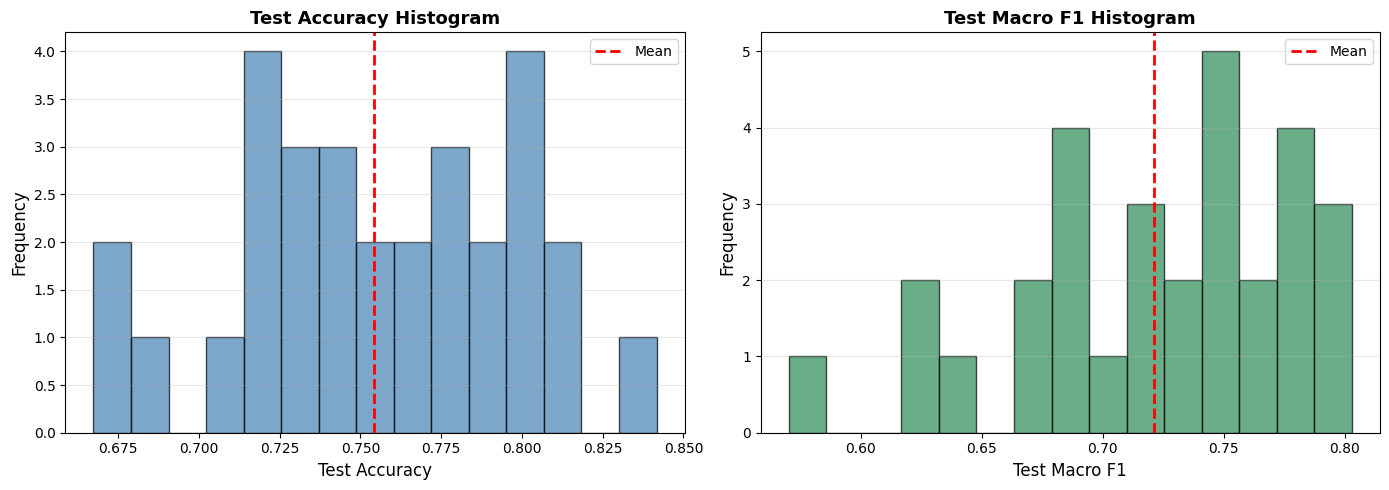

In [24]:
# Plot distributions for temporal front-view runs
plot_multi_run_distributions(multi_run_results_temporal_front, aggregated_stats_temporal_front)


TEMPORAL FRONT VIEW: BEST vs WORST RUN COMPARISON
Best Run:  #14 (seed=56) - Acc: 0.8417, F1: 0.7795
Worst Run: #16 (seed=58) - Acc: 0.6673, F1: 0.6398


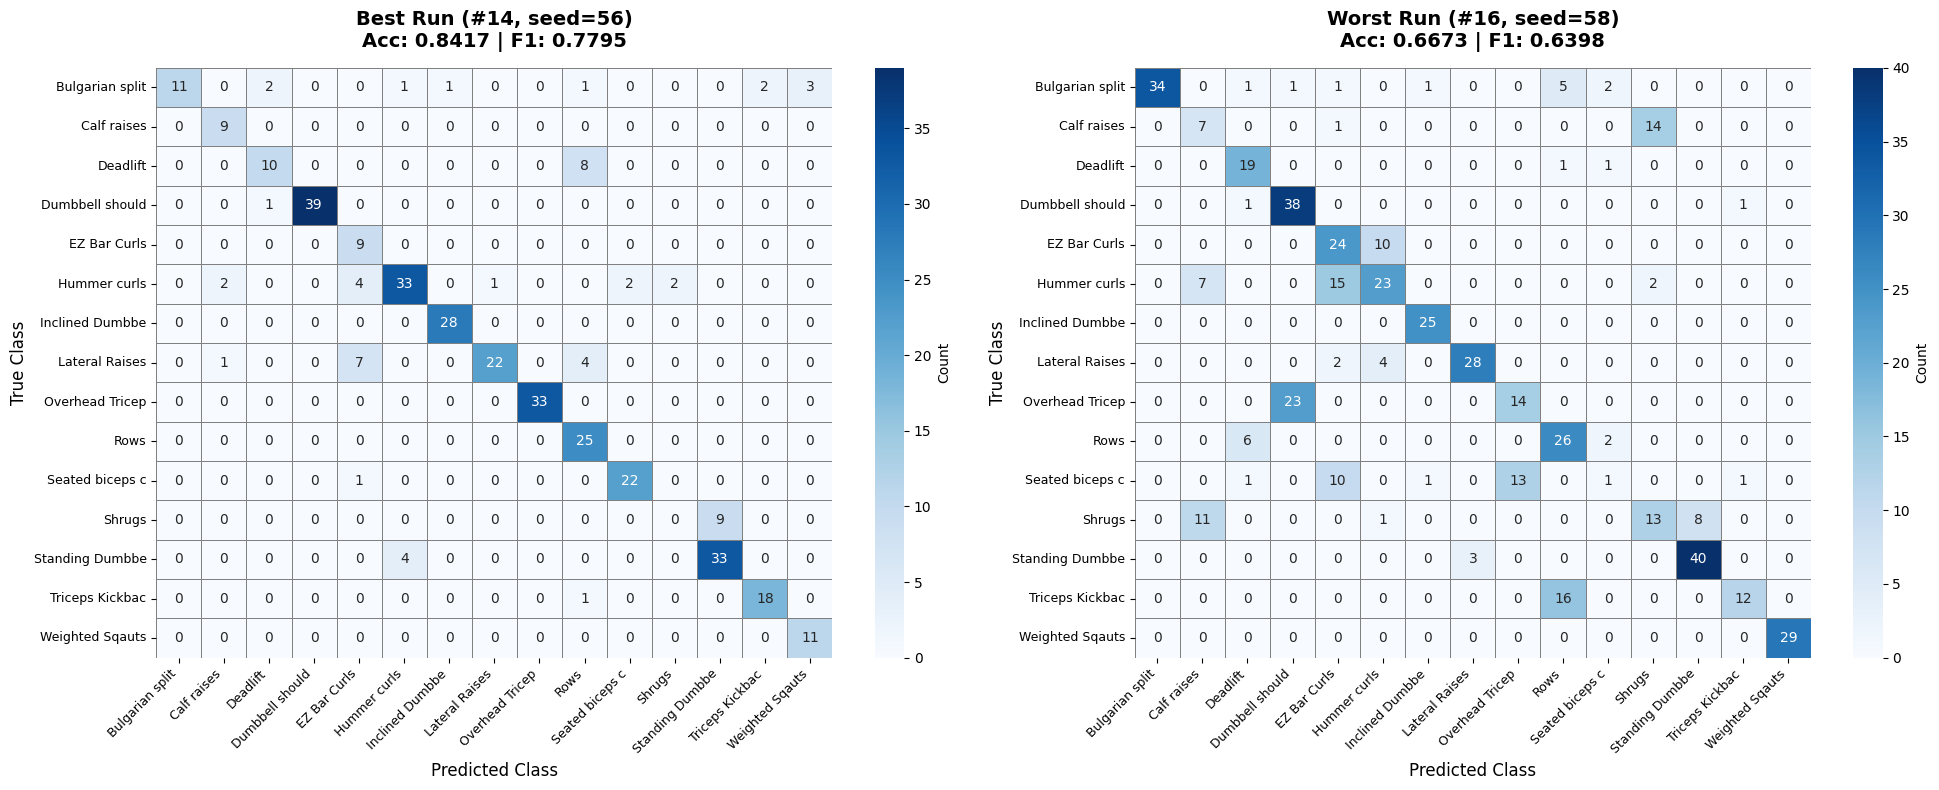


Per-Class F1 Comparison (Best vs Worst):
       Best Run  Worst Run  Difference
Class                                 
0        0.6875     0.8608     -0.1733
1        0.8571     0.2979      0.5593
2        0.6452     0.7755     -0.1303
3        0.9873     0.7451      0.2422
4        0.6000     0.5517      0.0483
5        0.8049     0.5412      0.2637
6        0.9825     0.9615      0.0209
7        0.7719     0.8615     -0.0896
8        1.0000     0.4375      0.5625
9        0.7812     0.6341      0.1471
10       0.9362     0.0606      0.8756
11       0.0000     0.4194     -0.4194
12       0.8354     0.8791     -0.0437
13       0.9231     0.5714      0.3516
14       0.8800     1.0000     -0.1200


In [25]:
# Best vs worst run comparison for temporal front-view
label_names_temporal = sorted(multi_run_results_temporal_front[0]['label_to_int'].keys())
ordered_labels_temporal = sort_labels_by_numeric_prefix(label_names_temporal)

print("\n" + "=" * 80)
print("TEMPORAL FRONT VIEW: BEST vs WORST RUN COMPARISON")
print("=" * 80)
comparison_df_temporal_front = plot_best_worst_comparison(multi_run_results_temporal_front, ordered_labels_temporal)

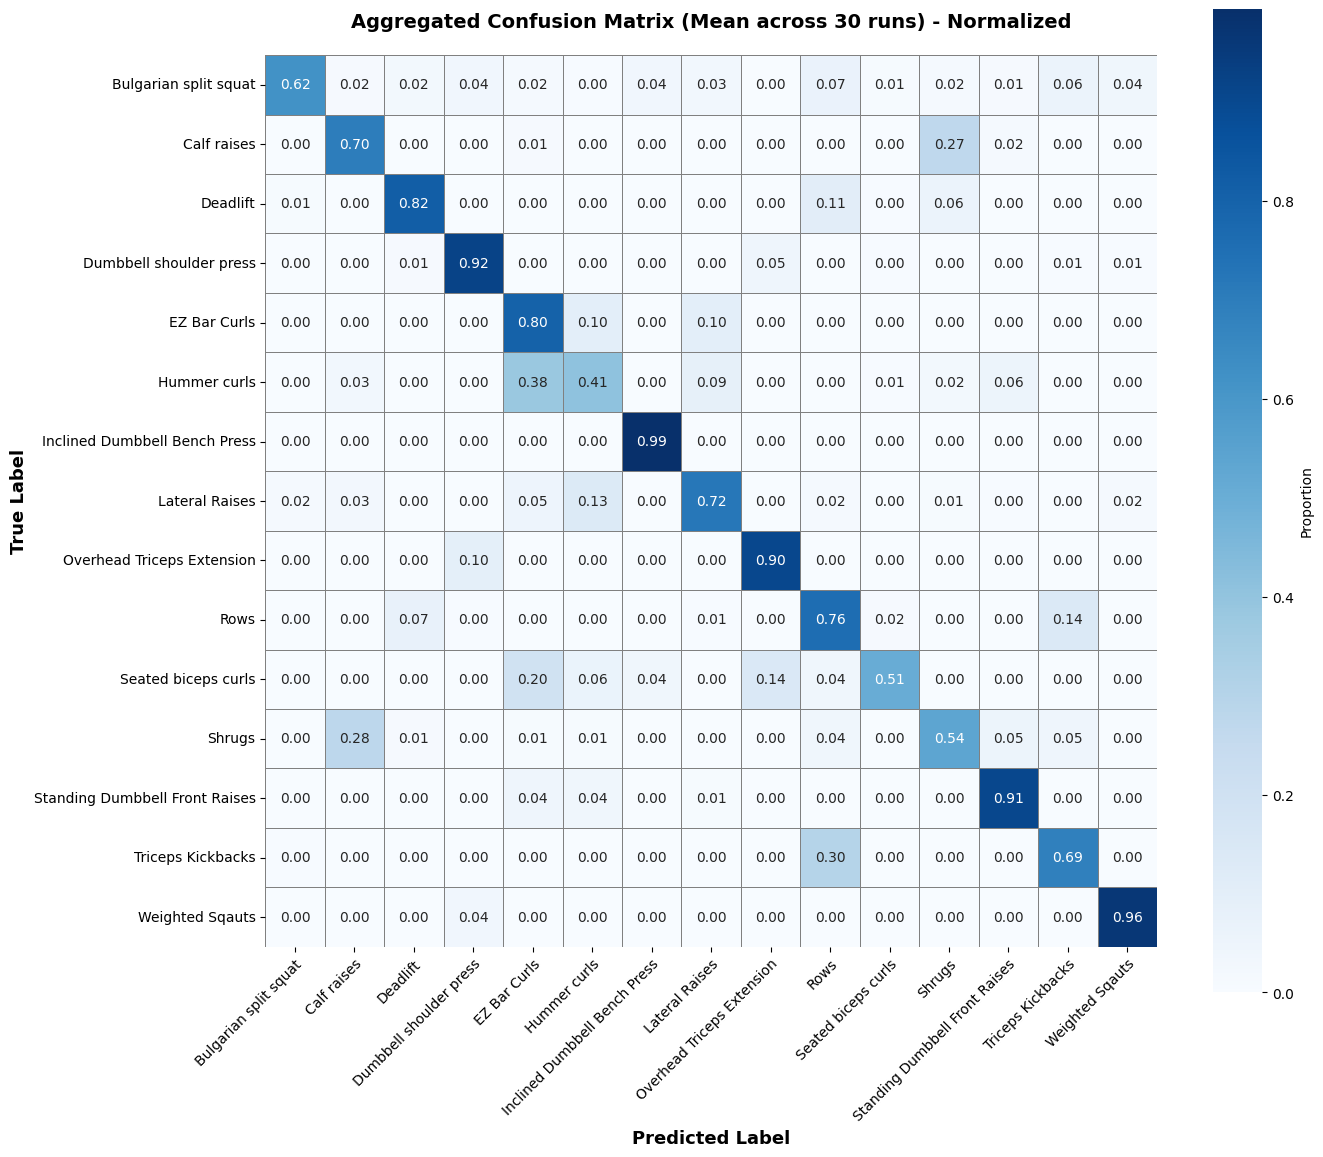

array([[1.73333333e+01, 4.33333333e-01, 7.00000000e-01, 1.03333333e+00,
        4.66666667e-01, 1.33333333e-01, 1.06666667e+00, 9.33333333e-01,
        3.33333333e-02, 1.93333333e+00, 2.66666667e-01, 5.00000000e-01,
        4.00000000e-01, 1.70000000e+00, 1.10000000e+00],
       [0.00000000e+00, 1.03666667e+01, 0.00000000e+00, 0.00000000e+00,
        2.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.96666667e+00,
        2.66666667e-01, 0.00000000e+00, 0.00000000e+00],
       [1.33333333e-01, 3.33333333e-02, 1.35000000e+01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.76666667e+00, 6.66666667e-02, 1.00000000e+00,
        0.00000000e+00, 3.33333333e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.33333333e-01, 4.07333333e+01,
        6.66666667e-02, 0.00000000e+00, 0.00000000e+00, 3.33333333e-02,
        2.00000000e+00, 0.00000000e+0

In [26]:
# Aggregated confusion matrix for temporal front-view
plot_aggregated_confusion_matrix(
    multi_run_results_temporal_front,
    label_names=ordered_labels_temporal,
    desired_class_order=ordered_labels_temporal,
    normalize=True
)

## Temporal Side View: Multi-Run Analysis

Detailed analysis of 30 runs for temporal side-view model.

In [27]:
# Display summary table for temporal side-view runs
print("=" * 80)
print("TEMPORAL SIDE VIEW: SUMMARY OF 30 RUNS")
print("=" * 80)
summary_df_temporal_side = display_multi_run_summary(multi_run_results_temporal_side, aggregated_stats_temporal_side)

TEMPORAL SIDE VIEW: SUMMARY OF 30 RUNS
AGGREGATED STATISTICS (30 runs)

Test Accuracy:  0.8408 ± 0.0503
  Min: 0.7466
  Max: 0.9373

Test Macro F1:  0.8392 ± 0.0522
  Min: 0.7402
  Max: 0.9381


Per-Class F1 Statistics (Mean ± Std):
         mean     std     min     max
Class                                
0      0.8305  0.1283  0.5588  1.0000
1      0.6850  0.2475  0.0741  1.0000
2      0.9257  0.0773  0.6250  1.0000
3      0.8164  0.1055  0.5833  0.9877
4      0.8319  0.1308  0.4878  1.0000
5      0.7807  0.1241  0.5000  0.9524
6      0.9389  0.0635  0.7727  1.0000
7      0.7459  0.1490  0.4151  0.9722
8      0.8408  0.0961  0.6071  0.9851
9      0.9224  0.0566  0.8182  1.0000
10     0.9193  0.1132  0.6207  1.0000
11     0.7190  0.1557  0.3913  0.9767
12     0.7797  0.1919  0.2857  0.9870
13     0.9109  0.0696  0.7500  1.0000
14     0.9405  0.0648  0.7467  1.0000


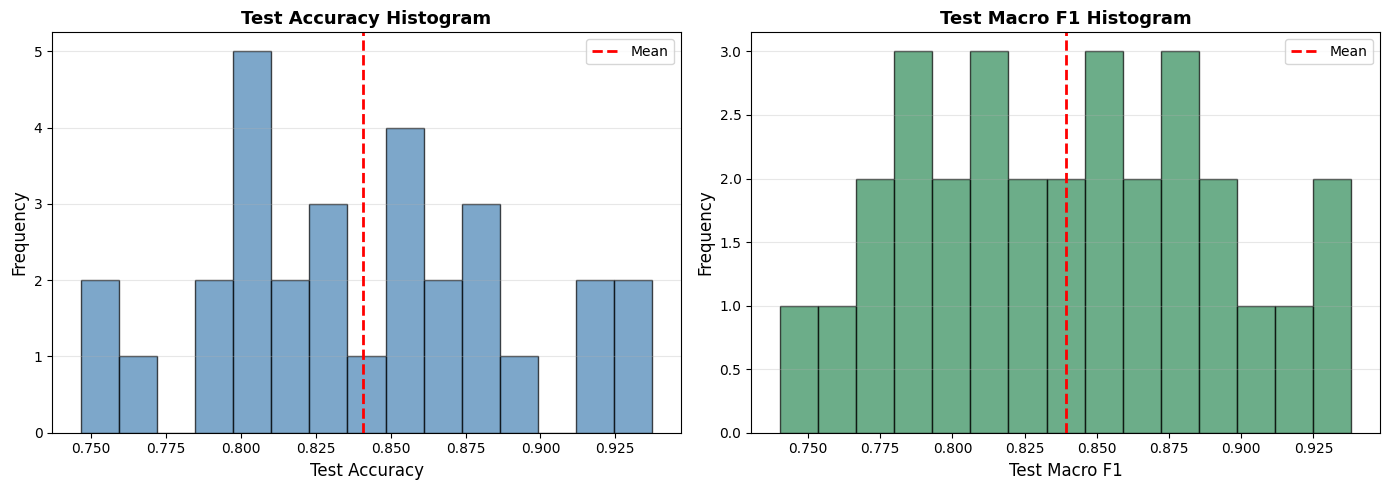

In [28]:
# Plot distributions for temporal side-view runs
plot_multi_run_distributions(multi_run_results_temporal_side, aggregated_stats_temporal_side)


TEMPORAL SIDE VIEW: BEST vs WORST RUN COMPARISON
Best Run:  #26 (seed=68) - Acc: 0.9373, F1: 0.9381
Worst Run: #6 (seed=48) - Acc: 0.7466, F1: 0.7535


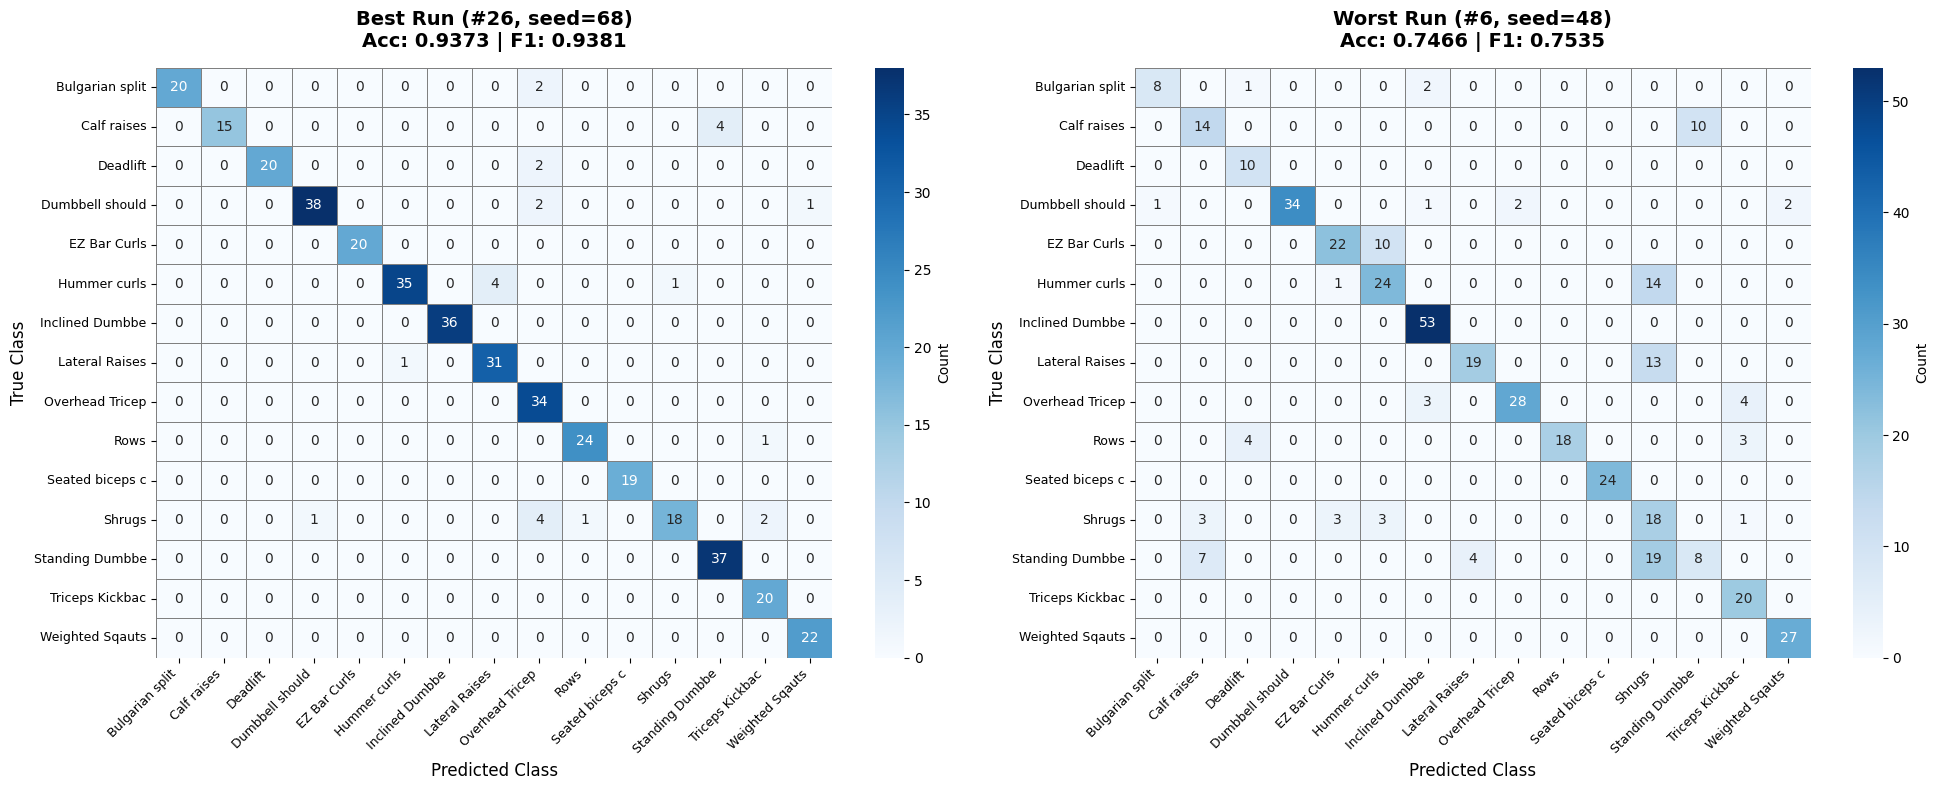


Per-Class F1 Comparison (Best vs Worst):
       Best Run  Worst Run  Difference
Class                                 
0        0.9524     0.8000      0.1524
1        0.8824     0.5833      0.2990
2        0.9524     0.8000      0.1524
3        0.9500     0.9189      0.0311
4        1.0000     0.7586      0.2414
5        0.9211     0.6316      0.2895
6        1.0000     0.9464      0.0536
7        0.9254     0.6909      0.2345
8        0.8718     0.8615      0.0103
9        0.9600     0.8372      0.1228
10       1.0000     1.0000     -0.0000
11       0.8000     0.3913      0.4087
12       0.9487     0.2857      0.6630
13       0.9302     0.8333      0.0969
14       0.9778     0.9643      0.0135


In [29]:
# Best vs worst run comparison for temporal side-view
print("\n" + "=" * 80)
print("TEMPORAL SIDE VIEW: BEST vs WORST RUN COMPARISON")
print("=" * 80)
comparison_df_temporal_side = plot_best_worst_comparison(multi_run_results_temporal_side, ordered_labels_temporal)

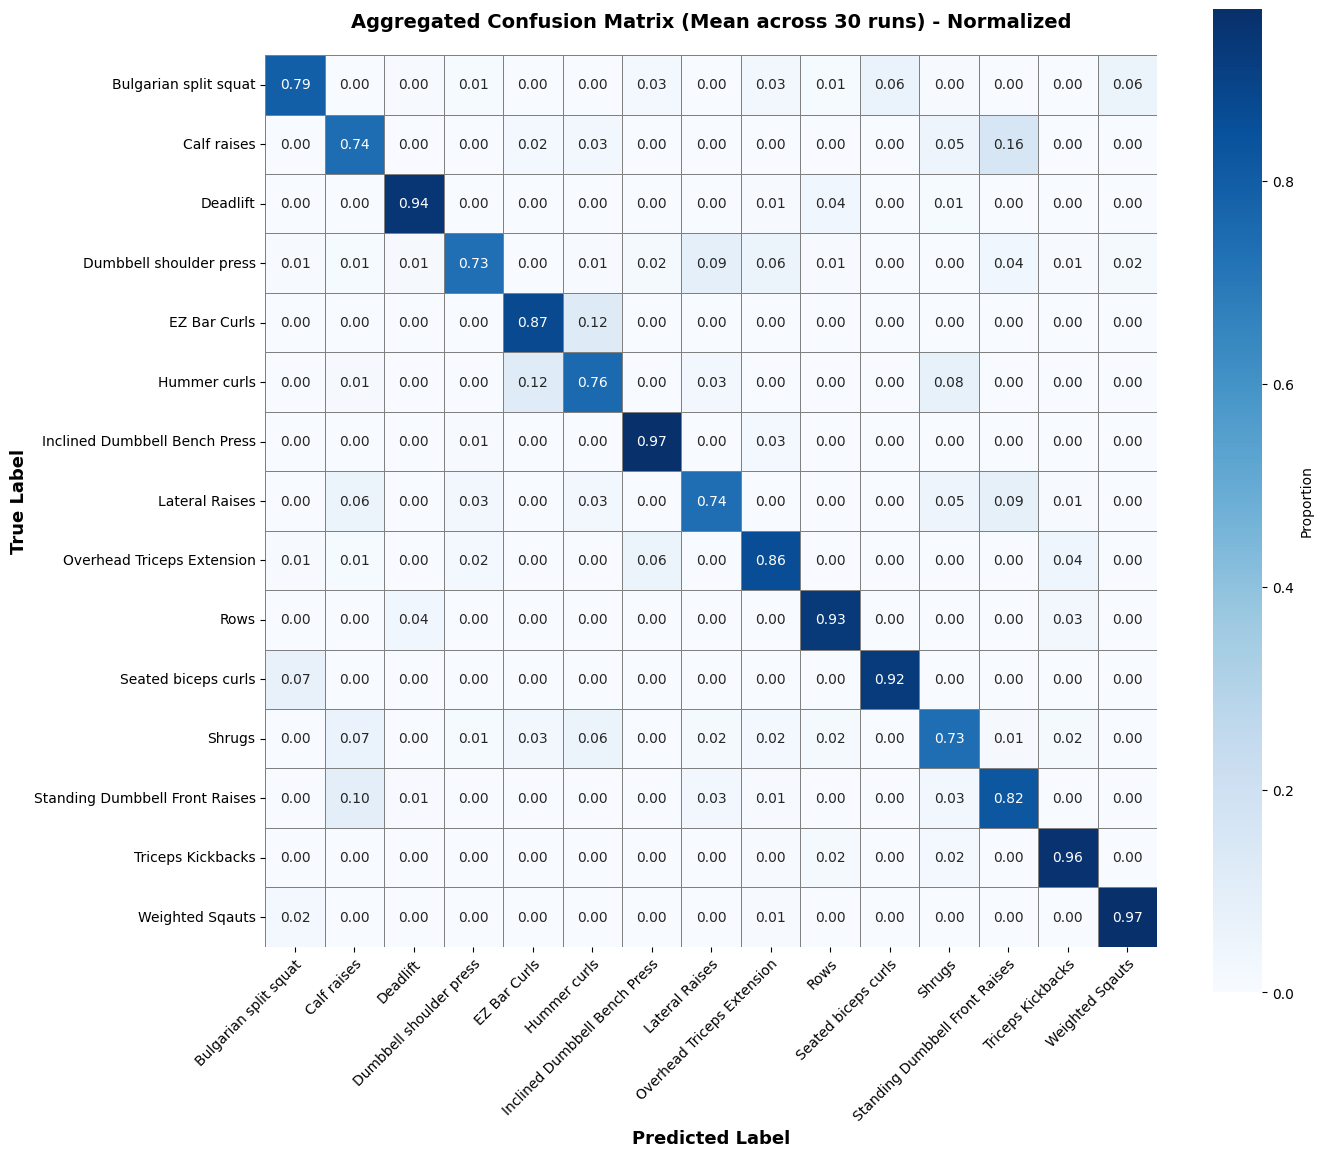

array([[2.08000000e+01, 6.66666667e-02, 1.00000000e-01, 2.33333333e-01,
        3.33333333e-02, 0.00000000e+00, 6.66666667e-01, 0.00000000e+00,
        8.33333333e-01, 2.66666667e-01, 1.60000000e+00, 1.00000000e-01,
        0.00000000e+00, 6.66666667e-02, 1.46666667e+00],
       [0.00000000e+00, 1.93666667e+01, 0.00000000e+00, 0.00000000e+00,
        5.33333333e-01, 8.33333333e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.33333333e+00,
        4.16666667e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.36000000e+01, 0.00000000e+00,
        0.00000000e+00, 3.33333333e-02, 0.00000000e+00, 0.00000000e+00,
        1.33333333e-01, 9.33333333e-01, 6.66666667e-02, 2.33333333e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.33333333e-01, 4.33333333e-01, 5.33333333e-01, 3.21666667e+01,
        0.00000000e+00, 2.33333333e-01, 7.00000000e-01, 3.93333333e+00,
        2.56666667e+00, 2.66666667e-0

In [30]:
# Aggregated confusion matrix for temporal side-view
plot_aggregated_confusion_matrix(
    multi_run_results_temporal_side,
    label_names=ordered_labels_temporal,
    desired_class_order=ordered_labels_temporal,
    normalize=True
)

---

## Cross-Model Visualizations: Temporal Front vs Side

Side-by-side comparisons of best runs from each temporal view.

In [31]:
# Get best runs from each temporal view for detailed comparison
best_run_temporal_front = max(multi_run_results_temporal_front, key=lambda x: x['test_metrics']['macro_f1'])
best_run_temporal_side = max(multi_run_results_temporal_side, key=lambda x: x['test_metrics']['macro_f1'])

print("Best Run Performance (Temporal):")
print(f"  Front View - Accuracy: {best_run_temporal_front['test_metrics']['accuracy']:.4f}, Macro F1: {best_run_temporal_front['test_metrics']['macro_f1']:.4f}")
print(f"  Side View  - Accuracy: {best_run_temporal_side['test_metrics']['accuracy']:.4f}, Macro F1: {best_run_temporal_side['test_metrics']['macro_f1']:.4f}")

Best Run Performance (Temporal):
  Front View - Accuracy: 0.8086, Macro F1: 0.8030
  Side View  - Accuracy: 0.9373, Macro F1: 0.9381


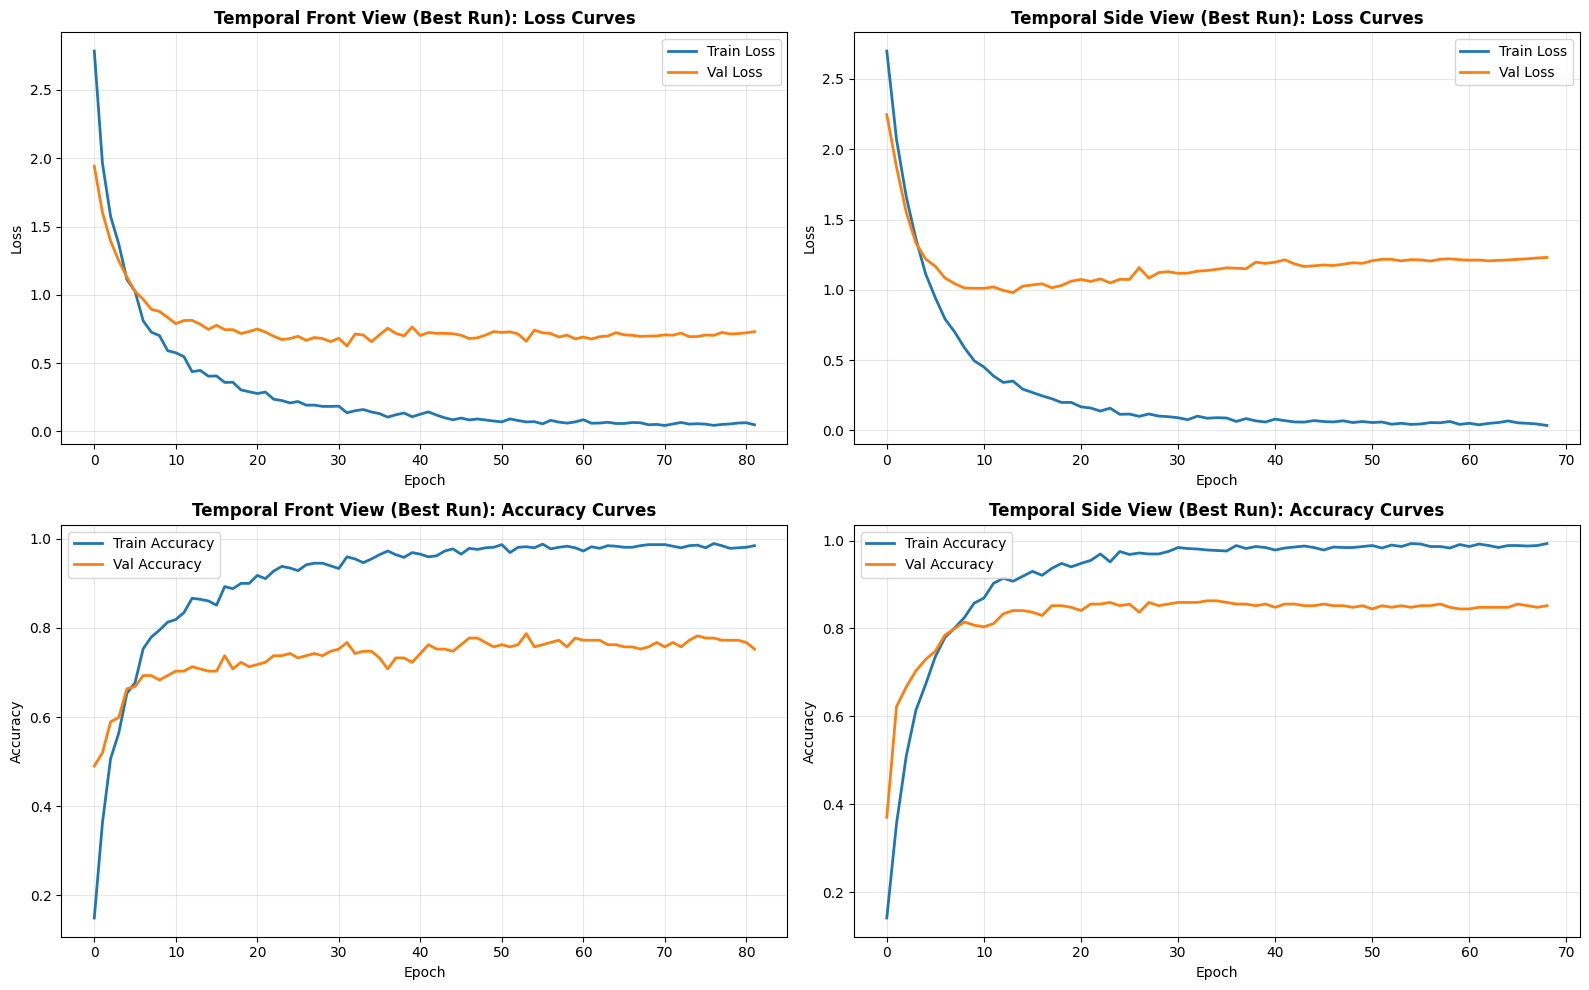

Temporal Front View (Best Run) training: 82 epochs
Temporal Side View (Best Run) training: 69 epochs


In [32]:
# Plot training curves for best temporal runs side-by-side
plot_dual_training_history(
    best_run_temporal_front['history'],
    best_run_temporal_side['history'],
    model_names=['Temporal Front View (Best Run)', 'Temporal Side View (Best Run)']
)

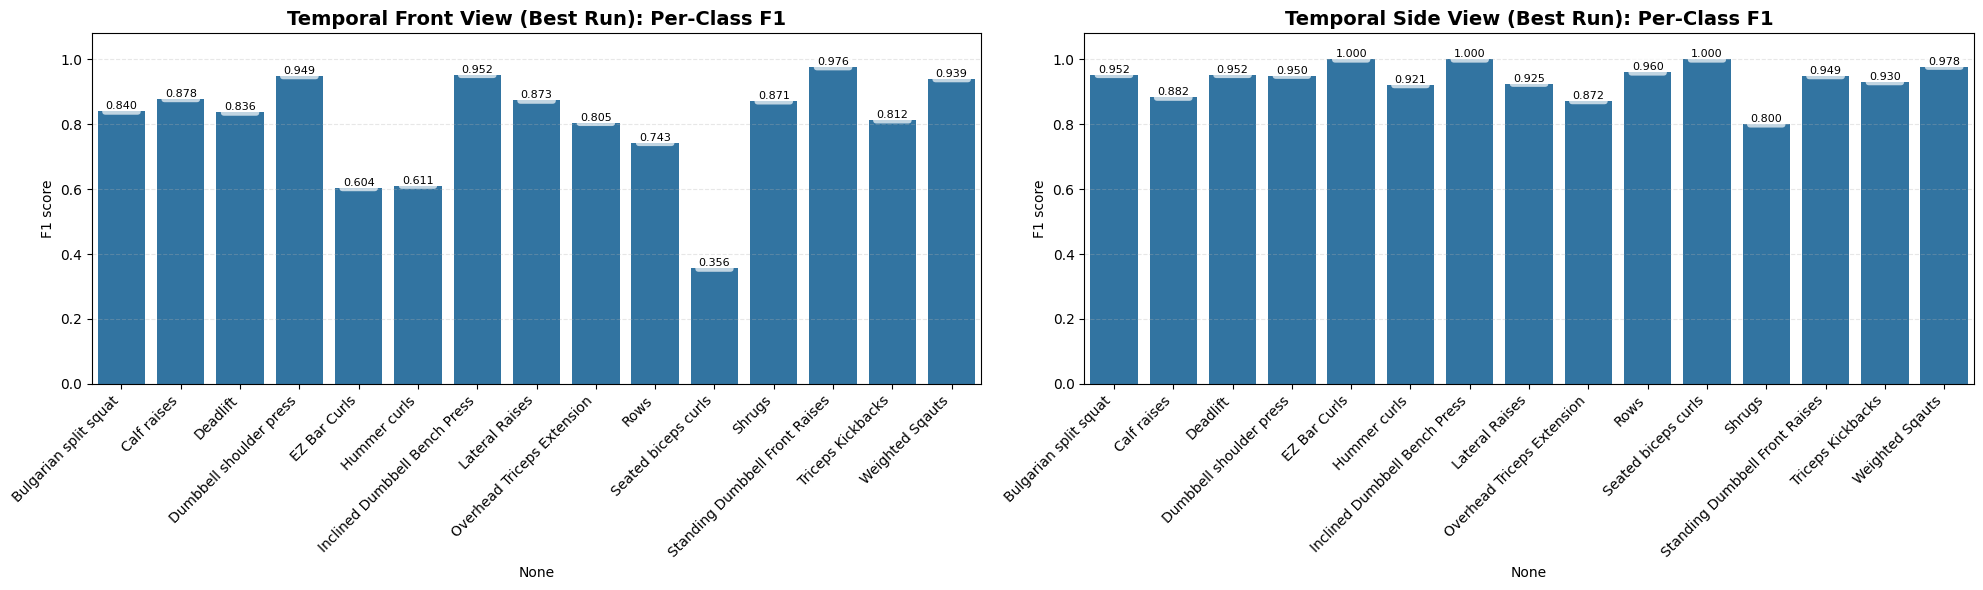

In [33]:
# Side-by-side per-class F1 comparison (best temporal runs)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

idx_to_label_temporal = {int(k): v for k, v in best_run_temporal_front['int_to_label'].items()}

per_class_f1_temporal_front = plot_per_class_f1_scores(
    best_run_temporal_front['test_metrics']['per_class_f1'],
    idx_to_label_temporal,
    desired_class_order=ordered_labels_temporal,
    ax=axes[0]
)
axes[0].set_title('Temporal Front View (Best Run): Per-Class F1', fontsize=14, fontweight='bold')

per_class_f1_temporal_side = plot_per_class_f1_scores(
    best_run_temporal_side['test_metrics']['per_class_f1'],
    idx_to_label_temporal,
    desired_class_order=ordered_labels_temporal,
    ax=axes[1]
)
axes[1].set_title('Temporal Side View (Best Run): Per-Class F1', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

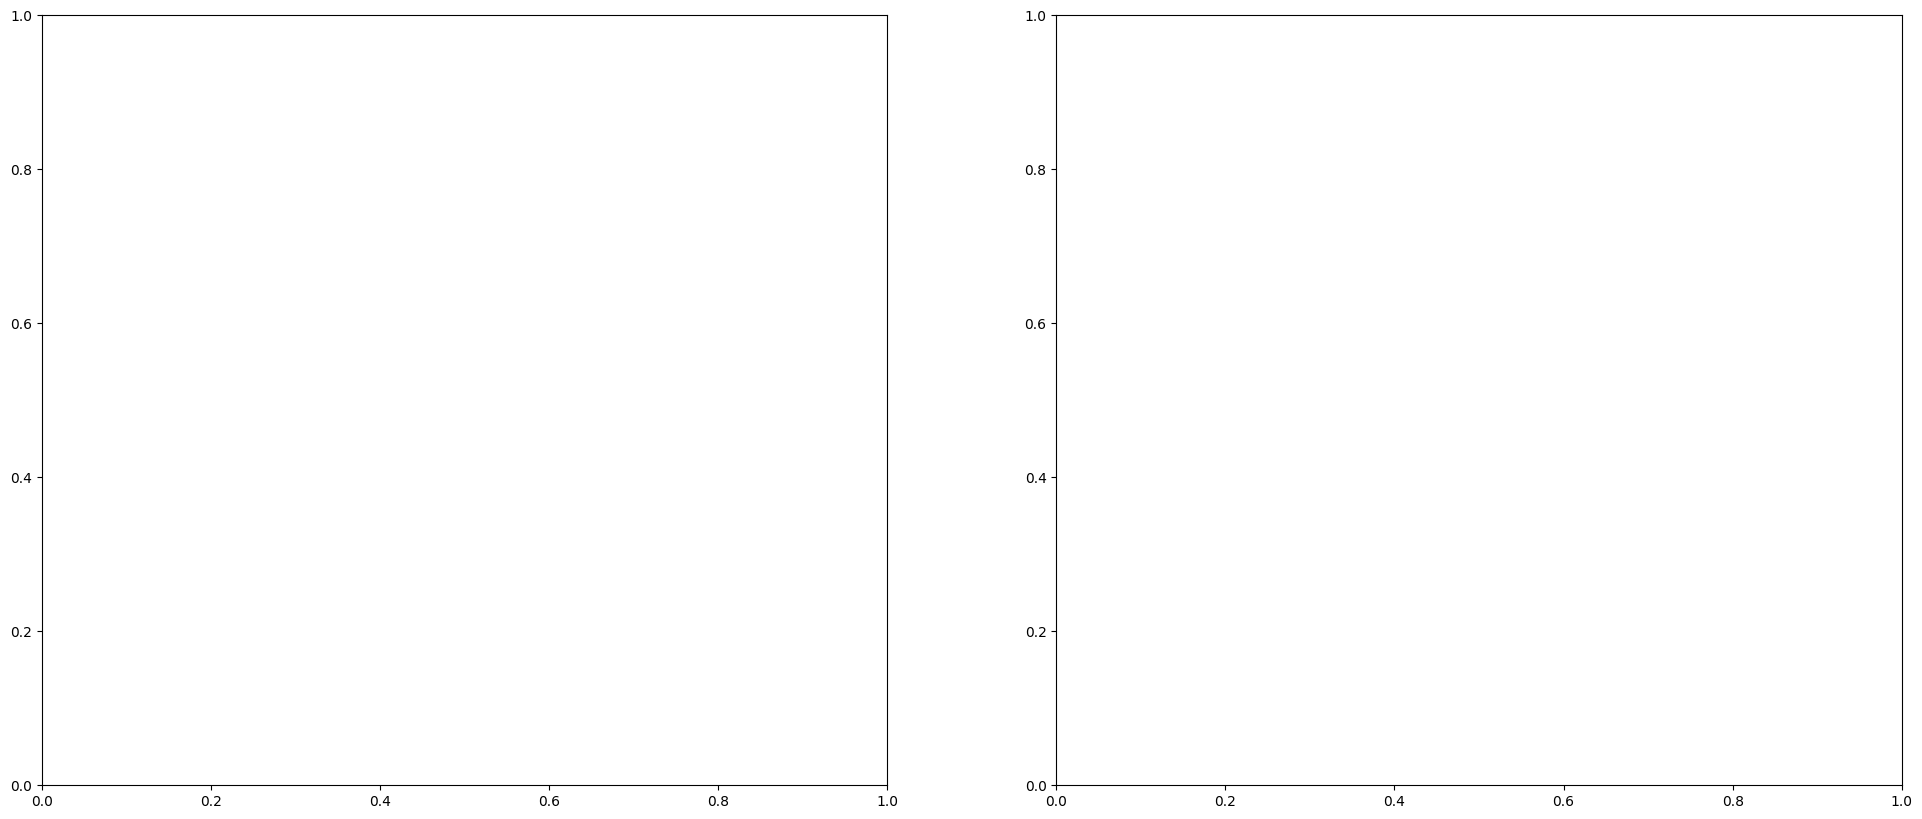

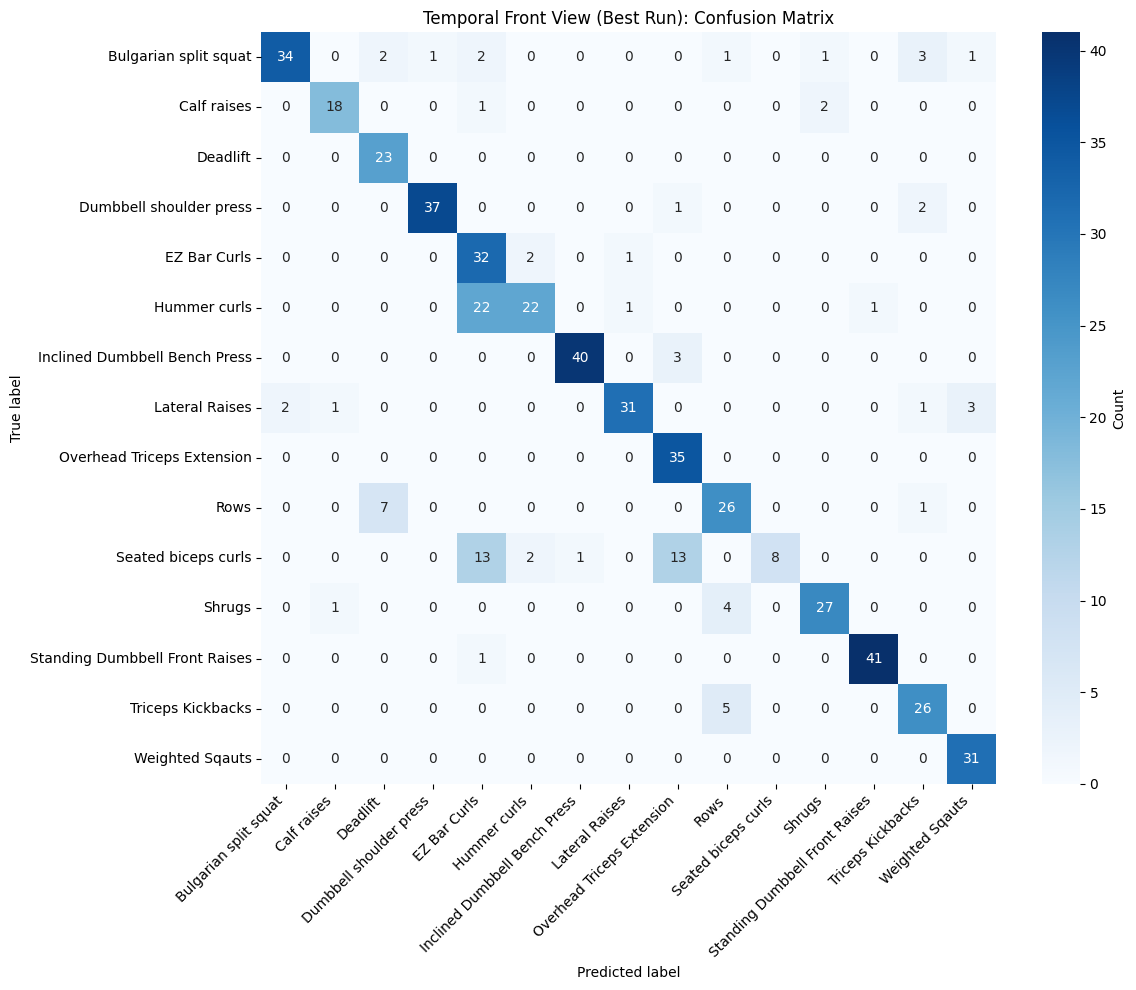

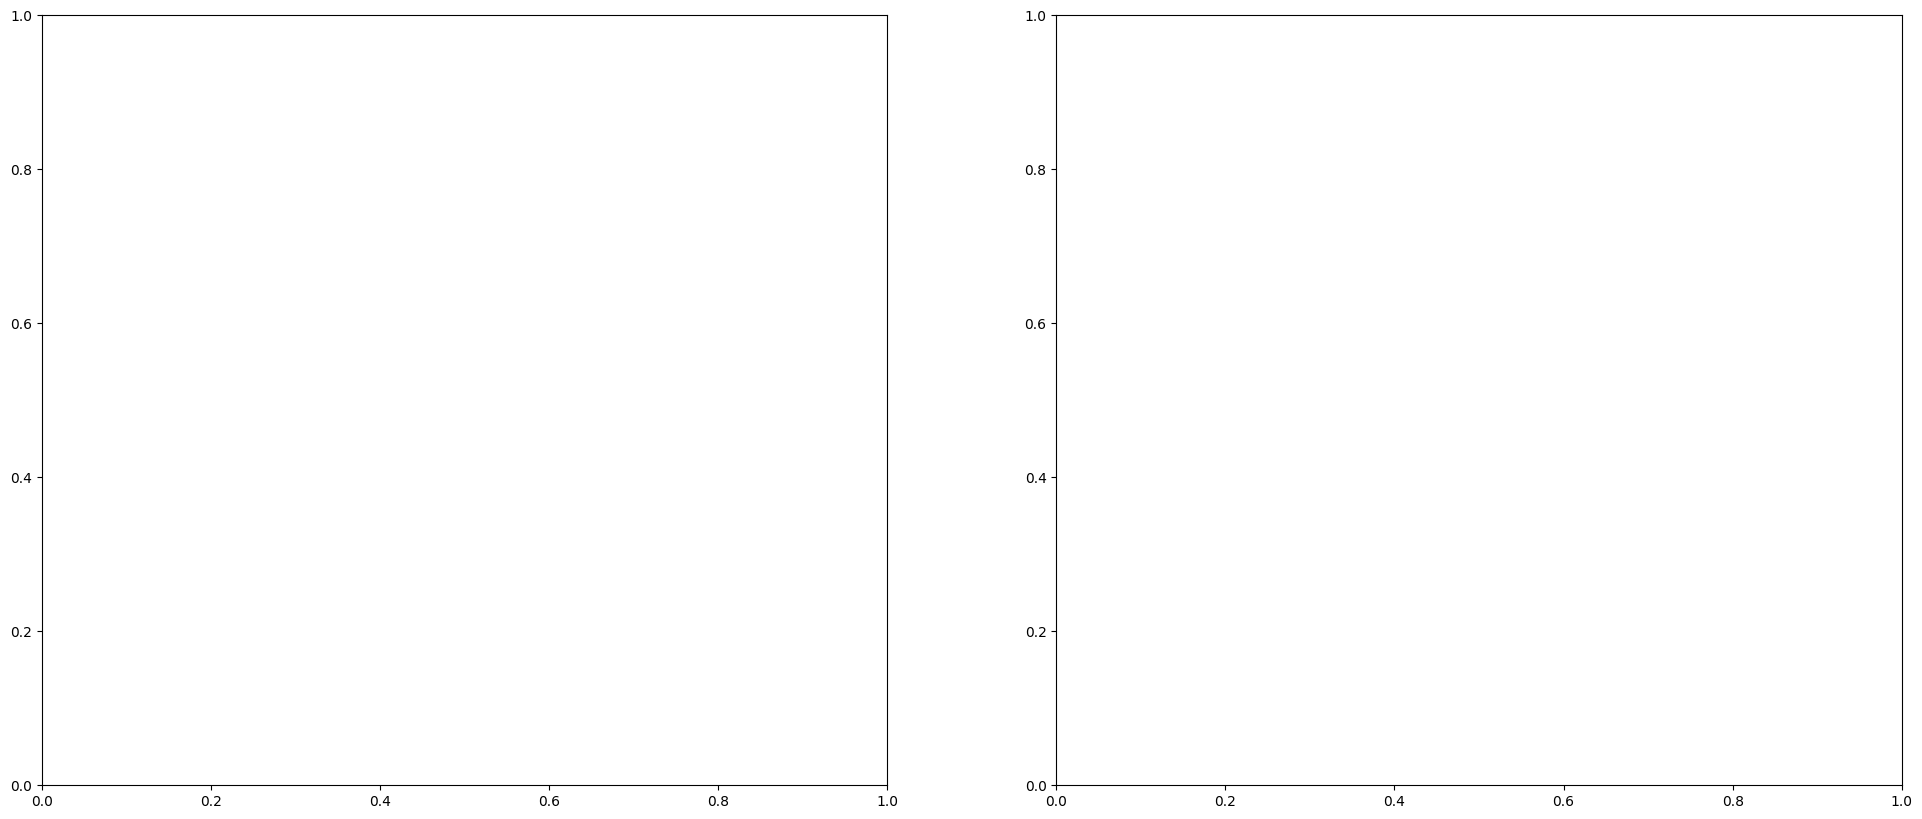

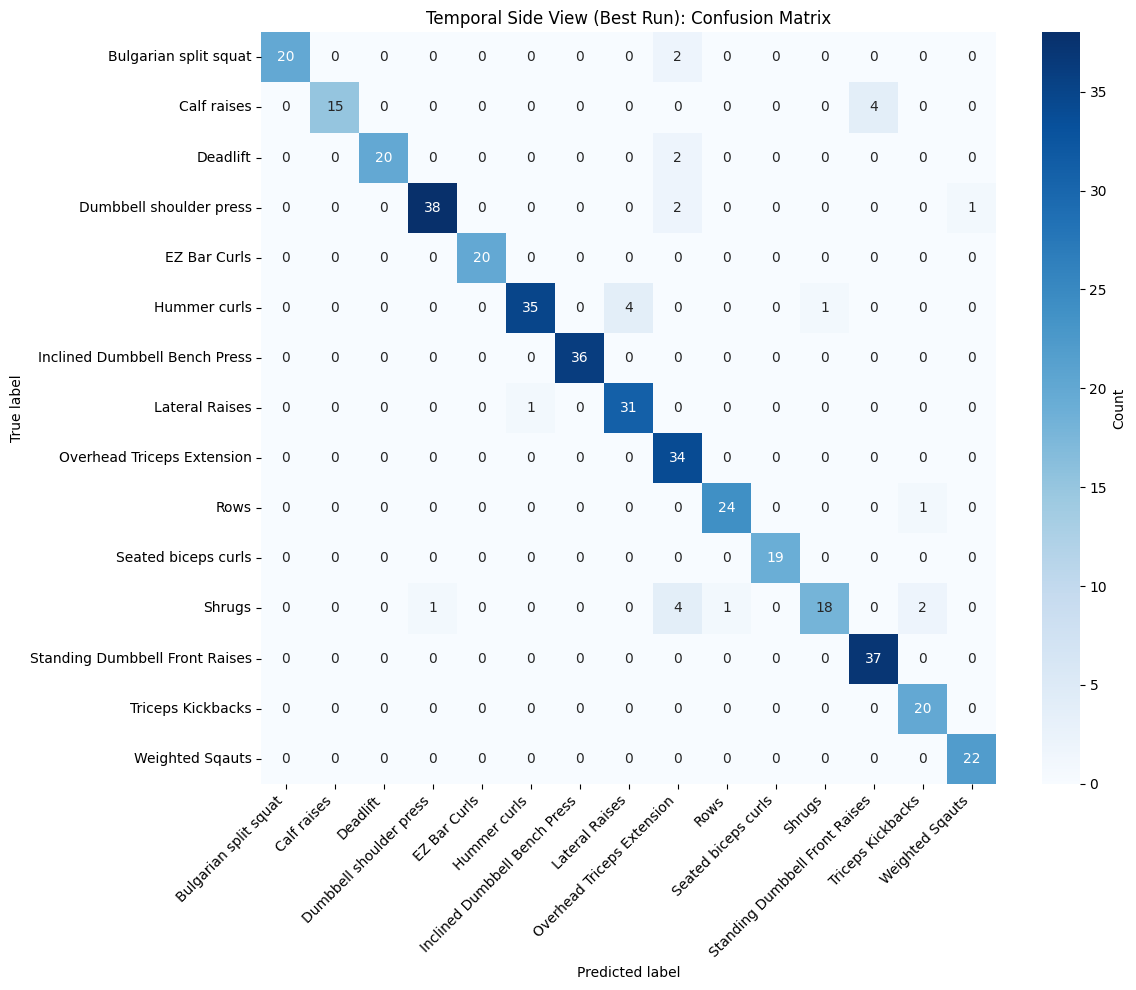

<Figure size 640x480 with 0 Axes>

In [34]:
# Side-by-side confusion matrices (best temporal runs)
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

conf_matrix_temporal_front = np.array(best_run_temporal_front['test_metrics']['confusion_matrix'])
plt.sca(axes[0])
plot_confusion_matrix_from_metrics(
    conf_matrix_temporal_front,
    current_class_order=label_names_temporal,
    desired_class_order=ordered_labels_temporal,
    normalize=False,
    title='Temporal Front View (Best Run): Confusion Matrix'
)

conf_matrix_temporal_side = np.array(best_run_temporal_side['test_metrics']['confusion_matrix'])
plt.sca(axes[1])
plot_confusion_matrix_from_metrics(
    conf_matrix_temporal_side,
    current_class_order=label_names_temporal,
    desired_class_order=ordered_labels_temporal,
    normalize=False,
    title='Temporal Side View (Best Run): Confusion Matrix'
)

plt.tight_layout()
plt.show()

---

## Final Comparison: Static vs Temporal Features

This section provides a comprehensive comparison between hand-crafted statistical features (static) and raw temporal sequences (temporal) to understand which feature engineering approach is more effective for the MLP baseline.

In [35]:
# Compare static vs temporal for front view
print("=" * 80)
print("FRONT VIEW: STATIC vs TEMPORAL COMPARISON")
print("=" * 80)
comparison_df_front_static_vs_temporal = compare_multi_run_stats(
    aggregated_stats_front,
    aggregated_stats_temporal_front,
    model_names=['Static Front', 'Temporal Front']
)

FRONT VIEW: STATIC vs TEMPORAL COMPARISON
MULTI-RUN STATISTICAL COMPARISON: Static Front vs Temporal Front

       Metric    Static Front  Temporal Front
Test Accuracy 0.6937 ± 0.0481 0.7543 ± 0.0423
Test Macro F1 0.6659 ± 0.0613 0.7214 ± 0.0569




In [37]:
# Compare static vs temporal for side view
print("\n" + "=" * 80)
print("SIDE VIEW: STATIC vs TEMPORAL COMPARISON")
print("=" * 80)
comparison_df_side_static_vs_temporal = compare_multi_run_stats(
    aggregated_stats_side,
    aggregated_stats_temporal_side,
    model_names=['Static Side', 'Temporal Side']
)


SIDE VIEW: STATIC vs TEMPORAL COMPARISON


NameError: name 'aggregated_stats_side' is not defined

In [ ]:
# Overall comparison: All 4 models
print("\n" + "=" * 80)
print("COMPREHENSIVE COMPARISON: ALL MODELS")
print("=" * 80)

all_models_stats = {
    'Static Front': aggregated_stats_front,
    'Static Side': aggregated_stats_side,
    'Temporal Front': aggregated_stats_temporal_front,
    'Temporal Side': aggregated_stats_temporal_side
}

# Create comparison DataFrame
comparison_data = []
for model_name, stats in all_models_stats.items():
    comparison_data.append({
        'Model': model_name,
        'Test Accuracy (Mean)': f"{stats['test_accuracy']['mean']:.4f}",
        'Test Accuracy (Std)': f"{stats['test_accuracy']['std']:.4f}",
        'Test Macro F1 (Mean)': f"{stats['test_macro_f1']['mean']:.4f}",
        'Test Macro F1 (Std)': f"{stats['test_macro_f1']['std']:.4f}",
        'Accuracy Range': f"[{stats['test_accuracy']['min']:.4f}, {stats['test_accuracy']['max']:.4f}]",
        'F1 Range': f"[{stats['test_macro_f1']['min']:.4f}, {stats['test_macro_f1']['max']:.4f}]"
    })

comparison_df_all = pd.DataFrame(comparison_data)
print("\n")
print(comparison_df_all.to_string(index=False))
print("\n")

# Find best model overall
best_model_name = max(all_models_stats.keys(), key=lambda x: all_models_stats[x]['test_macro_f1']['mean'])
best_f1 = all_models_stats[best_model_name]['test_macro_f1']['mean']
print(f"🏆 Best Model (by mean macro F1): {best_model_name} with F1 = {best_f1:.4f}")
print("=" * 80)


COMPREHENSIVE COMPARISON: ALL MODELS


         Model Test Accuracy (Mean) Test Accuracy (Std) Test Macro F1 (Mean) Test Macro F1 (Std)   Accuracy Range         F1 Range
  Static Front               0.6505              0.0545               0.6478              0.0482 [0.5287, 0.8032] [0.5485, 0.7928]
   Static Side               0.8270              0.0315               0.8098              0.0319 [0.7754, 0.8952] [0.7488, 0.8825]
Temporal Front               0.7032              0.0601               0.7006              0.0546 [0.5586, 0.7970] [0.5813, 0.7945]
 Temporal Side               0.8926              0.0264               0.8774              0.0288 [0.8378, 0.9490] [0.8116, 0.9324]


🏆 Best Model (by mean macro F1): Temporal Side with F1 = 0.8774
